# Modulus of Rigidity Experiment Code 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'

## Corresponding Input Voltages with Frequencies

In [3]:
voltages = np.arange(0,5,0.1)
# Input voltages 

freqs_obs = np.array([6.93, 13.32, 19.76,26.22, 32.56, 38.97, 45.32, 51.68, 58.01, 64.41, 70.89, 77.37, 83.81, 
                    90.19, 96.65, 102.99, 109.34, 115.64, 121.98, 128.41, 134.87, 141.25, 147.74, 154.13, 160.61, 
                    167.01, 173.43, 179, 186.29, 192.72, 199.11, 205.51, 211.87, 218.21, 224.68, 231.04, 237.38, 
                    243.73, 250.18, 256.76, 263.17, 269.61, 275.94, 282.36, 288.74, 295.21, 301.62, 308.07, 
                    314.47, 321.03])
# Observed frequencies for each input voltage

The slope of the line of best fit is 64.06859542483018 

The y-intercept of the line of best fit is 6.835741220674732 

Covariance Matrix 
 [[ 0.00021781 -0.00053364]
 [-0.00053364  0.00176103]] 



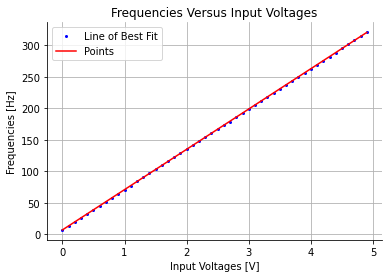

In [4]:
plt.plot(voltages, freqs_obs, 'bo',markersize= 2)

def fitfunc(x,m,c): 
 return m*x+c
#Plot line of best fit

pars, cov = curve_fit(fitfunc,voltages,freqs_obs)
plt.plot(voltages,fitfunc(voltages,*pars),'r-')

plt.xlabel("Input Voltages [V]")
plt.ylabel("Frequencies [Hz]")
plt.title("Frequencies Versus Input Voltages")

plt.grid(True)

plt.legend(['Line of Best Fit','Points'],loc='upper left')
# Plots the legend

print("The slope of the line of best fit is", pars[0], "\n")
print("The y-intercept of the line of best fit is", pars[1], "\n")

print("Covariance Matrix \n", cov, "\n")
# Gives the Covariance matrix

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

Calculating the **Uncertainty on the Frequency Values**:

In [5]:
def uncert_Frequency(m, Δm, x, Δx, c, Δc, y):
    return y *(  (Δm/m)**2 + (Δx/x)**2 + (Δc/c)**2 )**(0.5)
# Rearrangemnt of equation 14 to give us a value for uncertainty of frequency 

In [6]:
m = 64.06859542
Δm = 0.014758529469518425 
# Values of the slope and uncertainty using the covariance matrix 

x = voltages
Δx = 5/(2**12)
# Values for the input voltages and its associated uncertainty

c = 6.83574122
Δc= 0.041964601124292816
# Values for the y-intercept and its associated uncertainty 


In [7]:
uncertainty_Frequency = uncert_Frequency(m, Δm, x, Δx, c, Δc, freqs_obs)

<ipython-input-5-b2ae31403317>:2: RuntimeWarning: divide by zero encountered in true_divide
  return y *(  (Δm/m)**2 + (Δx/x)**2 + (Δc/c)**2 )**(0.5)


We can then **Graph the experiment values and the line of best fit**

The slope of the line of best fit is 64.06859542483018 

The y-intercept of the line of best fit is 6.835741220674732 

Covariance Matrix 
 [[ 0.00021781 -0.00053364]
 [-0.00053364  0.00176103]] 



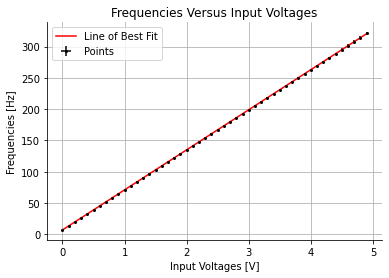

In [8]:
plt.errorbar(voltages,freqs_obs , uncertainty_Frequency, Δx,fmt='o', markersize= 2, color = 'black') 

def fitfunc(x,m,c): 
 return m*x+c
#Plot line of best fit

pars, cov = curve_fit(fitfunc,voltages,freqs_obs)
plt.plot(voltages,fitfunc(voltages,*pars),'r-')

plt.xlabel("Input Voltages [V]")
plt.ylabel("Frequencies [Hz]")
plt.title("Frequencies Versus Input Voltages")

plt.grid(True)

plt.legend(['Line of Best Fit','Points'],loc='upper left')
# Plots the legend

print("The slope of the line of best fit is", pars[0], "\n")
print("The y-intercept of the line of best fit is", pars[1], "\n")

print("Covariance Matrix \n", cov, "\n")
# Gives the Covariance matrix

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

##### Using the equation of this line of best fit we can find the corresponding frequencies to our input volatges 

Equation of the line of best fit is y = 64.06859542x + 6.83574122 , where x is the input voltage and y is the corresponding frequency  


In [9]:
print("The uncertainty on the slope is: ", (cov[0,0])**0.5)
print("\nThe uncertainty on the y-intercpt is: ", (cov[1,1])**0.5)

The uncertainty on the slope is:  0.014758529469518425

The uncertainty on the y-intercpt is:  0.041964601124292816


To find the **Uncertainty on the Frequency** we add the uncertainty on each frequency in quadrature:

In [10]:
avg_uncertainty_frequency = (0.09470346**2 + 0.1153494 **2 + 0.14560479**2 + 0.1798577 **2 + 0.21524308**2 + 0.25219212**2 + 
                          0.289415  **2 + 0.32713344**2 + 0.36495625**2 + 0.40342711**2 + 0.44254816**2 + 0.48178071**2 
                          + 0.52085123**2 + 0.55961876**2 + 0.59893868**2 + 0.6375608 **2 + 0.67628332**2 + 0.71472884**2 
                          + 0.75344878**2 + 0.79274731**2 + 0.83225013**2 + 0.87127592**2 + 0.91099465**2 + 0.95010937**2 
                          + 0.98979003**2 + 1.0289875 **2 + 1.06831704**2 + 1.10241949**2 + 1.14712207**2 + 1.18653444**2 
                          + 1.22570631**2 + 1.26494499**2 + 1.30394225**2 + 1.34282083**2 + 1.38250336**2 + 1.42151267**2 
                          + 1.46040231**2 + 1.49935661**2 + 1.53892891**2 + 1.57930342**2 + 1.61863464**2 + 1.65815263**2 
                          + 1.69699621**2 + 1.73639526**2 + 1.77555016**2 + 1.8152602 **2 + 1.85460287**2 + 1.89419299**2 
                          + 1.93347709**2 + 1.97374621**2)**(1/2) / (len(uncertainty_Frequency))


In [11]:
print("The uncertianty on frequency is calculated as", avg_uncertainty_frequency, "Hz")

The uncertianty on frequency is calculated as 0.1637956366438766 Hz


## Aluminium 

### Rod Readings

In [12]:
# Input voltages into the rod
alum_inp_volt = np.arange(2.45,2.65,0.001)

alum_frequency_of_driver = 64.06859542*alum_inp_volt + 6.83574122
# Gives the input voltage as the corresponding frequency

In [13]:
# Amplitudes received at 303K 
alum_amplitude_at_303 = np.array([0.2540923683519833, 0.2612297694179393, 0.2676024489411146, 0.2701515207503844, 0.2719358710168732, 0.27219077819780024, 0.2732104069215081, 0.27168096383594625, 0.2714260566550193, 0.27397512846428906, 0.2744849428261431, 0.27346531410243513, 0.27524966436892395, 0.2757594787307781, 0.27626929309263193, 0.27856345772097535, 0.2795830864446834, 0.27958308644468344, 0.28187725107302625, 0.2839165085204421, 0.284681230063223, 0.2831517869776611, 0.28417141570136906, 0.2857008587869309, 0.28748520905342, 0.29079900240547135, 0.2915637239482523, 0.2923284454910332, 0.2936029813956681, 0.29538733166215697, 0.29895603219513467, 0.29870112501420776, 0.3002305680997699, 0.3025247327281132, 0.3043090829946021, 0.30583852608016393, 0.30889741225128775, 0.3111915768796309, 0.311956298422412, 0.31527009177446297, 0.3208780497548565, 0.3208780497548565, 0.3229173072022725, 0.32572128619247, 0.3292899867254476, 0.3318390585347174, 0.33744701651511183, 0.33974118114345464, 0.3412706242290165, 0.34560404630477526, 0.3522316330088774, 0.35529051918000115, 0.3621730130650304, 0.3644671776933732, 0.368035878226351, 0.3769576295587962, 0.3871539167958761, 0.388173545519584, 0.39174224605256225, 0.40576214100354707, 0.41417407797413813, 0.4195271287736048, 0.43303720936273554, 0.4353313739910787, 0.44323349659981554, 0.4541945053796764, 0.47229291522549327, 0.47790087320588714, 0.4779008732058873, 0.5039014056604411, 0.5240390729536737, 0.5362746176381697, 0.5615104285499425, 0.5780793953101974, 0.5898051256328393, 0.6262568525053998, 0.7024740996025722, 0.7534555357879716, 0.7684950594626645, 0.8370650911320269, 0.9303611193513077, 1.0175393752283413, 1.1549343457479928, 1.2418576944440987, 1.2811134003068563, 1.4322733585965661, 1.5464717756518607, 1.6043357057222891, 1.6379834536046531, 1.6652585219638418, 1.6853961892570748, 1.7073182068167962, 1.7277107812909567, 1.7409659546991598, 1.7437699336893568, 1.7414757690610139, 1.7317892961857884, 1.7187890299585113, 1.703494599102891, 1.6843765605333665, 1.6616898214308633, 1.6349245674335289, 1.5859823886955458, 1.554118991079671, 1.5276086442632628, 1.4309988226919308, 1.3111924476562422, 1.2428773231678067, 1.222484748693647, 1.1743072914984445, 1.0799916345554554, 1.0009704084680862, 0.9576361877104965, 0.9586558164342044, 0.931635655255943, 0.8521046148067196, 0.7970446637264882, 0.7809855113280875, 0.7748677389858394, 0.7396905480179137, 0.7121605724777981, 0.6825913394902664, 0.6611791362923982, 0.6769833815098725, 0.6619438578351794, 0.6193743586203707, 0.611727143192561, 0.6127467719162689, 0.5974523410606489, 0.5796088383957592, 0.5783343024911243, 0.5604907998262345, 0.5434120187041257, 0.5581966351978913, 0.5344902673716808, 0.5184311149732801, 0.5184311149732801, 0.5082348277362001, 0.5033915912985869, 0.4977836333181932, 0.492430582518726, 0.4799401306533032, 0.4784106875677412, 0.4829990168244273, 0.4679594931497341, 0.4649006069786104, 0.4626064423502675, 0.4549592269224574, 0.45291996947504154, 0.4496061761229907, 0.4391549817049838, 0.43176267345810065, 0.4335470237245895, 0.4292136016488307, 0.4190173144117509, 0.4154486138787732, 0.4095857487174519, 0.40474251227983915, 0.4052523266416931, 0.40117381174686073, 0.3937815034999782, 0.38970298860514613, 0.388683359881438, 0.38460484498660624, 0.3772125367397231, 0.37517327929230715, 0.3726242074830373, 0.36778097104542395, 0.367016249502643, 0.36497699205522716, 0.35936903407483356, 0.3578395909892714, 0.3550356119990742, 0.3512120042851695, 0.34687858220941054, 0.34458441758106717, 0.34101571704808953, 0.33821173805789273, 0.3366822949723309, 0.33464303752491487, 0.3310743369919365, 0.32801545082081274, 0.32776054363988577, 0.3262311005543239, 0.32546637901154296, 0.3244467502878349, 0.3198584210311486, 0.31909369948836763, 0.31705444204095184, 0.31476027741260904, 0.31272101996519314, 0.3104268553368499, 0.3094072266131417, 0.31093666969870404, 0.3086425050703607, 0.30813269070850674, 0.3037992686327481, 0.30328945427089415, 0.3020149183662591, 0.2984462178332807])

In [14]:
# Amplitudes received at 333K
alum_amplitude_at_333 = np.array([0.2941127957575221, 0.28774011623434725, 0.2772889218163403, 0.2711711494740923, 0.2691318920266765, 0.26607300585555266, 0.26607300585555266, 0.26632791303647957, 0.26658282021740654, 0.27066133511223833, 0.2688769848457495, 0.2719358710168732, 0.2701515207503844, 0.2727005925596542, 0.27423003564521603, 0.2737202212833621, 0.27423003564521603, 0.27473985000707, 0.276524200273559, 0.2806027151683913, 0.28315178697766114, 0.2836616013395151, 0.2839165085204421, 0.284426322882296, 0.2839165085204421, 0.284426322882296, 0.2857008587869309, 0.28672048751063894, 0.28621067314878496, 0.29079900240547135, 0.2938578885765951, 0.2918186311291793, 0.29615205320493787, 0.29538733166215697, 0.3002305680997698, 0.3035443614518211, 0.30456399017552904, 0.3043090829946021, 0.30634834044201786, 0.31246611278426595, 0.31476027741260904, 0.31781916358373274, 0.31781916358373274, 0.3208780497548565, 0.3244467502878349, 0.3249565646496889, 0.3320939657156445, 0.33132924417286347, 0.33413322316306077, 0.3407608098671625, 0.3443295104001402, 0.3478982109331185, 0.3550356119990742, 0.3573297766274175, 0.3624279202459574, 0.3695653213119131, 0.38333030908197135, 0.3861342880721681, 0.3868990096149492, 0.403213069194277, 0.41570352105970015, 0.42156638622102066, 0.43813535298127587, 0.44629238277093924, 0.4529199694750414, 0.4654104213404643, 0.4898815107094562, 0.5036464984795138, 0.4985483548609741, 0.5242939801346009, 0.5658438506257013, 0.5882756825472771, 0.615295843725539, 0.6433356336275085, 0.6693361660820625, 0.7121605724777981, 0.8059664150589331, 0.9285767690848189, 1.024931683475224, 1.1758367345840064, 1.3484088960715837, 1.4631171274887325, 1.543922703842591, 1.5933746969424285, 1.6252380945583031, 1.6586309352597397, 1.6884550754281986, 1.7106320001688473, 1.7210831945868545, 1.7289853171955916, 1.7345932751759854, 1.7315343890048613, 1.7274558741100297, 1.7192988443203654, 1.7093574642642122, 1.6838667461715127, 1.646650297756171, 1.6066298703506323, 1.5704330506589987, 1.5148632852169133, 1.4496070468996016, 1.3361733513870877, 1.207700132199881, 1.1702287766036126, 1.1169531757898699, 1.0313043629983987, 0.9609499810625474, 0.9321454696177967, 0.9137921525910532, 0.8559282225206246, 0.82151575309548, 0.7914367057460943, 0.7496319280740666, 0.7521809998833365, 0.7412199911034757, 0.6874345759278793, 0.6563358998547856, 0.6571006213975666, 0.6481788700651215, 0.6170801939920278, 0.604844649307532, 0.5890404040900583, 0.5671183865303364, 0.5775695809483432, 0.5691576439777524, 0.5365295248190968, 0.5327059171051918, 0.5329608242861188, 0.5174114862495718, 0.5056857559269302, 0.504921034384149, 0.4906462322522371, 0.48299901682442725, 0.489626603528529, 0.4717831008636392, 0.4626064423502676, 0.46413588543582945, 0.4524101551131876, 0.4498610833039177, 0.4452727540472313, 0.4399197032477648, 0.4297234160106848, 0.42666452983956094, 0.4292136016488309, 0.41748787132618903, 0.4187624072308239, 0.41315444925043004, 0.4108602846220869, 0.40729158408910904, 0.40321306919427713, 0.39887964711851787, 0.38842845270051096, 0.39046771014792714, 0.3919971532334892, 0.37823216546343125, 0.37517327929230715, 0.37211439312118333, 0.3657417135980081, 0.367016249502643, 0.3621730130650304, 0.35605524072278233, 0.3509570971042425, 0.35070218992331553, 0.3491727468377535, 0.3433098816764323, 0.3425451601336514, 0.3422902529527244, 0.3387215524197467, 0.33744701651511183, 0.3338783159821336, 0.32827035800173976, 0.3254663790115429, 0.32470165746876195, 0.32240749284041853, 0.3198584210311486, 0.3173093492218788, 0.31450537023168207, 0.31246611278426617, 0.3101719481559229, 0.3083875978894338, 0.30583852608016393, 0.30456399017552904, 0.3040541758136751, 0.3025247327281132, 0.29997566091884276, 0.2997207537379157, 0.2969167747477188, 0.3002305680997698, 0.30074038246162393, 0.29742658910957276, 0.294622610119376, 0.294622610119376, 0.29130881676732534, 0.2915637239482523, 0.2887597449580553, 0.2887597449580553, 0.28621067314878496, 0.284681230063223, 0.2839165085204421, 0.2839165085204421])

In [15]:
# Amplitudes received at 363K 
alum_amplitude_at_363 = np.array([0.2913088167673251, 0.29028918804361725, 0.28315178697766114, 0.2783085505400483, 0.27473985000707, 0.274484942826143, 0.27423003564521614, 0.274484942826143, 0.274994757187997, 0.27626929309263215, 0.2775438289972672, 0.274994757187997, 0.276524200273559, 0.27728892181634, 0.2780536433591213, 0.2800929008065374, 0.28289687979673417, 0.28417141570136906, 0.284426322882296, 0.2869753946915661, 0.2885048377771282, 0.2887597449580553, 0.2902891880436173, 0.29003428086269045, 0.29003428086269034, 0.2920735383101062, 0.29309316703381416, 0.2938578885765951, 0.2958971460240109, 0.3025247327281132, 0.3015051040044051, 0.3027796399090402, 0.305073804537383, 0.30889741225128764, 0.3114464840605581, 0.31552499895539, 0.31654462767909786, 0.3196035138502216, 0.3244467502878348, 0.32903507954452066, 0.33132924417286347, 0.33260378007749847, 0.3387215524197467, 0.34280006731457835, 0.34407460321921324, 0.35070218992331553, 0.35580033354185525, 0.3588592197129795, 0.3598788484366874, 0.3736438362067453, 0.37619290801601507, 0.3856244737103142, 0.396840389671102, 0.39480113222368624, 0.40550723382262, 0.4200369431354588, 0.4322724878199547, 0.437880445800349, 0.44323349659981554, 0.4666849572450994, 0.48172448091979236, 0.4988032620419012, 0.5342353601907538, 0.5426472971613447, 0.5569220992932565, 0.60586427803124, 0.6639831152825952, 0.704003542688134, 0.7389258264751327, 0.8204961243717719, 0.917105945943104, 1.0394613927880627, 1.2036216173050491, 1.307368839942337, 1.422841792902267, 1.5365303955957077, 1.604080798541362, 1.643591411585047, 1.6736704589344327, 1.7004357129317669, 1.7152203294255333, 1.7294951315574454, 1.738671790070817, 1.739181604432671, 1.7328089249094965, 1.7200635658631462, 1.70272987756011, 1.6810627671813159, 1.6550622347267616, 1.6211595796634708, 1.5880216461429615, 1.526843922720482, 1.4187632780074355, 1.3759388716116998, 1.3055844896758484, 1.1804250638406923, 1.08636431407863, 1.0274807552844938, 0.9849112560696852, 0.9423417568548768, 0.9107332664199289, 0.8515948004448657, 0.799083921173904, 0.8115743730393268, 0.7980642924501961, 0.7348473115803007, 0.7062977073164769, 0.7070624288592579, 0.6912581836417843, 0.6596496932068365, 0.6469043341604864, 0.6277862955909618, 0.6084133498405102, 0.6196292658012978, 0.6000014128699191, 0.5645693147210665, 0.5597260782834533, 0.5576868208360375, 0.5426472971613447, 0.5334706386479727, 0.5281175878485059, 0.509764270821762, 0.503901405660441, 0.5115486210882508, 0.4883520676238941, 0.4801950378342301, 0.47968522347237635, 0.46974384341622316, 0.4671947716069532, 0.4605671849028517, 0.4567435771889464, 0.44501784686630436, 0.4465472899518663, 0.4445080325044504, 0.4322724878199547, 0.42691943702048807, 0.4225860149447286, 0.41570352105970015, 0.41697805696433504, 0.4106053774411598, 0.40499741946076595, 0.397350204032956, 0.3981149255757369, 0.39658548249017506, 0.38638919525309506, 0.3843499378056793, 0.38282049472011737, 0.3769576295587961, 0.3736438362067453, 0.3705849500356212, 0.36191810588410345, 0.3555454263609281, 0.35987884843668755, 0.3535061689135125, 0.34534913912384824, 0.3422902529527244, 0.3392313667816006, 0.33821173805789273, 0.3354077590676958, 0.3338783159821337, 0.3297998010873016, 0.32699582209710487, 0.325211471830616, 0.3241918431069079, 0.3244467502878349, 0.3234271215641266, 0.3216427712976374, 0.3175642564028058, 0.3160348133172439, 0.3137406486889011, 0.3083875978894337, 0.305073804537383, 0.3043090829946021, 0.3040541758136751, 0.301760011185332, 0.3035443614518211, 0.2976814962904998, 0.29691677474771894, 0.2994658465569887, 0.2971716819286458, 0.294622610119376, 0.2910539095863983, 0.29258335267196023, 0.28748520905342, 0.2879950234152743, 0.2895244665008363, 0.2887597449580552, 0.29130881676732534, 0.28901465213898214, 0.2887597449580552, 0.2826419726158072, 0.2803478079874643, 0.2800929008065374, 0.2813674367111723, 0.27703401463541316, 0.2757594787307781, 0.274484942826143, 0.27423003564521603, 0.27346531410243513, 0.27295549974058114])

In [16]:
# Amplitudes received at 393K
alum_amplitude_at_393 = np.array([0.2869753946915662, 0.284426322882296, 0.2793281792637564, 0.27473985000707, 0.2744849428261431, 0.274484942826143, 0.27779873617819417, 0.274484942826143, 0.2775438289972671, 0.2813674367111723, 0.2803478079874644, 0.27958308644468344, 0.28187725107302625, 0.285191044425077, 0.2885048377771282, 0.29105390958639826, 0.2915637239482523, 0.29334807421474113, 0.29436770293844905, 0.2971716819286458, 0.3002305680997698, 0.30048547528069686, 0.30226982554718623, 0.304818897356456, 0.3066032476229449, 0.30762287634665275, 0.3114464840605581, 0.3129759271461201, 0.31527009177446297, 0.3160348133172439, 0.31781916358373274, 0.32062314257392954, 0.3196035138502216, 0.32495656464968903, 0.33158415135379044, 0.33336850162027953, 0.3420353457717974, 0.34152553140994346, 0.3481531181140457, 0.3563101479037093, 0.3634475489696653, 0.3621730130650304, 0.36497699205522716, 0.3797616085489932, 0.38078123727270147, 0.3863891952530952, 0.40397779073705803, 0.4126446348885759, 0.408311212812817, 0.4271743442014147, 0.44807673303742834, 0.4496061761229907, 0.45954755617914333, 0.4745870798538362, 0.4875873460811132, 0.5013523338511712, 0.5337255458288996, 0.5732361588725843, 0.5849618891952264, 0.6180998227157359, 0.6925327195464192, 0.7769069964332554, 0.8625558092247265, 0.9744600616516784, 1.116698268608943, 1.2780545141357325, 1.4684701782881997, 1.570178143478072, 1.6183556006732744, 1.6555720490886152, 1.6828471174478046, 1.70527894936938, 1.7195537515012926, 1.7279656884718837, 1.7307696674620803, 1.7292402243765186, 1.721083194586854, 1.7091025570832852, 1.7009455272936211, 1.6800431384576076, 1.6471601121180253, 1.615041807321223, 1.5691585147543639, 1.521490871921015, 1.4738232290876667, 1.3863900660297066, 1.2568972181187918, 1.1643659114422913, 1.1623266539948756, 1.0965606013157103, 1.0065783664484802, 0.9594205379769856, 0.9199099249333009, 0.8913603206694773, 0.8724971892808796, 0.8352807408655378, 0.7753775533476934, 0.7572791435018765, 0.7728284815384233, 0.7338276828565926, 0.6904934620990033, 0.6813168035856313, 0.6563358998547855, 0.6489435916079025, 0.6458847054367787, 0.618354729896663, 0.5928640118039631, 0.5936287333467442, 0.5979621554225031, 0.5666085721684824, 0.5518239556747166, 0.5538632131221324, 0.5327059171051918, 0.5370393391809507, 0.5314313812005567, 0.5087446420980539, 0.5008425194893169, 0.499567983584682, 0.4970189117754121, 0.4789205019295951, 0.47790087320588714, 0.4712732865017853, 0.4615868136265597, 0.4674496787878802, 0.4508807120276256, 0.44297858941888857, 0.4366059098957139, 0.436860817076641, 0.4322724878199547, 0.41825259286896993, 0.4190173144117509, 0.4065268625463281, 0.40397779073705814, 0.40499741946076623, 0.39454622504275927, 0.387153916795876, 0.3843499378056793, 0.3812910516345555, 0.375938000835088, 0.37364383620674524, 0.3703300428546942, 0.36370245615059227, 0.3624279202459574, 0.3621730130650304, 0.35631014790370924, 0.35172181864702345, 0.3509570971042425, 0.34738839657126463, 0.34381969603828627, 0.34178043859087043, 0.33642738779140374, 0.3318390585347174, 0.33234887289657145, 0.33081942981100954, 0.3292899867254476, 0.32495656464968903, 0.3239369359259808, 0.3224074928404185, 0.32011332821207555, 0.31934860666929465, 0.31832897794558673, 0.31552499895539, 0.3185838851265137, 0.31577990613631696, 0.3139955558698281, 0.3127210199651932, 0.30991704097499573, 0.30813269070850674, 0.30762287634665275, 0.3043090829946021, 0.30150510400440506, 0.2964069603858649, 0.2971716819286458, 0.2941127957575221, 0.294622610119376, 0.29258335267196023, 0.29079900240547135, 0.2892695593199094, 0.2887597449580553, 0.2864655803297119, 0.2862106731487849, 0.28672048751063894, 0.28672048751063883, 0.28544595160600394, 0.284681230063223, 0.284426322882296, 0.2839165085204421, 0.28289687979673417, 0.28315178697766114, 0.2808576223493183, 0.2775438289972671, 0.2760143859117049, 0.274484942826143, 0.2744849428261431, 0.27346531410243513, 0.27295549974058114, 0.27168096383594625, 0.2719358710168732, 0.27091624229316535, 0.27091624229316535])

In [17]:
# Amplitudes received at 423K  
alum_amplitude_at_423 = np.array([0.2821321582539532, 0.29258335267196023, 0.29640696038586495, 0.2936029813956681, 0.2969167747477188, 0.2981913106523537, 0.2992109393760617, 0.29742658910957276, 0.2997207537379157, 0.3037992686327481, 0.3043090829946021, 0.30456399017552904, 0.305073804537383, 0.30685815480387185, 0.30889741225128775, 0.3129759271461201, 0.31272101996519314, 0.31348574150797415, 0.3167995348600249, 0.3175642564028058, 0.3211329569357835, 0.32368202874505386, 0.325211471830616, 0.33030961544915566, 0.3377019236960388, 0.34178043859087043, 0.33974118114345464, 0.34560404630477537, 0.3519767258279504, 0.3519767258279504, 0.35987884843668755, 0.3652318992361542, 0.3659966207789351, 0.37542818647323417, 0.38638919525309506, 0.3907226173288543, 0.3925069675953434, 0.40015418302315303, 0.4134093564313571, 0.4154486138787732, 0.4343117452673709, 0.45393959819874946, 0.4496061761229907, 0.46515551415953726, 0.49956798358468213, 0.5169016718877179, 0.5283724950294328, 0.5612555213690155, 0.5819030030241024, 0.598471969784357, 0.6535319208645886, 0.7361218474849357, 0.8080056725063491, 0.8574576656061865, 0.9703815467568464, 1.112619753714111, 1.3017608819619433, 1.4903921958479214, 1.579864616353298, 1.6316107740814783, 1.6678075937731118, 1.6884550754281986, 1.7029847847410369, 1.71292616479719, 1.7218479161296354, 1.7259264310244677, 1.725416616662614, 1.7136908863399714, 1.7057887637312337, 1.6897296113328337, 1.6604152855262284, 1.63059114535777, 1.6124927355119527, 1.5875118317811077, 1.5375500243194158, 1.4926863604762641, 1.3881744162961955, 1.2594462899280614, 1.2418576944440987, 1.2010725454957796, 1.0748934909369154, 1.0032645730964291, 0.9805778339939266, 0.9527929512728835, 0.9061449371632433, 0.8735168180045875, 0.8286531541614359, 0.7835345831373572, 0.8041820647924439, 0.7832796759564302, 0.720572509448389, 0.6981406775268131, 0.7009446565170103, 0.6831011538521203, 0.6537868280455155, 0.6458847054367786, 0.6158056580873928, 0.5992366913271382, 0.6142762150018308, 0.5926091046230362, 0.5581966351978915, 0.5597260782834532, 0.5530984915793515, 0.5378040607237318, 0.5314313812005569, 0.5265881447629438, 0.5089995492789811, 0.504156312841368, 0.5148624144403018, 0.49166586097594517, 0.4829990168244273, 0.48376373836720843, 0.47152819368271226, 0.4679594931497341, 0.46286134953119457, 0.45750829873172744, 0.44297858941888857, 0.44323349659981554, 0.44425312532352346, 0.4266645298395608, 0.42462527239214454, 0.4200369431354588, 0.41315444925043004, 0.41213482052672196, 0.4062719553654011, 0.3981149255757369, 0.39046771014792725, 0.39327168913812427, 0.3922520604144162, 0.3823106803582633, 0.38052633009177433, 0.37568309365416114, 0.3713496715784023, 0.37007513567376726, 0.36676134232171603, 0.3611533843413225, 0.3563101479037093, 0.3563101479037093, 0.3535061689135124, 0.34483932476199425, 0.3430549744955053, 0.33974118114345464, 0.33617248061047694, 0.33464303752491487, 0.3331135944393525, 0.32699582209710487, 0.32597619337339695, 0.32674091491617785, 0.325211471830616, 0.32419184310690785, 0.32470165746876195, 0.3208780497548565, 0.32062314257392954, 0.3198584210311486, 0.3185838851265137, 0.31348574150797415, 0.3114464840605581, 0.31042685533684977, 0.30787778352757983, 0.30558361889923696, 0.3030345470899672, 0.2999756609188428, 0.29921093937606164, 0.2989560321951347, 0.29615205320493787, 0.2941127957575221, 0.29309316703381416, 0.29258335267196023, 0.29130881676732534, 0.29258335267196023, 0.29334807421474113, 0.29130881676732534, 0.2915637239482523, 0.29130881676732534, 0.2885048377771283, 0.2874852090534201, 0.28646558032971203, 0.285955765967858, 0.284681230063223, 0.2839165085204421, 0.28238706543488024, 0.2788183649019024, 0.28111252953024535, 0.27881836490190237, 0.27499475718799704, 0.27473985000707, 0.275759478730778, 0.2757594787307781, 0.27295549974058114, 0.27346531410243513, 0.27473985000707, 0.2767791074544861, 0.27397512846428906, 0.27397512846428906, 0.27346531410243513, 0.2732104069215081, 0.27397512846428906, 0.2714260566550193, 0.27397512846428906, 0.2739751284642892])

In [18]:
# Amplitudes received at 448K
alum_amplitude_at_448 = np.array([0.2887597449580551, 0.3066032476229449, 0.3083875978894338, 0.3086425050703607, 0.3104268553368497, 0.3124661127842662, 0.31450537023168207, 0.31552499895539, 0.31654462767909786, 0.3218976784785645, 0.32317221438319965, 0.32240749284041853, 0.32342712156412673, 0.3262311005543239, 0.32699582209710487, 0.3318390585347176, 0.33719210933418486, 0.3387215524197467, 0.3435647888573593, 0.35070218992331553, 0.35631014790370924, 0.3580944981701986, 0.3647220848743002, 0.3716045787593293, 0.37517327929230715, 0.3868990096149491, 0.39480113222368624, 0.3925069675953433, 0.404742512279839, 0.42182129340194774, 0.4299783231916118, 0.43074304473439273, 0.43737063143849475, 0.45623376282709244, 0.46209662798841356, 0.4773910588440334, 0.5046661272032222, 0.49803854049912005, 0.5140976928975209, 0.5599809854643805, 0.5880207753663502, 0.604334834945678, 0.6260019453244727, 0.6736695881578213, 0.7294942607808339, 0.8220255674573339, 0.9591656307960583, 1.0896781074306814, 1.226818170769406, 1.417233834921873, 1.535000952510146, 1.6051004272650702, 1.6604152855262289, 1.6818274887240967, 1.6930434046848846, 1.7047691350075258, 1.7101221858069935, 1.7113967217116284, 1.7116516288925552, 1.709867278626066, 1.7006906201126941, 1.6833569318096586, 1.6581211208978857, 1.6435914115850472, 1.621924301206252, 1.5678839788497285, 1.5227654078256498, 1.4914118245716295, 1.4468030679094048, 1.3433107524530439, 1.2645444335466016, 1.1743072914984445, 1.0748934909369154, 1.0669913683281784, 1.0504224015679235, 0.9573812805295695, 0.8905955991266964, 0.8778502400803465, 0.8671441384814124, 0.8243197320856769, 0.7934759631935102, 0.7521809998833365, 0.7195528807246807, 0.7340825900375199, 0.721847045353024, 0.6672969086346464, 0.6548064567692238, 0.6588849716640555, 0.6397669330945306, 0.6155507509064658, 0.6137664006399769, 0.5903149399946932, 0.5745106947772192, 0.591844383080255, 0.5645693147210664, 0.5395884109902209, 0.5451963689706145, 0.5319411955624107, 0.5212350939634769, 0.5161369503449367, 0.510019178002689, 0.493960025604288, 0.49217567533779905, 0.5008425194893169, 0.47892050192959534, 0.46897912187344215, 0.47178310086363934, 0.4600573705409975, 0.45725339155080025, 0.4519003407513337, 0.4455276612281585, 0.4360960955338598, 0.43584118835293284, 0.43456665244829795, 0.4213114790400937, 0.41927222159267785, 0.413409356431357, 0.4042326979179853, 0.4034679763752041, 0.39887964711851787, 0.38970298860514613, 0.38638919525309506, 0.38638919525309506, 0.3843499378056793, 0.3800165157299202, 0.3741536505685993, 0.36931041413098625, 0.36625152795986204, 0.36497699205522716, 0.3621730130650304, 0.35580033354185525, 0.3532512617325853, 0.35529051918000115, 0.3532512617325853, 0.34764330375219166, 0.34560404630477526, 0.34101571704808953, 0.33693720215325784, 0.3328586872584255, 0.33081942981100954, 0.32572128619247, 0.32699582209710487, 0.32699582209710487, 0.3249565646496889, 0.32495656464968903, 0.3244467502878348, 0.31934860666929465, 0.3211329569357835, 0.31883879230744067, 0.315015184593536, 0.31476027741260904, 0.3139955558698281, 0.31068176251777696, 0.31042685533684977, 0.30634834044201786, 0.30456399017552904, 0.30074038246162393, 0.2992109393760617, 0.2971716819286458, 0.29564223884308394, 0.29309316703381416, 0.29207353831010624, 0.2918186311291793, 0.29309316703381416, 0.2923284454910332, 0.29207353831010624, 0.29130881676732534, 0.2915637239482523, 0.29003428086269045, 0.2887597449580553, 0.28748520905342, 0.285191044425077, 0.285700858786931, 0.284426322882296, 0.284681230063223, 0.2834066941585881, 0.2821321582539532, 0.2813674367111723, 0.2783085505400483, 0.275759478730778, 0.27524966436892395, 0.2737202212833621, 0.27423003564521614, 0.2737202212833621, 0.274484942826143, 0.274484942826143, 0.27397512846428906, 0.27397512846428906, 0.2727005925596542, 0.2724456853787272, 0.2714260566550193, 0.27168096383594625, 0.26989661356945743, 0.26964170638853047, 0.26938679920760344, 0.2683671704838956, 0.2678573561220416, 0.2678573561220416, 0.2650533771318444, 0.2637788412272092])

In [19]:
# Amplitudes received at 473K
alum_amplitude_at_473 = np.array([0.2933480742147411, 0.3402509955053086, 0.3448393247619944, 0.34381969603828627, 0.3532512617325853, 0.35401598327536626, 0.3555454263609281, 0.3616631987031765, 0.36625152795986204, 0.36829078540727817, 0.3784870726443582, 0.38256558753919034, 0.3810361444536284, 0.39046771014792725, 0.40015418302315287, 0.40372288355613123, 0.4083112128128169, 0.41519370669784605, 0.4230958293065825, 0.4264096226586337, 0.44501784686630447, 0.4534297838368954, 0.4473120114946473, 0.4651555141595374, 0.49141095379501804, 0.500077797946536, 0.5087446420980541, 0.5281175878485057, 0.5472356264180304, 0.5599809854643805, 0.5982170626034302, 0.6384923971898955, 0.6400218402754574, 0.6644929296444494, 0.7379061977514247, 0.8225353818191881, 0.920164832114228, 1.027735662465421, 1.1579932319191166, 1.324702528245373, 1.5005884830850011, 1.5898059964094504, 1.6191203222160553, 1.642571782861339, 1.6690821296777467, 1.6838667461715127, 1.6961022908560082, 1.704004413464745, 1.7042593206456718, 1.702220063198256, 1.6945728477704463, 1.6787686025529727, 1.66449380042106, 1.6537876988221267, 1.6300813309959161, 1.6017866339130198, 1.531687159158095, 1.4468030679094046, 1.4368616878532516, 1.4014295897043993, 1.2663287838130906, 1.1715033125082475, 1.121031690684702, 1.0754033052987695, 1.0144804890572172, 0.9815974627176344, 0.9270473259992569, 0.8663794169386314, 0.8760658898138572, 0.8566929440634056, 0.7896523554796053, 0.7590634937683657, 0.7575340506828038, 0.7379061977514247, 0.71369001556336, 0.6961014200793972, 0.6604144147496174, 0.6423160049038004, 0.6606693219305443, 0.6295706458574507, 0.5997465056889922, 0.6033152062219699, 0.5898051256328393, 0.5768048594055625, 0.5757852306818545, 0.5617653357308694, 0.5388236894474397, 0.5457061833324687, 0.5467258120561767, 0.5191958365160607, 0.5128231569928857, 0.5110388067263969, 0.4954894686898502, 0.494469839966142, 0.490646232252237, 0.4763714301203251, 0.4651555141595374, 0.46668495724509923, 0.4649006069786104, 0.45062580484669856, 0.45317487665596856, 0.4468021971327934, 0.438135352981276, 0.4391549817049839, 0.4327823021818088, 0.42437036521121757, 0.4208016646782397, 0.4208016646782397, 0.414938799516919, 0.40729158408910904, 0.40678176972725505, 0.39887964711851803, 0.39531094658554017, 0.39582076094739416, 0.38944808142421916, 0.38333030908197135, 0.37950670136806613, 0.37619290801601507, 0.3716045787593293, 0.36778097104542395, 0.3652318992361542, 0.3616631987031765, 0.3614082915222495, 0.3596239412557606, 0.3565650550846364, 0.3514669114660965, 0.3486629324758995, 0.3484080252949727, 0.3443295104001403, 0.3430549744955053, 0.3412706242290165, 0.3364273877914039, 0.3351528518867689, 0.3338783159821337, 0.33158415135379044, 0.32776054363988577, 0.32572128619247, 0.3247016574687619, 0.3218976784785645, 0.31883879230744067, 0.3162897204981709, 0.3137406486889011, 0.3137406486889011, 0.31476027741260904, 0.31297592714612, 0.3104268553368499, 0.30915231943221466, 0.3083875978894337, 0.30583852608016393, 0.30583852608016393, 0.3043090829946021, 0.30226982554718623, 0.3012501968234781, 0.3007403824616238, 0.2994658465569887, 0.30048547528069686, 0.29972075373791573, 0.2992109393760617, 0.29538733166215697, 0.2918186311291793, 0.2918186311291793, 0.28748520905342, 0.28723030187249304, 0.29079900240547135, 0.28774011623434703, 0.28977937368176326, 0.28646558032971187, 0.28824993059620124, 0.28417141570136906, 0.2857008587869309, 0.28417141570136906, 0.2846812300632231, 0.28289687979673417, 0.28187725107302625, 0.2826419726158072, 0.2800929008065374, 0.27856345772097535, 0.2785634577209753, 0.27779873617819417, 0.27473985000707, 0.27295549974058114, 0.27168096383594625, 0.2719358710168732, 0.2719358710168732, 0.2724456853787272, 0.27346531410243513, 0.27295549974058114, 0.27219077819780024, 0.2727005925596542, 0.2719358710168732, 0.2719358710168732, 0.2711711494740923, 0.27066133511223833, 0.27091624229316535, 0.2701515207503844, 0.2691318920266765, 0.2676024489411146, 0.2676024489411146, 0.2678573561220416, 0.26683772739833367])

(0.2, 2.0)

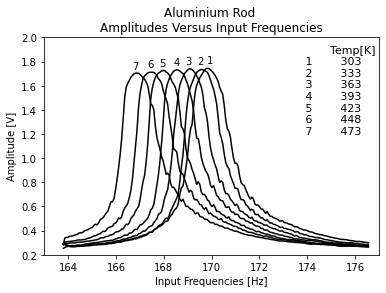

In [20]:
# Plots each temperature's frequency as a function of amplitude
plt.plot(alum_frequency_of_driver, alum_amplitude_at_303, color = 'black')
plt.plot(alum_frequency_of_driver, alum_amplitude_at_333, color = 'black')
plt.plot(alum_frequency_of_driver, alum_amplitude_at_363, color = 'black')
plt.plot(alum_frequency_of_driver, alum_amplitude_at_393, color = 'black' )
plt.plot(alum_frequency_of_driver, alum_amplitude_at_423, color = 'black' )
plt.plot(alum_frequency_of_driver, alum_amplitude_at_448, color = 'black' )
plt.plot(alum_frequency_of_driver, alum_amplitude_at_473, color = 'black' )

# Shows the table with the various temperatures
plt.text(173.8,1.2,'        Temp[K]\n 1        303\n 2        333\n 3        363\n 4        '       
         '393\n 5        423\n 6        448\n 7        473', 
         color='black', size= 11)

# Shows the label on each plot
plt.text(169.8, 1.79, '1')
plt.text(169.4, 1.78, '2')
plt.text(168.9, 1.78, '3')
plt.text(168.4, 1.77, '4')
plt.text(167.8, 1.76, '5')
plt.text(167.3, 1.75, '6')
plt.text(166.7, 1.74, '7')

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Aluminium Rod \nAmplitudes Versus Input Frequencies")

plt.xlim(163,177)
plt.ylim(0.2,2)

### Lorentzian Fitting

In [21]:
# Lorentzian parameter fitting for 303 
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_303)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_303)), sum(alum_frequency_of_driver * alum_amplitude_at_303) / 
          sum(alum_amplitude_at_303)]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_303, p0 = pguess)

# Results
alum_Δw_303, alum_w0_303 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives the full 
# bandwidth at half maximum amplitude as a is half the bandwidth


# Reference for this code. I use this same code for each lorentzian function.

# [40] B. Prudholm (2014) Fit points to a Lorentzian curve and find center and half 
# maximum bandwidth in Python. [online] Stack Overflow. 
# Available at: <https://stackoverflow.com/questions/24437070/fit-points-to-a-lorentzian-
# curve-and-find-center-and-half-maximum-bandwidth-in-p> [Accessed 3 October 2022].

In [22]:
# Lorentzian parameter fitting for 333 
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_333)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_333)), sum(alum_frequency_of_driver * alum_amplitude_at_333) / 
          sum(alum_amplitude_at_333)]
 
# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_333, p0 = pguess)

# Results
alum_Δw_333, alum_w0_333 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude


In [23]:
# Lorentzian parameter fitting for 363 
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_363)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_363)), sum(alum_frequency_of_driver * alum_amplitude_at_363) / 
          sum(alum_amplitude_at_363)]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_363, p0 = pguess)

# Results
alum_Δw_363, alum_w0_363 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [24]:
# Lorentzian parameter fitting for 393 
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_393)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_393)), sum(alum_frequency_of_driver * alum_amplitude_at_393) / 
          sum(alum_amplitude_at_393)]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_393, p0 = pguess)

# Results
alum_Δw_393, alum_w0_393 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [25]:
# Lorentzian parameter fitting for 423
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_423)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_423)), sum(alum_frequency_of_driver * alum_amplitude_at_423) / 
          sum(alum_amplitude_at_423)]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_423, p0 = pguess)

# Results
alum_Δw_423, alum_w0_423 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [26]:
# Lorentzian parameter fitting for 448
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_448)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_448)), sum(alum_frequency_of_driver * alum_amplitude_at_448) / 
          sum(alum_amplitude_at_448)]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_448, p0 = pguess)

# Results
alum_Δw_448, alum_w0_448 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [27]:
# Lorentzian parameter fitting for 473 
def lorentzian(x, a, x0):
    return (max(alum_amplitude_at_473)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(alum_amplitude_at_473 )), sum(alum_frequency_of_driver * alum_amplitude_at_473 ) / 
          sum(alum_amplitude_at_473 )]

# Fit the data
popt, pcov = curve_fit(lorentzian, alum_frequency_of_driver, alum_amplitude_at_473 , p0 = pguess)

# Results
alum_Δw_473 , alum_w0_473  = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

## Brass

### Rod Readings

In [28]:
# Input voltages into the rod
brs_inp_volt = np.arange(2.49,2.8,0.001)

brs_frequency_of_driver = 64.06859542*brs_inp_volt + 6.83574122
# Gives the input voltage as the corresponding frequency

In [29]:
# Amplitudes received at 303K 
brs_amplitude_at_303 = np.array([0.29615205320493787, 0.2969167747477188, 0.284426322882296, 0.27983799362561024, 0.2711711494740923, 0.2688769848457495, 0.2663279130364796, 0.26454356276999025, 0.2647984699509173, 0.26479846995091727, 0.2653082843127715, 0.26607300585555266, 0.26556319149369845, 0.26632791303647946, 0.26734754176018766, 0.26964170638853047, 0.2683671704838956, 0.2683671704838956, 0.2691318920266765, 0.26989661356945743, 0.26938679920760344, 0.2714260566550193, 0.27066133511223833, 0.2719358710168732, 0.2714260566550193, 0.2732104069215081, 0.27295549974058114, 0.2737202212833621, 0.27295549974058114, 0.27423003564521603, 0.27346531410243513, 0.274484942826143, 0.2747398500070701, 0.274994757187997, 0.27524966436892406, 0.27728892181634024, 0.2785634577209753, 0.2783085505400483, 0.2788183649019024, 0.27856345772097535, 0.2785634577209753, 0.27983799362561046, 0.27983799362561046, 0.28060271516839136, 0.2813674367111723, 0.2821321582539532, 0.2821321582539532, 0.2826419726158072, 0.2834066941585881, 0.2839165085204421, 0.28417141570136906, 0.284426322882296, 0.28544595160600394, 0.2859557659678579, 0.2862106731487849, 0.28672048751063883, 0.28672048751063894, 0.28799502341527417, 0.28901465213898225, 0.2897793736817634, 0.29258335267196023, 0.2923284454910332, 0.29334807421474113, 0.29105390958639826, 0.294622610119376, 0.29513242448123, 0.29538733166215697, 0.2958971460240109, 0.2964069603858649, 0.2971716819286458, 0.2969167747477188, 0.29921093937606164, 0.29921093937606164, 0.300995289642551, 0.29793640347142675, 0.2992109393760617, 0.2994658465569887, 0.29997566091884276, 0.304818897356456, 0.30456399017552904, 0.30532871171831, 0.30634834044201786, 0.3073679691657259, 0.30456399017552904, 0.3073679691657258, 0.3073679691657258, 0.3073679691657258, 0.3071130619847988, 0.30813269070850674, 0.30915231943221483, 0.3119562984224121, 0.3122112056033391, 0.3117013912414851, 0.31348574150797415, 0.315015184593536, 0.3162897204981709, 0.3167995348600249, 0.31807407076465977, 0.31934860666929465, 0.3208780497548565, 0.3211329569357835, 0.32419184310690785, 0.3236820287450537, 0.3244467502878349, 0.32801545082081274, 0.3262311005543239, 0.3285252651826667, 0.3300547082682286, 0.3313292441728636, 0.3323488728965714, 0.33413322316306077, 0.33515285188676885, 0.33591757342954986, 0.33821173805789273, 0.3407608098671625, 0.34280006731457835, 0.3435647888573593, 0.3456040463047752, 0.34738839657126447, 0.3489178396568267, 0.3535061689135123, 0.3558003335418552, 0.35529051918000115, 0.35783959098927165, 0.3614082915222494, 0.3639573633315193, 0.36497699205522716, 0.36905550695005906, 0.37134967157840243, 0.3716045787593293, 0.3807812372727013, 0.38231068035826343, 0.38333030908197135, 0.38791863833865714, 0.3963305753092481, 0.39709529685202904, 0.403213069194277, 0.4095857487174518, 0.4093308415365248, 0.41391917079321117, 0.42233110776380156, 0.43125285909624667, 0.4289586944679039, 0.43278230218180874, 0.4503708976657716, 0.4483316402183554, 0.4534297838368954, 0.46974384341622305, 0.4682144003306611, 0.47356745113012827, 0.49013641789038315, 0.5079799205552732, 0.5059406631078571, 0.505175941565076, 0.5388236894474396, 0.5610006141880886, 0.5607457070071613, 0.5890404040900583, 0.6147860293636848, 0.6152958437255387, 0.6471592413414136, 0.7170038089154109, 0.7692597810054453, 0.7850640262229194, 0.8324767618753409, 0.917360853124031, 1.007852902353115, 1.1228160409511907, 1.232171221568873, 1.3303104862257673, 1.4490972325377478, 1.5686487003925098, 1.626767537643865, 1.6507288126510027, 1.6657683363256957, 1.6708664799442356, 1.6698468512205278, 1.6571014921741773, 1.6428266900422663, 1.6300813309959161, 1.5949041400279906, 1.5321969735199488, 1.4694898070119078, 1.4246261431687561, 1.3532521325091966, 1.2839173792970537, 1.22987705694053, 1.1602873965474596, 1.1332672353691984, 1.121286597865629, 1.0743836765750614, 1.0075979951721883, 0.9831269058031966, 0.9821072770794885, 0.9405574065883876, 0.8872818057746453, 0.8495555429974496, 0.8087703940491299, 0.796279942183707, 0.7975544780883421, 0.7554947932353875, 0.6953366985366162, 0.6948268841747621, 0.7093565934876012, 0.6629634865588874, 0.6400218402754574, 0.6300804602193049, 0.607903535478656, 0.607648628297729, 0.610197700106999, 0.5635496859973586, 0.5523337700365704, 0.5686478296158983, 0.5500396054082276, 0.5253136088583086, 0.529901938114995, 0.5118035282691779, 0.48937169634760214, 0.5133329713547397, 0.4944698399661422, 0.4651555141595374, 0.4750968942156904, 0.4684693075115883, 0.4605671849028517, 0.4562337628270924, 0.4508807120276255, 0.43737063143849475, 0.4330372093627357, 0.4409393319714727, 0.42615471547770667, 0.4220762005828746, 0.4230958293065826, 0.41748787132618903, 0.4123897277076491, 0.407036676908182, 0.40397779073705803, 0.3925069675953433, 0.3902128029670003, 0.3897029886051461, 0.3828204947201173, 0.3789968870062121, 0.3779772582825041, 0.3754281864732342, 0.3688005997691321, 0.3695653213119131, 0.368545692588205, 0.36293773460781137, 0.3626828274268844, 0.3626828274268844, 0.3588592197129795, 0.3550356119990742, 0.3550356119990742, 0.3509570971042425, 0.3481531181140457, 0.3484080252949727, 0.34483932476199425, 0.3425451601336514, 0.3399960883243816, 0.3407608098671625, 0.33821173805789273, 0.3364273877914039, 0.3348979447058419, 0.33413322316306077, 0.33158415135379044, 0.33260378007749836, 0.3305645226300825, 0.325211471830616, 0.32725072927803184, 0.32699582209710487, 0.325211471830616, 0.3234271215641266, 0.32419184310690785, 0.32138786411671044, 0.32138786411671044, 0.31883879230744067, 0.31934860666929465, 0.31450537023168207, 0.31476027741260904, 0.3160348133172439, 0.31476027741260904, 0.313995555869828, 0.31246611278426617, 0.311191576879631, 0.3086425050703607, 0.30787778352757983, 0.30889741225128775, 0.30787778352757983, 0.30685815480387185, 0.30634834044201786, 0.305073804537383, 0.305073804537383, 0.3037992686327481, 0.3022698255471862, 0.3009952896425509, 0.30074038246162393, 0.29895603219513467, 0.29666186756679186, 0.29921093937606164, 0.29564223884308394, 0.294622610119376, 0.2941127957575221, 0.29334807421474113, 0.2923284454910332, 0.2918186311291793, 0.29207353831010624, 0.29130881676732534, 0.2902891880436174, 0.2902891880436173, 0.2895244665008364, 0.28926955931990933])

In [30]:
# Amplitudes received at 333K 
brs_amplitude_at_333 = np.array([0.2969167747477188, 0.2969167747477187, 0.2907990024054713, 0.28493613724415, 0.2775438289972672, 0.27346531410243513, 0.2711711494740923, 0.26964170638853047, 0.2711711494740923, 0.27091624229316535, 0.2719358710168732, 0.2714260566550193, 0.2711711494740923, 0.2727005925596542, 0.27346531410243513, 0.2737202212833621, 0.2737202212833621, 0.27346531410243513, 0.2727005925596542, 0.27295549974058114, 0.2732104069215081, 0.27423003564521603, 0.276779107454486, 0.2783085505400483, 0.2785634577209753, 0.27779873617819417, 0.276524200273559, 0.2760143859117051, 0.27626929309263204, 0.2788183649019024, 0.27881836490190237, 0.27983799362561035, 0.2788183649019024, 0.28060271516839136, 0.2813674367111723, 0.2813674367111722, 0.28187725107302625, 0.28289687979673417, 0.2826419726158072, 0.2836616013395151, 0.284426322882296, 0.2839165085204421, 0.287230301872493, 0.28697539469156597, 0.28977937368176343, 0.2907990024054713, 0.29003428086269034, 0.28875974495805534, 0.28824993059620124, 0.28875974495805534, 0.2897793736817634, 0.2895244665008363, 0.28977937368176343, 0.2905440952245444, 0.2905440952245443, 0.2905440952245443, 0.29207353831010624, 0.29513242448123, 0.29436770293844905, 0.2969167747477188, 0.2981913106523537, 0.2976814962904998, 0.2989560321951347, 0.2964069603858649, 0.2997207537379157, 0.3015051040044051, 0.3035443614518211, 0.30456399017552904, 0.3035443614518211, 0.3037992686327481, 0.3037992686327481, 0.305583618899237, 0.304818897356456, 0.3060934332610909, 0.3071130619847988, 0.30762287634665275, 0.30991704097499573, 0.30762287634665275, 0.30762287634665275, 0.31042685533684977, 0.315015184593536, 0.31246611278426606, 0.31221120560333915, 0.3129759271461202, 0.31450537023168207, 0.3160348133172439, 0.3198584210311486, 0.3216427712976374, 0.3236820287450537, 0.32419184310690785, 0.3249565646496889, 0.3249565646496889, 0.32495656464968903, 0.3262311005543239, 0.32699582209710487, 0.32801545082081274, 0.3300547082682286, 0.33158415135379044, 0.3285252651826667, 0.33081942981100954, 0.33260378007749847, 0.3336234088012066, 0.33617248061047694, 0.3402509955053086, 0.33821173805789273, 0.3394862739625276, 0.34662367502848335, 0.34764330375219155, 0.3450942319429212, 0.35044728274238857, 0.3527414473707314, 0.34866293247589963, 0.3514669114660965, 0.3535061689135123, 0.3545257976372202, 0.35681996226556345, 0.3621730130650304, 0.36191810588410345, 0.36319264178873834, 0.3672711566835701, 0.3705849500356214, 0.3716045787593295, 0.3749183721113802, 0.3782321654634311, 0.377977258282504, 0.3851146593484602, 0.38944808142421916, 0.3902128029670003, 0.39684038967110213, 0.40550723382262016, 0.4083112128128169, 0.4085661199937439, 0.41468389233599223, 0.4164682426024811, 0.4208016646782397, 0.42640962265863375, 0.43737063143849486, 0.4355862811720058, 0.43660590989571374, 0.4547043197415304, 0.45623376282709227, 0.45954755617914345, 0.4743321726729094, 0.4776459660249602, 0.48299901682442725, 0.4939600256042881, 0.5158820431640099, 0.5222547226871848, 0.5089995492789811, 0.5446865546087607, 0.5775695809483434, 0.5658438506257015, 0.5870011466426422, 0.6193743586203708, 0.6201390801631519, 0.6351786038378446, 0.6968661416221782, 0.7478475778075776, 0.7384160121132787, 0.7588085865874385, 0.8447123065598365, 0.9329101911605779, 1.031814177360253, 1.1439733369681317, 1.2510343529574708, 1.3795075721446775, 1.5319420663390217, 1.6191203222160553, 1.6593956568025205, 1.6836118389905856, 1.69763173394157, 1.7014553416554752, 1.6958473836750811, 1.6866707251617097, 1.6749449948390676, 1.6578662137169586, 1.6239635586536678, 1.5857274815146183, 1.5556484341652328, 1.4779017439824986, 1.3963314460858591, 1.333114465215964, 1.2625051760991854, 1.2054059675715383, 1.1822094141071815, 1.140659543616081, 1.0644422965189086, 1.031814177360253, 1.0473635153967997, 1.0070881808103342, 0.9484595291971246, 0.9150666884956881, 0.8763207969947843, 0.8551635009778437, 0.8510849860830116, 0.8085154868682031, 0.7445337844555266, 0.7233764884385858, 0.7445337844555265, 0.715219458648922, 0.6606693219305446, 0.6571006213975666, 0.6423160049038006, 0.6288059243146698, 0.6239626878770568, 0.5989817841462111, 0.5638045931782855, 0.5752754163200002, 0.5834324461096643, 0.5411178540757826, 0.5383138750855857, 0.5436669258850524, 0.5102740851836159, 0.5235292585918198, 0.5227645370490389, 0.4880971604429673, 0.4865677173574053, 0.49319530406150686, 0.4832539240053542, 0.46541042134046434, 0.4679594931497341, 0.4580181130935815, 0.4519003407513337, 0.4587828346363625, 0.44807673303742834, 0.4381353529812758, 0.43125285909624667, 0.4309979519153197, 0.4243703652112177, 0.4167231497834081, 0.41621333542155403, 0.40780139845096297, 0.40474251227983926, 0.40601704818447415, 0.4027032548324231, 0.39709529685202904, 0.396840389671102, 0.3963305753092481, 0.39046771014792714, 0.3848597521675332, 0.3835852162628983, 0.3800165157299203, 0.37542818647323417, 0.37644781519694215, 0.3736438362067453, 0.3688005997691321, 0.36676134232171603, 0.36752606386449693, 0.36370245615059227, 0.36319264178873834, 0.3616631987031765, 0.35554542636092823, 0.3535061689135123, 0.3527414473707314, 0.3512120042851695, 0.34840802529497256, 0.34968256119960756, 0.34662367502848346, 0.34458441758106717, 0.3420353457717974, 0.3407608098671625, 0.33846664523881975, 0.33617248061047694, 0.3366822949723309, 0.33438813034398784, 0.3323488728965714, 0.33260378007749847, 0.3297998010873016, 0.3275056364589588, 0.32776054363988577, 0.32699582209710487, 0.32546637901154296, 0.32470165746876195, 0.32470165746876195, 0.32317221438319976, 0.3226624000213455, 0.3224074928404185, 0.32470165746876195, 0.32419184310690785, 0.3239369359259808, 0.3203682353930025, 0.315015184593536, 0.315015184593536, 0.31527009177446297, 0.315015184593536, 0.3129759271461201, 0.3119562984224121, 0.30889741225128764, 0.3086425050703607, 0.30685815480387185, 0.30558361889923696, 0.304818897356456, 0.3035443614518211, 0.30354436145182107, 0.30328945427089415, 0.30226982554718607, 0.30176001118533213, 0.30201491836625916, 0.3037992686327481, 0.3037992686327481, 0.3037992686327481, 0.3007403824616238, 0.2984462178332807, 0.29793640347142675, 0.2971716819286458, 0.2958971460240109, 0.294622610119376, 0.2936029813956681, 0.2936029813956681, 0.29309316703381416])

In [31]:
# Amplitudes received at 363K 
brs_amplitude_at_363 = np.array([0.30277963990904, 0.3101719481559228, 0.30328945427089404, 0.29513242448123, 0.29028918804361725, 0.2864655803297119, 0.28417141570136906, 0.2821321582539532, 0.27881836490190237, 0.2780536433591213, 0.27703401463541305, 0.2775438289972672, 0.2775438289972672, 0.2783085505400483, 0.27779873617819417, 0.2783085505400483, 0.27983799362561035, 0.27932817926375647, 0.2800929008065374, 0.2803478079874643, 0.28187725107302625, 0.28289687979673417, 0.28289687979673417, 0.284426322882296, 0.2859557659678579, 0.28799502341527405, 0.2892695593199092, 0.28901465213898225, 0.2890146521389824, 0.28824993059620113, 0.28672048751063894, 0.2864655803297119, 0.287230301872493, 0.28723030187249304, 0.2885048377771282, 0.2895244665008364, 0.2902891880436173, 0.2905440952245444, 0.2918186311291793, 0.2923284454910332, 0.2923284454910332, 0.2928382598528872, 0.29334807421474113, 0.29334807421474113, 0.29742658910957276, 0.29921093937606164, 0.2994658465569886, 0.3015051040044051, 0.3027796399090402, 0.3027796399090402, 0.3030345470899672, 0.3027796399090402, 0.30201491836625927, 0.30252473272811314, 0.3002305680997698, 0.3012501968234781, 0.3022698255471862, 0.30201491836625927, 0.30226982554718623, 0.3037992686327481, 0.3043090829946021, 0.30456399017552904, 0.305073804537383, 0.30685815480387185, 0.3094072266131418, 0.3119562984224121, 0.315015184593536, 0.315015184593536, 0.3160348133172439, 0.3167995348600249, 0.3173093492218788, 0.31909369948836763, 0.31527009177446297, 0.31476027741260904, 0.31654462767909786, 0.31781916358373274, 0.3173093492218788, 0.31807407076465977, 0.32215258565949156, 0.32189767847856443, 0.3224074928404185, 0.32419184310690785, 0.3244467502878349, 0.3244467502878348, 0.32597619337339695, 0.32699582209710487, 0.32954489390637465, 0.3300547082682286, 0.33336850162027964, 0.3343881303439879, 0.335407759067696, 0.3389764596006737, 0.3389764596006737, 0.33719210933418475, 0.3389764596006737, 0.34101571704808953, 0.3422902529527244, 0.3425451601336514, 0.34458441758106717, 0.34509423194292116, 0.3468785822094104, 0.34942765401868064, 0.35427089045629323, 0.3512120042851695, 0.35554542636092823, 0.35962394125576064, 0.35783959098927165, 0.3616631987031765, 0.3652318992361542, 0.36497699205522716, 0.3672711566835701, 0.3726242074830374, 0.3726242074830374, 0.3741536505685993, 0.37517327929230715, 0.3797616085489932, 0.38103614445362827, 0.38205577317733647, 0.38638919525309506, 0.388173545519584, 0.3917422460525624, 0.397350204032956, 0.3998992758422258, 0.399389461480372, 0.407546491270036, 0.4134093564313571, 0.41493879951691925, 0.42054675749731274, 0.4251350867539987, 0.43125285909624667, 0.43584118835293284, 0.4475669186755744, 0.44884145458020946, 0.4447629396853775, 0.46464569979768333, 0.469488936235296, 0.4720380080445662, 0.4801950378342301, 0.48784225326204017, 0.4959992830517043, 0.499567983584682, 0.5250587016773818, 0.5449414617896876, 0.5237841657727468, 0.5528435843984246, 0.6017857631364081, 0.5994915985080651, 0.594138547708598, 0.6257470381435458, 0.6588849716640556, 0.6703557948057703, 0.7060428001355501, 0.7679852451008105, 0.7781815323378904, 0.7950054062790721, 0.8913603206694771, 0.9798131124511453, 1.0710698832230103, 1.1699738694226856, 1.2711720202507033, 1.3976059819904942, 1.547491404375569, 1.638748175147434, 1.676729345105557, 1.7001808057508399, 1.7113967217116284, 1.7129261647971905, 1.710122185806993, 1.702474970379183, 1.6902394256946878, 1.6749449948390676, 1.6410423397757772, 1.6030611698176542, 1.5740017511919764, 1.5031375548942716, 1.405763011780158, 1.340761680643774, 1.2721916489744114, 1.224014191779209, 1.203111802943195, 1.1625815611758026, 1.0942664366873671, 1.0578147098148065, 1.0695404401374482, 1.022637518846881, 0.9578910948914237, 0.9257727900946218, 0.8908505063076234, 0.8758109826329303, 0.8689284887479015, 0.8271237110758738, 0.7605929368539274, 0.7539653501498256, 0.7730833887193503, 0.7300040751426878, 0.6864149472041713, 0.6746892168815293, 0.6502181275125377, 0.6486886844269755, 0.6461396126177055, 0.605099556488459, 0.5798637455766864, 0.5982170626034302, 0.5844520748333721, 0.5513141413128625, 0.5617653357308696, 0.5434120187041256, 0.5212350939634769, 0.5411178540757827, 0.5265881447629438, 0.49599928305170427, 0.5069602918315651, 0.496764004594485, 0.4883520676238941, 0.48503827427184343, 0.4781557803868142, 0.46668495724509923, 0.4651555141595374, 0.47025365777807726, 0.4470571043137205, 0.4460374755900123, 0.44323349659981554, 0.4353313739910787, 0.43303720936273554, 0.42819397292512296, 0.42335073648750965, 0.41748787132618903, 0.41748787132618903, 0.41111519180301404, 0.40729158408910904, 0.40321306919427713, 0.397350204032956, 0.39429131786183225, 0.39709529685202904, 0.39480113222368624, 0.387408823976803, 0.387408823976803, 0.3871539167958761, 0.3820557731773363, 0.3800165157299203, 0.3746634649304533, 0.36829078540727817, 0.36727115668356997, 0.36931041413098614, 0.3659966207789351, 0.3611533843413225, 0.3614082915222495, 0.3591141268939067, 0.35681996226556334, 0.35401598327536626, 0.3535061689135123, 0.3489178396568267, 0.3463687678475564, 0.3496825611996076, 0.3463687678475564, 0.3463687678475564, 0.3478982109331187, 0.3435647888573593, 0.34178043859087043, 0.3399960883243816, 0.33821173805789273, 0.3364273877914038, 0.33413322316306077, 0.3331135944393525, 0.33158415135379044, 0.3323488728965714, 0.3292899867254476, 0.32699582209710487, 0.3262311005543239, 0.3275056364589588, 0.3236820287450537, 0.32240749284041853, 0.32317221438319965, 0.3229173072022725, 0.3203682353930025, 0.32215258565949156, 0.32215258565949145, 0.3196035138502216, 0.31883879230744067, 0.31705444204095184, 0.31348574150797415, 0.3129759271461201, 0.3119562984224122, 0.3114464840605581, 0.30991704097499584, 0.3127210199651932, 0.30889741225128764, 0.3096621337940689, 0.31068176251777696, 0.30634834044201786, 0.305073804537383, 0.305073804537383, 0.30583852608016393, 0.3037992686327481, 0.30558361889923696, 0.30558361889923696, 0.30456399017552904, 0.3043090829946021, 0.30456399017552904, 0.3037992686327481, 0.3007403824616238, 0.29895603219513467, 0.2958971460240109, 0.294877517300303, 0.29436770293844905, 0.294622610119376, 0.29309316703381416, 0.2928382598528872, 0.2923284454910332, 0.2923284454910332])

In [32]:
# Amplitudes received at 393K
brs_amplitude_at_393 = np.array([0.299720753737916, 0.30889741225128786, 0.307622876346653, 0.30150510400440506, 0.294877517300303, 0.29207353831010624, 0.28697539469156597, 0.2885048377771283, 0.284681230063223, 0.284426322882296, 0.2857008587869309, 0.28621067314878496, 0.28672048751063894, 0.2857008587869309, 0.284426322882296, 0.2836616013395151, 0.284426322882296, 0.28417141570136906, 0.284426322882296, 0.284426322882296, 0.2859557659678579, 0.28646558032971187, 0.2877401162343472, 0.28748520905342023, 0.2890146521389824, 0.2936029813956681, 0.29615205320493787, 0.29793640347142675, 0.2976814962904998, 0.2981913106523537, 0.29921093937606164, 0.30074038246162393, 0.3002305680997699, 0.30048547528069686, 0.29972075373791585, 0.29793640347142675, 0.29615205320493787, 0.2992109393760617, 0.29921093937606164, 0.2999756609188428, 0.300995289642551, 0.3017600111853322, 0.3022698255471862, 0.30150510400440506, 0.30252473272811314, 0.3027796399090402, 0.3043090829946021, 0.30634834044201786, 0.30762287634665275, 0.3078777835275798, 0.30915231943221466, 0.3096621337940687, 0.31017194815592275, 0.3142504630507551, 0.31119157687963117, 0.31068176251777685, 0.3083875978894338, 0.3096621337940687, 0.3109366696987038, 0.3117013912414851, 0.31348574150797404, 0.3142504630507551, 0.3129759271461201, 0.3142504630507551, 0.31476027741260904, 0.31654462767909786, 0.31807407076465977, 0.3196035138502216, 0.3221525856594914, 0.3236820287450537, 0.3244467502878349, 0.32495656464968903, 0.325211471830616, 0.32674091491617785, 0.32776054363988577, 0.3275056364589588, 0.3292899867254476, 0.3285252651826667, 0.3287801723635937, 0.3297998010873016, 0.3323488728965714, 0.33285868725842543, 0.3336234088012066, 0.33617248061047694, 0.33744701651511183, 0.33923136678160065, 0.3407608098671625, 0.34101571704808953, 0.3430549744955054, 0.34534913912384824, 0.34917274683775357, 0.35044728274238857, 0.35172181864702345, 0.3535061689135123, 0.3550356119990742, 0.35605524072278216, 0.35911412689390654, 0.35860431253205255, 0.35758468380834446, 0.3608984771603955, 0.3626828274268844, 0.3644671776933732, 0.3639573633315193, 0.36829078540727805, 0.3690555069500592, 0.3726242074830374, 0.376957629558796, 0.3782321654634311, 0.37925179418713917, 0.3830754019010443, 0.3889382670623651, 0.39046771014792725, 0.3937815034999783, 0.397605111213883, 0.39836983275666393, 0.4029581620133501, 0.4098406558983788, 0.41035047026023286, 0.408566119993744, 0.4187624072308239, 0.42462527239214454, 0.4251350867539986, 0.43176267345810065, 0.43711572425756795, 0.44017461042869177, 0.44578256840908537, 0.4618417208074865, 0.4592926489982164, 0.45623376282709255, 0.4801950378342304, 0.48809716044296714, 0.4863128101764783, 0.502371962574879, 0.5089995492789811, 0.5151173216212287, 0.5281175878485058, 0.5566671921123294, 0.5719616229679493, 0.5510592341319355, 0.5801186527576132, 0.6374727684661876, 0.6412963761800924, 0.6407865618182386, 0.6723950522531863, 0.7078271504020391, 0.727455003333418, 0.7802207897853064, 0.8503202645402308, 0.8671441384814124, 0.8987526289163604, 0.9989311510206702, 1.1159335470661622, 1.2342104790162889, 1.3578404617658828, 1.4814704445154767, 1.5806293378960785, 1.6573563993551048, 1.6999258985699128, 1.7167497725110952, 1.7223577304914894, 1.7187890299585113, 1.708592742721431, 1.6915139615993227, 1.6701017584014548, 1.647160112118025, 1.6203948581206897, 1.5569229700698681, 1.4740781362685937, 1.452411025889799, 1.3996452394379102, 1.3114473548371692, 1.2546030534904484, 1.213053182999348, 1.1715033125082475, 1.1350515856356869, 1.0945213438682941, 1.024166961932443, 0.9759895047372407, 0.9971468007541813, 0.9861857919743203, 0.920419739295155, 0.8811640334323974, 0.8594969230536027, 0.8442024921979827, 0.8187117741052828, 0.7965348493646343, 0.7509064639787015, 0.7210823238102428, 0.7447886916364537, 0.7284746320571258, 0.6670420014537194, 0.6550613639501506, 0.6634733009207412, 0.6402767474563846, 0.6183547298966627, 0.6150409365446118, 0.5844520748333722, 0.5676282008921905, 0.592609104623036, 0.5643144075401393, 0.5265881447629437, 0.5457061833324686, 0.5286274022103596, 0.510019178002689, 0.5156271359830826, 0.49982289076560893, 0.48427355272906236, 0.4863128101764783, 0.48988151070945607, 0.46795949314973423, 0.46464569979768344, 0.4636260710739755, 0.45342978383689553, 0.4511356192085527, 0.44756691867557424, 0.4401746104286916, 0.42946850882975784, 0.43380193090551655, 0.42946850882975784, 0.42182129340194763, 0.4195271287736048, 0.4141740779741383, 0.4095857487174518, 0.4106053774411599, 0.40601704818447404, 0.39658548249017506, 0.3902128029670003, 0.39352659631905135, 0.39327168913812427, 0.38689900961494905, 0.3843499378056793, 0.3818008659964095, 0.37568309365416114, 0.37338892902581833, 0.3726242074830374, 0.36676134232171603, 0.3626828274268844, 0.3639573633315193, 0.36370245615059227, 0.3621730130650304, 0.36064356997946856, 0.3603886627985416, 0.3601337556176146, 0.3573297766274175, 0.3552905191800012, 0.34993746838053463, 0.3450942319429213, 0.34738839657126463, 0.3448393247619942, 0.34178043859087043, 0.3407608098671625, 0.34101571704808953, 0.33617248061047694, 0.33540775906769593, 0.33591757342955, 0.3336234088012067, 0.3318390585347174, 0.33158415135379044, 0.3318390585347174, 0.3318390585347174, 0.3305645226300825, 0.3287801723635937, 0.3264860077352509, 0.32572128619247, 0.3262311005543239, 0.3247016574687619, 0.3244467502878349, 0.3216427712976374, 0.32011332821207555, 0.3173093492218788, 0.3175642564028058, 0.31552499895539, 0.31476027741260904, 0.31450537023168207, 0.3139955558698281, 0.31246611278426606, 0.31042685533685, 0.30915231943221483, 0.30991704097499584, 0.3078777835275798, 0.30889741225128764, 0.3094072266131417, 0.3078777835275798, 0.3078777835275798, 0.30813269070850674, 0.3073679691657259, 0.30583852608016393, 0.3060934332610909, 0.305073804537383, 0.3035443614518211, 0.3035443614518211, 0.3015051040044051, 0.3002305680997698, 0.2984462178332807, 0.29972075373791573, 0.29946584655698877, 0.29513242448123, 0.2976814962904998, 0.2969167747477188, 0.29564223884308394, 0.29615205320493787, 0.29666186756679186, 0.2971716819286458, 0.2981913106523537, 0.29793640347142675, 0.29309316703381416, 0.29513242448123, 0.29564223884308394, 0.29436770293844905, 0.29334807421474113])

In [33]:
# Amplitudes received at 423K 
brs_amplitude_at_423 = np.array([0.293857888576595, 0.3040541758136751, 0.30252473272811303, 0.29538733166215697, 0.2905440952245443, 0.28799502341527417, 0.285700858786931, 0.284681230063223, 0.285191044425077, 0.28824993059620124, 0.28901465213898225, 0.2915637239482523, 0.29079900240547135, 0.2910539095863983, 0.2918186311291793, 0.2915637239482523, 0.2923284454910332, 0.29309316703381416, 0.29436770293844905, 0.2958971460240109, 0.29207353831010624, 0.2918186311291793, 0.2923284454910332, 0.2923284454910332, 0.29334807421474113, 0.2936029813956681, 0.2938578885765951, 0.2938578885765951, 0.29436770293844905, 0.29793640347142675, 0.29997566091884276, 0.3040541758136751, 0.30456399017552904, 0.30456399017552904, 0.305073804537383, 0.30532871171831, 0.3066032476229449, 0.304818897356456, 0.3073679691657258, 0.3071130619847988, 0.3083875978894337, 0.3071130619847988, 0.30583852608016393, 0.30634834044201786, 0.3083875978894337, 0.3083875978894337, 0.3094072266131417, 0.3066032476229449, 0.30762287634665275, 0.30889741225128775, 0.3109366696987039, 0.31450537023168207, 0.31476027741260904, 0.31476027741260904, 0.31577990613631696, 0.31781916358373274, 0.3185838851265137, 0.3198584210311486, 0.32062314257392954, 0.3203682353930025, 0.3229173072022725, 0.3229173072022726, 0.32036823539300263, 0.3203682353930025, 0.32266240002134544, 0.3226624000213455, 0.32419184310690785, 0.32674091491617785, 0.32776054363988577, 0.32903507954452066, 0.32903507954452066, 0.3328586872584256, 0.3338783159821337, 0.33540775906769593, 0.33821173805789273, 0.34050590268623554, 0.3407608098671625, 0.34152553140994346, 0.34280006731457835, 0.3433098816764323, 0.3445844175810673, 0.3471334893903376, 0.3473883965712646, 0.3461138606666293, 0.34662367502848346, 0.35044728274238857, 0.3509570971042425, 0.3522316330088774, 0.3537610760944393, 0.35478070481814716, 0.35529051918000115, 0.3608984771603955, 0.35962394125576064, 0.36370245615059227, 0.3657417135980081, 0.37033004285469423, 0.37338892902581833, 0.37542818647323417, 0.37925179418713917, 0.37823216546343097, 0.3848597521675332, 0.38868335988143804, 0.3884284527005111, 0.39072261732885416, 0.3950560394046132, 0.39658548249017506, 0.396840389671102, 0.403213069194277, 0.4049974194607661, 0.40601704818447415, 0.41213482052672196, 0.42156638622102066, 0.4190173144117509, 0.4213114790400937, 0.43303720936273554, 0.43507646681015155, 0.44017461042869177, 0.44909636176113654, 0.44756691867557424, 0.45342978383689553, 0.4628613495311945, 0.4781557803868142, 0.47509689421569024, 0.47560670857754417, 0.5046661272032221, 0.5010974266702439, 0.5003327051274631, 0.5273528663057248, 0.5273528663057248, 0.5258234232201627, 0.5564122849314025, 0.5859815179189344, 0.5768048594055623, 0.5676282008921905, 0.6178449155348089, 0.6591398788449825, 0.6535319208645888, 0.6866698543850983, 0.7243961171622939, 0.7419847126462567, 0.7817502328708683, 0.8704579318334634, 0.9589107236151314, 1.0060685520866262, 1.0983449515821992, 1.217641512256034, 1.3425460309102628, 1.4914118245716292, 1.5964335831135523, 1.6624545429736446, 1.7009455272936207, 1.7200635658631462, 1.725416616662614, 1.7226126376724165, 1.7121614432544092, 1.6968670123987895, 1.6739253661153597, 1.638748175147434, 1.6094338493408293, 1.5801195235342245, 1.5110396775030082, 1.4065277333229393, 1.3303104862257669, 1.3109375404753152, 1.2597011971089889, 1.1952096803344585, 1.1483067590438911, 1.0899330146116084, 1.0552656380055367, 1.0430300933210408, 1.0050489233629183, 0.9415770353120955, 0.9176157603049578, 0.9321454696177967, 0.8933995781168932, 0.8368101839510999, 0.8113194658584, 0.7812404185090143, 0.7662008948343213, 0.7644165445678324, 0.7279648176952718, 0.6764735671480182, 0.6838658753949013, 0.6976308631649593, 0.6504730346934645, 0.631100088943013, 0.6359433253806256, 0.6005112272317732, 0.6002563200508461, 0.6030602990410431, 0.5620202429117964, 0.5523337700365704, 0.5660987578066285, 0.5441767402469065, 0.5253136088583086, 0.5357648032763155, 0.510019178002689, 0.49956798358468213, 0.5176663934304988, 0.49090113943316405, 0.48376373836720843, 0.4824892024625734, 0.4720380080445663, 0.4679594931497341, 0.46107699926470563, 0.46311625671212137, 0.44654728995186643, 0.4475669186755743, 0.4493512689420636, 0.43252739500088166, 0.43252739500088155, 0.4292136016488309, 0.4213114790400937, 0.4185075000498969, 0.4167231497834081, 0.40933084153652494, 0.40397779073705814, 0.402703254832423, 0.40091890456593393, 0.39582076094739416, 0.3950560394046132, 0.3907226173288543, 0.38817354551958394, 0.3889382670623651, 0.38868335988143804, 0.38231068035826327, 0.3759380008350881, 0.3782321654634311, 0.37517327929230715, 0.3718594859402565, 0.36854569258820497, 0.3639573633315193, 0.3624279202459574, 0.3603886627985416, 0.3601337556176146, 0.3560552407227823, 0.3532512617325853, 0.35299635455165834, 0.3496825611996076, 0.3450942319429213, 0.34534913912384824, 0.34687858220941054, 0.34687858220941054, 0.3461138606666293, 0.3448393247619942, 0.3412706242290165, 0.3407608098671625, 0.3420353457717974, 0.3394862739625276, 0.3366822949723309, 0.33974118114345464, 0.3328586872584256, 0.32827035800173976, 0.32903507954452066, 0.32674091491617785, 0.32546637901154296, 0.32470165746876195, 0.3247016574687619, 0.3244467502878349, 0.3229173072022725, 0.3218976784785645, 0.3203682353930025, 0.32062314257392954, 0.32215258565949145, 0.32062314257392954, 0.31883879230744067, 0.31781916358373274, 0.3160348133172439, 0.31909369948836763, 0.31476027741260904, 0.31476027741260904, 0.3139955558698281, 0.3109366696987039, 0.30966213379406876, 0.30889741225128775, 0.30634834044201786, 0.30558361889923696, 0.30532871171831, 0.30456399017552904, 0.3037992686327481, 0.3040541758136751, 0.3027796399090401, 0.3015051040044051, 0.3035443614518211, 0.3040541758136751, 0.3037992686327481, 0.30328945427089415, 0.3037992686327481, 0.3017600111853322, 0.30125019682347814, 0.3002305680997699, 0.29946584655698877, 0.2984462178332808, 0.2976814962904998, 0.2981913106523537, 0.29334807421474113, 0.2928382598528872, 0.29207353831010624, 0.2915637239482523, 0.2905440952245443, 0.29003428086269045, 0.28875974495805534, 0.2885048377771282, 0.28799502341527417, 0.2887597449580553, 0.2895244665008364, 0.28977937368176343, 0.2897793736817634, 0.2895244665008364, 0.2892695593199092])

In [34]:
# Amplitudes received at 448K 
brs_amplitude_at_448 = np.array([0.2907990024054712, 0.3043090829946021, 0.3037992686327481, 0.30252473272811314, 0.29870112501420787, 0.294877517300303, 0.29258335267196023, 0.29258335267196023, 0.2874852090534201, 0.28672048751063894, 0.2905440952245443, 0.28697539469156597, 0.2877401162343472, 0.2905440952245444, 0.28799502341527405, 0.2887597449580553, 0.2918186311291793, 0.2936029813956681, 0.2938578885765951, 0.29564223884308394, 0.29615205320493787, 0.2964069603858649, 0.29742658910957276, 0.2989560321951347, 0.30150510400440506, 0.3020149183662591, 0.30176001118533213, 0.30048547528069686, 0.2999756609188428, 0.2994658465569887, 0.2992109393760617, 0.2994658465569887, 0.29921093937606164, 0.29946584655698877, 0.3002305680997698, 0.30048547528069697, 0.30201491836625916, 0.3037992686327481, 0.305073804537383, 0.3060934332610909, 0.30762287634665275, 0.3086425050703607, 0.3091523194322147, 0.3101719481559228, 0.3094072266131418, 0.3127210199651932, 0.3127210199651932, 0.315015184593536, 0.3137406486889011, 0.3160348133172439, 0.31527009177446297, 0.31476027741260904, 0.31450537023168207, 0.3162897204981709, 0.31527009177446297, 0.31577990613631696, 0.3147602774126089, 0.31577990613631696, 0.31832897794558673, 0.3226624000213455, 0.3236820287450537, 0.3244467502878349, 0.32495656464968903, 0.3254663790115429, 0.3264860077352509, 0.32776054363988577, 0.3297998010873016, 0.32903507954452066, 0.33030961544915555, 0.33234887289657145, 0.33336850162027953, 0.3320939657156444, 0.3326037800774985, 0.33336850162027953, 0.3338783159821337, 0.33540775906769593, 0.3389764596006737, 0.33821173805789273, 0.3430549744955053, 0.34381969603828627, 0.3494276540186806, 0.3512120042851695, 0.35172181864702345, 0.3552905191800012, 0.3545257976372202, 0.35554542636092823, 0.3598788484366876, 0.3591141268939066, 0.3611533843413225, 0.36421227051244626, 0.3652318992361542, 0.3680358782263512, 0.368290785407278, 0.3708398572165484, 0.37134967157840243, 0.37644781519694215, 0.3815459588154824, 0.3800165157299203, 0.38562447371031416, 0.388683359881438, 0.3960756681283211, 0.39836983275666393, 0.40499741946076623, 0.402703254832423, 0.40550723382262016, 0.4128995420695031, 0.41927222159267785, 0.41697805696433504, 0.4248801795730717, 0.4345666524482977, 0.43303720936273554, 0.4409393319714727, 0.4506258048466988, 0.4447629396853774, 0.45291996947504154, 0.46464569979768344, 0.4771361516631062, 0.4763714301203253, 0.4794303162914493, 0.508999549278981, 0.506705384650638, 0.512313342631032, 0.5551377490267674, 0.5487650695035925, 0.5403531325330015, 0.585981517918934, 0.6249823166007646, 0.6135114934590499, 0.6012759487745543, 0.6616889506542523, 0.7113958509350169, 0.7243961171622939, 0.7639067302059785, 0.8016329929831741, 0.8281433397995818, 0.8972231858307982, 1.021617890123173, 1.1414242651588618, 1.242112601625026, 1.3792526649637504, 1.5194516144735992, 1.6211595796634715, 1.6759646235627759, 1.698906269846205, 1.703749506283818, 1.6996709913889863, 1.6853961892570748, 1.6744351804772137, 1.6601603783453016, 1.631100959719624, 1.5969433974754068, 1.5436677966616639, 1.4585287982320467, 1.4103513410368442, 1.3736447069833568, 1.3068590255804833, 1.233700664654435, 1.1924057013442613, 1.1732876627747366, 1.119757154780067, 1.0659717396044706, 1.0251865906561508, 0.9706364539377734, 0.9545773015393728, 0.9540674871775184, 0.9053802156204622, 0.8518497076257926, 0.8498104501783766, 0.8612812733200915, 0.814378352029524, 0.7814953256899413, 0.7654361732915405, 0.7322982397710308, 0.7330629613138119, 0.7351022187612277, 0.6887091118325144, 0.6540417352264427, 0.6685714445392813, 0.6621987650161063, 0.6193743586203709, 0.6130016790971959, 0.607648628297729, 0.5717067157870221, 0.5903149399946932, 0.5844520748333722, 0.5411178540757826, 0.5462159976943227, 0.5515690484937895, 0.5263332375820168, 0.5176663934304989, 0.520215465239769, 0.499567983584682, 0.49421493278521506, 0.5077250133743461, 0.48427355272906214, 0.4728027295873475, 0.47152819368271215, 0.46643005006417226, 0.46056718490285153, 0.45342978383689553, 0.4521552479322605, 0.43635100271478666, 0.43584118835293284, 0.4409393319714726, 0.4289586944679039, 0.4230958293065825, 0.4230958293065825, 0.42233110776380156, 0.4136642636122841, 0.41137009898394067, 0.40729158408910904, 0.4014287189277879, 0.40091890456593376, 0.40117381174686084, 0.39531094658554017, 0.3909775245097812, 0.38944808142421916, 0.3848597521675332, 0.38333030908197135, 0.38103614445362827, 0.3769576295587962, 0.3718594859402563, 0.3695653213119131, 0.36727115668357013, 0.3639573633315193, 0.36319264178873834, 0.3598788484366876, 0.36064356997946856, 0.3614082915222495, 0.3621730130650304, 0.3603886627985416, 0.3560552407227823, 0.3522316330088774, 0.35401598327536626, 0.3489178396568266, 0.34407460321921324, 0.3448393247619942, 0.3448393247619942, 0.34483932476199425, 0.3412706242290165, 0.33566266624862295, 0.3326037800774985, 0.33336850162027953, 0.33234887289657145, 0.32903507954452066, 0.32801545082081274, 0.32827035800173976, 0.32546637901154296, 0.3249565646496889, 0.325211471830616, 0.32495656464968903, 0.32470165746876195, 0.3239369359259808, 0.3244467502878349, 0.32240749284041836, 0.3216427712976374, 0.3203682353930025, 0.3203682353930025, 0.3211329569357835, 0.3185838851265137, 0.31654462767909786, 0.31348574150797415, 0.3111915768796309, 0.31144648406055797, 0.3096621337940687, 0.30762287634665275, 0.3078777835275798, 0.30558361889923696, 0.30558361889923696, 0.30634834044201786, 0.30583852608016393, 0.3060934332610909, 0.30634834044201786, 0.30583852608016393, 0.30558361889923696, 0.30762287634665286, 0.30787778352757983, 0.30583852608016393, 0.305073804537383, 0.304818897356456, 0.30456399017552904, 0.3040541758136751, 0.3030345470899672, 0.3002305680997698, 0.29768149629049984, 0.29436770293844905, 0.29309316703381416, 0.2918186311291793, 0.29258335267196023, 0.2915637239482523, 0.2915637239482523, 0.2915637239482523, 0.29207353831010624, 0.29334807421474113, 0.29207353831010624, 0.29207353831010624, 0.2941127957575221, 0.2936029813956681, 0.29207353831010624, 0.2902891880436173, 0.2902891880436173, 0.2887597449580552, 0.28799502341527405, 0.2869753946915659, 0.285191044425077, 0.28417141570136906, 0.2826419726158071, 0.2821321582539532, 0.28111252953024535, 0.28111252953024535])

In [35]:
# Amplitudes received at 473K
brs_amplitude_at_473 = np.array([0.2854459516060041, 0.29870112501420776, 0.29615205320493787, 0.2938578885765951, 0.2923284454910332, 0.2923284454910332, 0.2910539095863983, 0.2902891880436174, 0.2907990024054713, 0.29079900240547135, 0.2915637239482523, 0.29130881676732534, 0.29207353831010624, 0.29436770293844905, 0.29436770293844905, 0.2928382598528872, 0.2941127957575221, 0.29334807421474113, 0.29334807421474113, 0.2928382598528872, 0.2923284454910332, 0.29564223884308394, 0.29615205320493787, 0.2958971460240109, 0.29742658910957276, 0.30074038246162393, 0.3027796399090401, 0.3030345470899672, 0.3040541758136751, 0.30456399017552904, 0.3043090829946021, 0.305073804537383, 0.30583852608016393, 0.30762287634665275, 0.31042685533684977, 0.31246611278426617, 0.3139955558698281, 0.31348574150797415, 0.31348574150797415, 0.315015184593536, 0.31348574150797415, 0.31348574150797415, 0.3137406486889011, 0.3129759271461202, 0.3142504630507551, 0.315015184593536, 0.3162897204981709, 0.31654462767909786, 0.3175642564028058, 0.3198584210311486, 0.32215258565949145, 0.3236820287450537, 0.32189767847856443, 0.32189767847856443, 0.3229173072022725, 0.32419184310690785, 0.32470165746876195, 0.32470165746876195, 0.32546637901154296, 0.32495656464968903, 0.32699582209710487, 0.32725072927803184, 0.32699582209710487, 0.32674091491617785, 0.32827035800173976, 0.3305645226300825, 0.33336850162027953, 0.33489794470584194, 0.33693720215325784, 0.33795683087696576, 0.3389764596006737, 0.3412706242290165, 0.34152553140994346, 0.34101571704808953, 0.3430549744955053, 0.34483932476199425, 0.3463687678475564, 0.3476433037521917, 0.3512120042851695, 0.3527414473707314, 0.3527414473707314, 0.3565650550846364, 0.3555454263609281, 0.35554542636092823, 0.3601337556176145, 0.3624279202459574, 0.36370245615059227, 0.36548680641708114, 0.37109476439747535, 0.3749183721113803, 0.37721253673972316, 0.3823106803582633, 0.3807812372727013, 0.3838401234438253, 0.388938267062365, 0.39327168913812427, 0.39658548249017506, 0.4011738117468607, 0.4021934404705691, 0.40550723382262016, 0.414428985155065, 0.42156638622102066, 0.4190173144117509, 0.4200369431354588, 0.4340568380864437, 0.4386451673431299, 0.4399197032477648, 0.4493512689420636, 0.4496061761229907, 0.4567435771889463, 0.4677045859688073, 0.4842735527290622, 0.4842735527290622, 0.4781557803868143, 0.5125682498119589, 0.5263332375820167, 0.5179213006114258, 0.5464709048752496, 0.5678831080731174, 0.5632947788164318, 0.5811382814813213, 0.6354335110187717, 0.6642380224635225, 0.6433356336275085, 0.6746892168815293, 0.7458083203601618, 0.7868483764894082, 0.829672782885144, 0.8819287549751781, 0.931380748075016, 1.0055587377247721, 1.1398948220733, 1.2867213582872505, 1.4141749487507493, 1.5413736320333207, 1.6147869001402966, 1.6476699264798789, 1.6644938004210608, 1.6680625009540389, 1.6629643573354986, 1.6489444623845138, 1.6254930017392302, 1.5997473764656036, 1.5775704517249547, 1.521745779101942, 1.4488423253568208, 1.3937823742765894, 1.3310752077685482, 1.2844271936589073, 1.2540932391285946, 1.2000529167720715, 1.120776783503775, 1.0746385837559886, 1.0771876555652586, 1.0422653717782597, 0.9795582052702183, 0.9461653645687814, 0.9081841946106591, 0.8857523626890833, 0.8788698688040544, 0.8449672137407637, 0.7876130980321892, 0.7743579246239854, 0.7942406847362913, 0.7539653501498256, 0.7119056652968712, 0.7129252940205791, 0.6940621626319812, 0.6787677317763614, 0.6797873605000694, 0.6563358998547855, 0.6193743586203707, 0.6300804602193047, 0.6428258192656546, 0.5971974338797221, 0.5852167963761532, 0.5956679907941602, 0.5617653357308694, 0.5607457070071614, 0.5678831080731174, 0.5367844320000237, 0.5212350939634769, 0.5360197104572426, 0.5245488873155277, 0.5023719625748788, 0.5110388067263969, 0.493705118423361, 0.4858029958146243, 0.49396002560428787, 0.4753518013966172, 0.46311625671212153, 0.46286134953119457, 0.4598024633600706, 0.4541945053796764, 0.44629238277093924, 0.4478218258565015, 0.43584118835293284, 0.43048813755346577, 0.4350764668101517, 0.4251350867539988, 0.416468242602481, 0.41442898515506527, 0.4141740779741383, 0.40729158408910904, 0.4039777907370582, 0.4021934404705688, 0.3960756681283211, 0.3917422460525624, 0.39531094658554017, 0.38664410243402203, 0.38129105163455534, 0.38027142291084737, 0.37772235110157704, 0.37338892902581833, 0.3708398572165484, 0.3708398572165484, 0.3659966207789351, 0.36497699205522716, 0.36625152795986204, 0.3634475489696653, 0.3601337556176146, 0.3598788484366876, 0.36191810588410345, 0.35936903407483356, 0.3563101479037093, 0.35427089045629323, 0.3509570971042425, 0.3522316330088774, 0.3527414473707314, 0.3501923755614616, 0.3461138606666293, 0.34381969603828627, 0.3422902529527244, 0.33974118114345464, 0.33795683087696576, 0.33744701651511183, 0.3351528518867689, 0.33591757342955, 0.33617248061047694, 0.3338783159821336, 0.3320939657156444, 0.3310743369919365, 0.3287801723635937, 0.3275056364589588, 0.3275056364589588, 0.3264860077352509, 0.32470165746876195, 0.32495656464968903, 0.32470165746876195, 0.3226624000213455, 0.3211329569357836, 0.31832897794558673, 0.3160348133172439, 0.31450537023168207, 0.3142504630507551, 0.3132308343270472, 0.3129759271461201, 0.31476027741260904, 0.3139955558698281, 0.31348574150797415, 0.31221120560333915, 0.31170139124148505, 0.313995555869828, 0.31068176251777685, 0.3101719481559228, 0.3083875978894338, 0.30685815480387185, 0.3071130619847988, 0.3060934332610909, 0.30634834044201786, 0.30532871171831, 0.30456399017552904, 0.3030345470899672, 0.3015051040044051, 0.2997207537379157, 0.2992109393760617, 0.29666186756679186, 0.2969167747477188, 0.29997566091884276, 0.29921093937606164, 0.29895603219513467, 0.30074038246162393, 0.2994658465569887, 0.2994658465569886, 0.2997207537379157, 0.2964069603858649, 0.29742658910957276, 0.29666186756679186, 0.29615205320493787, 0.2958971460240109, 0.294622610119376, 0.29436770293844905, 0.2936029813956681, 0.29207353831010624, 0.29079900240547135, 0.2892695593199094, 0.28646558032971203, 0.286720487510639, 0.28621067314878496, 0.2859557659678579, 0.28697539469156597, 0.28799502341527417, 0.28493613724415, 0.28646558032971187, 0.284426322882296, 0.28646558032971187, 0.28621067314878507, 0.28544595160600394, 0.28544595160600394, 0.28544595160600394])

(0.2, 1.9)

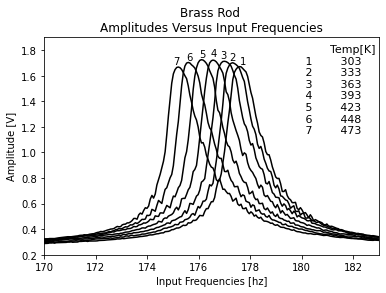

In [36]:
# Plots each temperature's frequency as a function of amplitude
plt.plot(brs_frequency_of_driver, brs_amplitude_at_303, color = 'black')
plt.plot(brs_frequency_of_driver, brs_amplitude_at_333, color = 'black')
plt.plot(brs_frequency_of_driver, brs_amplitude_at_363, color = 'black')
plt.plot(brs_frequency_of_driver, brs_amplitude_at_393, color = 'black' )
plt.plot(brs_frequency_of_driver, brs_amplitude_at_423, color = 'black' )
plt.plot(brs_frequency_of_driver, brs_amplitude_at_448, color = 'black' )
plt.plot(brs_frequency_of_driver, brs_amplitude_at_473, color = 'black' )

# Shows the table with the various temperatures
plt.text(180,1.15,'        Temp[K]\n 1        303\n 2        333\n 3        363\n 4        '       
         '393\n 5        423\n 6        448\n 7        473', color='black', size= 11)

# Shows the label on each plot
plt.text(177.6, 1.69, '1')
plt.text(177.2, 1.72, '2')
plt.text(176.85, 1.74, '3')
plt.text(176.45, 1.75, '4')
plt.text(176, 1.745, '5')
plt.text(175.5, 1.72, '6')
plt.text(175, 1.69, '7')


plt.xlabel("Input Frequencies [hz]")
plt.ylabel("Amplitude [V]")
plt.title("Brass Rod \nAmplitudes Versus Input Frequencies")

plt.xlim(170,183)
plt.ylim(0.2,1.9)

### Lorentzian Fitting

In [37]:
# Lorentzian parameter fitting for 303 
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_303)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_303)), sum(brs_frequency_of_driver * brs_amplitude_at_303) / 
          sum(brs_amplitude_at_303)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_303, p0 = pguess)

# Results
brs_Δw_303, brs_w0_303 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [38]:
# Lorentzian parameter fitting for 333 
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_333)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_333)), sum(brs_frequency_of_driver * brs_amplitude_at_333) / 
          sum(brs_amplitude_at_333)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_333, p0 = pguess)

# Results
brs_Δw_333, brs_w0_333 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [39]:
# Lorentzian parameter fitting for 363 
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_363)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_363)), sum(brs_frequency_of_driver * brs_amplitude_at_363) / 
          sum(brs_amplitude_at_363)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_363, p0 = pguess)

# Results
brs_Δw_363, brs_w0_363 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [40]:
# Lorentzian parameter fitting for 393 
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_393)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_393)), sum(brs_frequency_of_driver * brs_amplitude_at_393) / 
          sum(brs_amplitude_at_393)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_393, p0 = pguess)

# Results
brs_Δw_393, brs_w0_393 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [41]:
# Lorentzian parameter fitting for 423 
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_423)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_423)), sum(brs_frequency_of_driver * brs_amplitude_at_423) / 
          sum(brs_amplitude_at_423)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_423, p0 = pguess)

# Results
brs_Δw_423, brs_w0_423 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [42]:
# Lorentzian parameter fitting for 448
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_448)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_448)), sum(brs_frequency_of_driver * brs_amplitude_at_448) / 
          sum(brs_amplitude_at_448)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_448, p0 = pguess)

# Results
brs_Δw_448, brs_w0_448 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [43]:
# Lorentzian parameter fitting for 473
def lorentzian(x, a, x0):
    return (max(brs_amplitude_at_473)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(brs_amplitude_at_473)), sum(brs_frequency_of_driver * brs_amplitude_at_473) / 
          sum(brs_amplitude_at_473)]

# Fit the data
popt, pcov = curve_fit(lorentzian, brs_frequency_of_driver, brs_amplitude_at_473, p0 = pguess)

# Results
brs_Δw_473, brs_w0_473 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

## Steel

### Rod Readings

In [44]:
# Input voltages into the rod
ste_inp_volt = np.arange(3.8,4.15,0.001)

ste_frequency_of_driver = 64.06859542*ste_inp_volt + 6.83574122
# Gives the input voltage as the corresponding frequency

In [45]:
# Amplitudes received at 303K 
ste_amplitude_at_303 = np.array([0.24287645239119585, 0.24262154521026877, 0.23905284467729054, 0.24007247340099847, 0.2375234015917286, 0.2408371949437794, 0.2387979374963635, 0.2372684944108016, 0.2375234015917286, 0.23803321595358257, 0.23701358722987464, 0.2375234015917286, 0.24058228776285243, 0.23803321595358257, 0.23828812313450953, 0.2375234015917286, 0.23828812313450953, 0.2377783087726555, 0.2408371949437794, 0.24007247340099838, 0.23777830877265557, 0.24032738058192535, 0.23803321595358257, 0.2385430303154365, 0.23828812313450953, 0.24211173084841464, 0.23956265903914442, 0.24236663802934172, 0.2385430303154365, 0.24058228776285234, 0.23803321595358257, 0.24160191648656043, 0.23828812313450953, 0.23828812313450953, 0.24211173084841464, 0.2387979374963635, 0.2387979374963635, 0.24185682366748756, 0.2398175662200714, 0.2398175662200714, 0.24262154521026877, 0.24236663802934172, 0.24007247340099838, 0.23930775185821745, 0.2398175662200714, 0.24032738058192554, 0.24109210212470655, 0.24058228776285234, 0.2408371949437794, 0.2408371949437794, 0.2431313595721229, 0.24007247340099838, 0.24134700930563352, 0.2398175662200714, 0.24160191648656051, 0.24134700930563352, 0.24185682366748756, 0.24236663802934172, 0.2410921021247064, 0.24287645239119585, 0.24134700930563363, 0.24338626675304997, 0.2441509882958309, 0.24236663802934172, 0.24185682366748756, 0.24466080265768486, 0.24287645239119585, 0.2441509882958309, 0.24389608111490393, 0.24338626675304997, 0.24236663802934172, 0.24287645239119585, 0.2433862667530499, 0.24491570983861183, 0.2431313595721229, 0.24338626675304997, 0.2464451529241737, 0.24364117393397686, 0.24389608111490393, 0.24338626675304997, 0.24338626675304997, 0.24466080265768486, 0.24822950319066256, 0.24848441037158953, 0.24491570983861183, 0.2464451529241737, 0.24568043138139278, 0.24619024574324672, 0.2441509882958309, 0.24466080265768486, 0.2474647816478816, 0.24797459600973557, 0.2474647816478816, 0.24950403909529745, 0.2510334821808593, 0.25077857499993234, 0.25077857499993234, 0.25128838936178627, 0.25128838936178627, 0.25409236835198323, 0.2528178324473481, 0.2528178324473481, 0.25179820372364026, 0.25128838936178627, 0.2510334821808593, 0.2520531109045672, 0.24975894627622441, 0.2523080180854942, 0.25179820372364026, 0.2551119970756914, 0.2556218114375454, 0.2576610688849616, 0.2556218114375454, 0.25332764680920217, 0.25409236835198323, 0.25460218271383733, 0.2594454191514505, 0.2594454191514505, 0.25740616170403463, 0.25970032633237744, 0.2602101406942314, 0.26454356276999025, 0.26046504787515834, 0.26046504787515834, 0.2630141196844281, 0.2637788412272092, 0.26454356276999025, 0.26454356276999025, 0.2673475417601875, 0.26530828431277154, 0.26785735612204153, 0.27168096383594625, 0.26811226330296856, 0.2719358710168732, 0.27397512846428906, 0.27219077819780024, 0.27728892181634013, 0.27779873617819417, 0.2783085505400484, 0.28315178697766114, 0.2836616013395151, 0.2839165085204421, 0.28544595160600394, 0.28977937368176326, 0.287230301872493, 0.2928382598528872, 0.294622610119376, 0.2994658465569887, 0.29921093937606164, 0.3030345470899671, 0.30456399017552904, 0.31017194815592297, 0.3086425050703608, 0.31450537023168207, 0.315015184593536, 0.32011332821207555, 0.3252114718306157, 0.32776054363988577, 0.32725072927803184, 0.33438813034398773, 0.34381969603828627, 0.34585895348570234, 0.35503561199907424, 0.36191810588410345, 0.36727115668357013, 0.37440855774952625, 0.391742246052562, 0.4009189045659337, 0.40193853328964185, 0.413409356431357, 0.43354702372458975, 0.44323349659981554, 0.4547043197415304, 0.4679594931497341, 0.4781557803868142, 0.49319530406150713, 0.513078064173813, 0.5293921237531409, 0.539333503809294, 0.5546279346649134, 0.5734910660535113, 0.5887854969091313, 0.605099556488459, 0.6206488945250059, 0.632629532028575, 0.6461396126177055, 0.6601595075686906, 0.6706107019866974, 0.6769833815098725, 0.6813168035856313, 0.6808069892237774, 0.6800422676809964, 0.6723950522531863, 0.6665321870918653, 0.6599046003877633, 0.6558260854929316, 0.6412963761800926, 0.631609903304867, 0.6198841729822249, 0.612236957554415, 0.604334834945678, 0.5951581764323062, 0.5831775389287374, 0.5694125511586793, 0.5673732937112634, 0.5587064495597456, 0.5431571115231988, 0.5334706386479727, 0.5278626806675788, 0.518940929335134, 0.509764270821762, 0.501607241032098, 0.4891167891666751, 0.4773910588440332, 0.4794303162914491, 0.47152819368271226, 0.4536846910178225, 0.44756691867557424, 0.4422138678761076, 0.4338019309055167, 0.42640962265863386, 0.4220762005828746, 0.40933084153652494, 0.4011738117468607, 0.40321306919427713, 0.39148733887163517, 0.3797616085489933, 0.37542818647323417, 0.36982022849284013, 0.3634475489696653, 0.35936903407483367, 0.3545257976372203, 0.3463687678475563, 0.3445844175810673, 0.3461138606666294, 0.33821173805789273, 0.33336850162027953, 0.33260378007749847, 0.3264860077352509, 0.3244467502878349, 0.3229173072022726, 0.32062314257392954, 0.31450537023168207, 0.3139955558698281, 0.314250463050755, 0.30787778352757983, 0.30456399017552904, 0.3043090829946021, 0.30074038246162393, 0.3009952896425509, 0.2984462178332807, 0.29436770293844905, 0.2915637239482523, 0.2905440952245443, 0.2905440952245444, 0.28723030187249304, 0.2857008587869309, 0.28493613724415, 0.2834066941585881, 0.28187725107302625, 0.2813674367111723, 0.2785634577209753, 0.2755045715498509, 0.274994757187997, 0.27524966436892406, 0.2732104069215081, 0.27295549974058114, 0.2714260566550193, 0.26989661356945743, 0.2688769848457495, 0.2688769848457495, 0.2660730058555526, 0.2647984699509173, 0.26530828431277154, 0.26454356276999036, 0.2637788412272092, 0.26377884122720924, 0.26326902686535514, 0.26199449096072025, 0.26199449096072025, 0.26097486223701233, 0.25970032633237744, 0.25919051197052345, 0.2581708832468155, 0.25791597606588856, 0.2581708832468155, 0.2566414401612535, 0.25562181143754537, 0.2551119970756915, 0.25409236835198323, 0.25434727553291026, 0.2538374611710562, 0.25383746117105616, 0.25307273962827515, 0.25332764680920217, 0.25256292526642116, 0.25307273962827515, 0.2520531109045672, 0.25256292526642116, 0.25332764680920217, 0.25154329654271324, 0.25077857499993234, 0.25026876063807835, 0.25052366781900537, 0.25052366781900537, 0.25026876063807835, 0.24924913191437045, 0.24924913191437045, 0.2489942247334435, 0.24924913191437045, 0.2487393175525165, 0.24797459600973557, 0.24720987446695464, 0.2464451529241737, 0.24695496728602767, 0.24619024574324672, 0.24670006010510068, 0.24619024574324672, 0.24619024574324672, 0.24720987446695464, 0.24720987446695464, 0.2464451529241737, 0.2454255242004658, 0.2454255242004658, 0.24517061701953882, 0.24517061701953882, 0.24491570983861183, 0.24491570983861183, 0.24466080265768486, 0.2444058954767579, 0.24364117393397694, 0.24389608111490393, 0.24338626675304997, 0.24338626675304997, 0.24364117393397694, 0.24593533856231975, 0.24568043138139278, 0.2454255242004658, 0.24440589547675778, 0.24338626675304997, 0.2433862667530499, 0.24338626675304997, 0.24287645239119585, 0.24338626675304997, 0.24236663802934172, 0.24287645239119585, 0.24262154521026877, 0.24262154521026877, 0.24262154521026877, 0.24262154521026885, 0.24262154521026877])

In [46]:
# Amplitudes received at 333K 
ste_amplitude_at_333 = np.array([0.2454255242004658, 0.24185682366748756, 0.24134700930563363, 0.2431313595721229, 0.2464451529241737, 0.2433862667530499, 0.2433862667530499, 0.2441509882958309, 0.24032738058192543, 0.23956265903914442, 0.2408371949437794, 0.24007247340099838, 0.24032738058192543, 0.24032738058192535, 0.24007247340099838, 0.24109210212470647, 0.24007247340099847, 0.2408371949437794, 0.2408371949437794, 0.2408371949437796, 0.2410921021247064, 0.24185682366748767, 0.24083719494377948, 0.24211173084841464, 0.2433862667530499, 0.24568043138139278, 0.24797459600973557, 0.24797459600973557, 0.24440589547675778, 0.2441509882958309, 0.24389608111490393, 0.24262154521026885, 0.24338626675304997, 0.2431313595721229, 0.2433862667530499, 0.24364117393397694, 0.24338626675304997, 0.24364117393397694, 0.24389608111490393, 0.24236663802934172, 0.24287645239119585, 0.24211173084841472, 0.24262154521026885, 0.24287645239119593, 0.24287645239119585, 0.24364117393397694, 0.24517061701953882, 0.24619024574324672, 0.2464451529241737, 0.2454255242004658, 0.24338626675304997, 0.24364117393397694, 0.2431313595721229, 0.24338626675304997, 0.2431313595721229, 0.2431313595721229, 0.24593533856231975, 0.2454255242004658, 0.24593533856231975, 0.2441509882958309, 0.2444058954767579, 0.24338626675304997, 0.24338626675304997, 0.24389608111490393, 0.24695496728602767, 0.24338626675304997, 0.24491570983861183, 0.24797459600973557, 0.2477196888288086, 0.2489942247334435, 0.24950403909529745, 0.2454255242004658, 0.2441509882958309, 0.24517061701953882, 0.24568043138139278, 0.2454255242004658, 0.24389608111490393, 0.2444058954767579, 0.24568043138139278, 0.24695496728602767, 0.2464451529241737, 0.2454255242004658, 0.2444058954767579, 0.24593533856231975, 0.24822950319066256, 0.24822950319066256, 0.24950403909529745, 0.2489942247334435, 0.25077857499993234, 0.25052366781900537, 0.25154329654271324, 0.25179820372364026, 0.25077857499993234, 0.2500138534571514, 0.2500138534571514, 0.25052366781900537, 0.25154329654271324, 0.25128838936178627, 0.2530727396282752, 0.2520531109045672, 0.25128838936178627, 0.2510334821808593, 0.2510334821808593, 0.25154329654271324, 0.2500138534571514, 0.25026876063807835, 0.2520531109045672, 0.2535825539901291, 0.25562181143754553, 0.26097486223701233, 0.2625043053225742, 0.26199449096072025, 0.26148467659886626, 0.2586806976086695, 0.2589356047895965, 0.26046504787515834, 0.2612297694179393, 0.26071995505608536, 0.25919051197052345, 0.26071995505608536, 0.2640337484081363, 0.2637788412272092, 0.26199449096072025, 0.2642886555890632, 0.2670926345792606, 0.2650533771318445, 0.26658282021740665, 0.26938679920760344, 0.26989661356945743, 0.27066133511223833, 0.2747398500070701, 0.2790732720828295, 0.2790732720828294, 0.28238706543488024, 0.2800929008065374, 0.2806027151683913, 0.284426322882296, 0.2826419726158072, 0.284681230063223, 0.28748520905341995, 0.2885048377771283, 0.29207353831010624, 0.2918186311291793, 0.2958971460240109, 0.29513242448123, 0.3022698255471859, 0.3037992686327481, 0.30685815480387185, 0.3060934332610909, 0.3173093492218788, 0.31527009177446297, 0.3239369359259808, 0.3262311005543239, 0.3336234088012066, 0.3326037800774985, 0.33974118114345464, 0.34585895348570245, 0.3463687678475564, 0.3481531181140456, 0.36217301306503036, 0.36854569258820497, 0.37313402184489125, 0.3840950306247522, 0.3861342880721681, 0.3927618747762702, 0.40958574871745207, 0.42640962265863375, 0.4343117452673706, 0.4434884037807425, 0.45725339155080047, 0.4733125439492012, 0.4924305825187261, 0.5153722288021558, 0.5288823093912867, 0.5385687822665127, 0.5617653357308694, 0.5887854969091312, 0.609432978564218, 0.6303353674002318, 0.6471592413414134, 0.6665321870918655, 0.6841207825758284, 0.6917679980036382, 0.6953366985366161, 0.696611234441251, 0.6938072554510542, 0.6930425339082731, 0.6856502256613906, 0.6782579174145074, 0.6690812589011355, 0.6616889506542523, 0.6514926634171726, 0.6382374900089685, 0.6298255530383778, 0.6244725022389108, 0.6137664006399769, 0.6038250205838239, 0.5903149399946932, 0.5747656019581462, 0.5681380152540443, 0.5635496859973588, 0.5500396054082274, 0.5344902673716806, 0.52862740221036, 0.5258234232201626, 0.5112937139073239, 0.49931307640375505, 0.49217567533779893, 0.4799401306533033, 0.4771361516631062, 0.47280272958734726, 0.45495922692245755, 0.4422138678761076, 0.4389000745240569, 0.4371157242575679, 0.4261547154777068, 0.41825259286896993, 0.41187991334579516, 0.39913455429944494, 0.39836983275666393, 0.39582076094739405, 0.3789968870062122, 0.37313402184489136, 0.3728791146639644, 0.36625152795986216, 0.3578395909892714, 0.3555454263609281, 0.34764330375219155, 0.3422902529527244, 0.3443295104001402, 0.3402509955053086, 0.33132924417286347, 0.3328586872584255, 0.33081942981100954, 0.3262311005543239, 0.32495656464968903, 0.3218976784785645, 0.31705444204095184, 0.31450537023168207, 0.31476027741260904, 0.30991704097499595, 0.3066032476229449, 0.3037992686327481, 0.3037992686327481, 0.29870112501420765, 0.2971716819286458, 0.294622610119376, 0.2902891880436173, 0.28926955931990933, 0.2895244665008364, 0.2862106731487849, 0.28417141570136906, 0.2839165085204421, 0.2813674367111723, 0.2803478079874644, 0.2795830864446834, 0.27983799362561046, 0.2790732720828294, 0.2795830864446834, 0.27958308644468344, 0.27499475718799704, 0.2727005925596542, 0.27168096383594625, 0.27066133511223833, 0.26938679920760344, 0.26862207766482255, 0.26734754176018766, 0.2665828202174067, 0.2660730058555525, 0.2650533771318445, 0.26454356276999025, 0.26403374840813615, 0.26326902686535514, 0.2622493981416472, 0.26148467659886626, 0.26148467659886626, 0.2612297694179393, 0.26173958377979323, 0.2622493981416472, 0.2630141196844281, 0.2642886555890632, 0.26097486223701233, 0.2594454191514505, 0.25970032633237744, 0.2568963473421805, 0.25638653298032665, 0.2586806976086695, 0.2581708832468156, 0.2581708832468156, 0.25740616170403463, 0.2558767186184725, 0.2558767186184725, 0.2548570898947644, 0.2548570898947644, 0.25460218271383733, 0.2546021827138373, 0.25434727553291037, 0.25383746117105616, 0.2520531109045672, 0.2576610688849616, 0.25460218271383733, 0.25460218271383733, 0.2540923683519833, 0.25154329654271324, 0.25077857499993234, 0.2510334821808593, 0.2520531109045672, 0.24924913191437045, 0.24975894627622441, 0.24924913191437045, 0.2510334821808593, 0.24797459600973557, 0.24822950319066256, 0.2474647816478816, 0.24720987446695464, 0.2474647816478816, 0.24670006010510068, 0.24670006010510068, 0.24720987446695464, 0.24670006010510068, 0.25077857499993234, 0.25154329654271324, 0.25128838936178627, 0.2500138534571514, 0.2474647816478816, 0.2464451529241737, 0.24568043138139278, 0.24466080265768486, 0.24517061701953882, 0.2444058954767579, 0.24593533856231975, 0.24797459600973557, 0.24466080265768486, 0.24695496728602767, 0.2441509882958309, 0.24517061701953882, 0.24364117393397694, 0.24364117393397694, 0.24389608111490393, 0.24364117393397694, 0.2487393175525165, 0.2474647816478816, 0.2477196888288086, 0.24695496728602767, 0.24568043138139278, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.2431313595721229])

In [47]:
# Amplitudes received at 363K 
ste_amplitude_at_363 = np.array([0.24134700930563352, 0.24083719494377948, 0.2398175662200714, 0.2398175662200714, 0.24185682366748756, 0.24287645239119585, 0.2408371949437794, 0.24007247340099838, 0.2431313595721228, 0.24287645239119585, 0.24338626675304997, 0.24338626675304997, 0.24287645239119585, 0.2433862667530499, 0.24695496728602767, 0.24568043138139278, 0.24822950319066256, 0.24797459600973557, 0.24822950319066256, 0.24670006010510068, 0.24287645239119585, 0.24287645239119585, 0.24134700930563352, 0.24134700930563352, 0.24109210212470647, 0.2408371949437794, 0.24338626675304997, 0.24364117393397694, 0.24134700930563344, 0.2408371949437794, 0.24185682366748767, 0.24109210212470647, 0.24185682366748756, 0.24236663802934172, 0.24364117393397694, 0.2441509882958309, 0.24491570983861183, 0.2454255242004658, 0.24593533856231975, 0.24848441037158953, 0.24720987446695464, 0.24338626675304997, 0.24287645239119585, 0.24262154521026877, 0.24262154521026877, 0.24287645239119585, 0.2431313595721229, 0.24338626675304997, 0.24338626675304997, 0.2431313595721229, 0.24338626675304997, 0.24338626675304997, 0.24364117393397694, 0.24517061701953882, 0.24568043138139278, 0.24593533856231975, 0.24670006010510068, 0.2487393175525165, 0.24848441037158953, 0.24950403909529745, 0.25052366781900537, 0.24822950319066256, 0.24975894627622441, 0.24619024574324672, 0.24491570983861183, 0.2454255242004658, 0.2487393175525165, 0.24720987446695464, 0.2489942247334435, 0.25052366781900537, 0.24670006010510068, 0.2464451529241737, 0.24720987446695464, 0.24848441037158953, 0.24797459600973557, 0.24619024574324672, 0.24924913191437045, 0.2551119970756914, 0.2561316257993996, 0.25460218271383733, 0.2520531109045672, 0.2520531109045672, 0.25307273962827515, 0.25434727553291026, 0.2523080180854943, 0.2517982037236403, 0.2510334821808593, 0.24975894627622441, 0.24822950319066256, 0.24822950319066256, 0.25077857499993234, 0.25409236835198323, 0.25536690425661834, 0.2540923683519833, 0.2556218114375454, 0.25562181143754537, 0.25715125452310755, 0.26071995505608536, 0.26097486223701233, 0.2642886555890632, 0.26326902686535514, 0.26326902686535514, 0.2630141196844281, 0.26097486223701233, 0.25766106888496143, 0.25919051197052345, 0.2586806976086695, 0.25842579042774255, 0.25740616170403463, 0.2602101406942314, 0.2630141196844281, 0.26454356276999025, 0.26734754176018766, 0.2622493981416472, 0.2612297694179393, 0.2625043053225742, 0.2678573561220414, 0.2701515207503844, 0.2719358710168732, 0.274484942826143, 0.274484942826143, 0.2821321582539532, 0.2793281792637564, 0.27728892181634013, 0.27703401463541305, 0.2839165085204421, 0.28238706543488024, 0.2813674367111723, 0.285191044425077, 0.2836616013395151, 0.2834066941585881, 0.2887597449580553, 0.28977937368176326, 0.2897793736817634, 0.29334807421474113, 0.2941127957575221, 0.2999756609188429, 0.3027796399090401, 0.3017600111853319, 0.3111915768796309, 0.311191576879631, 0.3185838851265137, 0.32215258565949145, 0.3236820287450537, 0.3244467502878349, 0.3351528518867686, 0.33974118114345464, 0.3430549744955053, 0.3445844175810673, 0.35987884843668755, 0.3652318992361542, 0.3761929080160152, 0.3899578957860732, 0.3993894614803718, 0.404232697917985, 0.42182129340194774, 0.44935126894206345, 0.46413588543582945, 0.4768812444821792, 0.49650909741355803, 0.5199605580588418, 0.5485101623226656, 0.5788441168529783, 0.602550484679189, 0.625492130962619, 0.6489435916079025, 0.6672969086346463, 0.6825913394902663, 0.6917679980036382, 0.6922778123654922, 0.6922778123654922, 0.6881992974706604, 0.6831011538521201, 0.674434309700602, 0.6672969086346463, 0.6576104357594206, 0.6486886844269755, 0.6443552623512169, 0.632629532028575, 0.6214136160677868, 0.6137664006399769, 0.601275948774554, 0.5867462394617154, 0.582157910205029, 0.5737459732344382, 0.5581966351978915, 0.5446865546087606, 0.5329608242861188, 0.5197056508779146, 0.5176663934304988, 0.5092544564599081, 0.49294039688058017, 0.4807048521960843, 0.4768812444821792, 0.46770458596880715, 0.4559788556461653, 0.44909636176113665, 0.43584118835293273, 0.42182129340194763, 0.42564490111585274, 0.41978203595453173, 0.40040909020408, 0.397350204032956, 0.39327168913812427, 0.38791863833865703, 0.3812910516345555, 0.37874197982528524, 0.3647220848743002, 0.35529051918000115, 0.3580944981701985, 0.3468785822094104, 0.3394862739625276, 0.3394862739625276, 0.33234887289657156, 0.3300547082682286, 0.3292899867254476, 0.32393693592598083, 0.31909369948836763, 0.3211329569357835, 0.3203682353930025, 0.3119562984224121, 0.31272101996519314, 0.3094072266131417, 0.3060934332610909, 0.30558361889923696, 0.304818897356456, 0.30074038246162393, 0.2976814962904998, 0.294622610119376, 0.2915637239482523, 0.28875974495805534, 0.28672048751063894, 0.28621067314878496, 0.284426322882296, 0.284681230063223, 0.2839165085204421, 0.2793281792637564, 0.27626929309263204, 0.27550457154985103, 0.27397512846428906, 0.27295549974058114, 0.2727005925596542, 0.27091624229316535, 0.2727005925596542, 0.2757594787307779, 0.27423003564521603, 0.2714260566550193, 0.2711711494740923, 0.27066133511223833, 0.2660730058555526, 0.2642886555890633, 0.2630141196844281, 0.26173958377979323, 0.26173958377979323, 0.26173958377979323, 0.26097486223701233, 0.26199449096072025, 0.2612297694179393, 0.2612297694179393, 0.25791597606588856, 0.25842579042774255, 0.2576610688849616, 0.2589356047895965, 0.25613162579939963, 0.25842579042774255, 0.26097486223701233, 0.2602101406942314, 0.2594454191514505, 0.25970032633237744, 0.2571512545231075, 0.25791597606588856, 0.2558767186184725, 0.2520531109045672, 0.25434727553291026, 0.25128838936178627, 0.25154329654271324, 0.25128838936178627, 0.25052366781900537, 0.24950403909529745, 0.25026876063807835, 0.2523080180854942, 0.24950403909529745, 0.2489942247334435, 0.24924913191437045, 0.24924913191437045, 0.2510334821808593, 0.2520531109045672, 0.25179820372364026, 0.2523080180854942, 0.2520531109045672, 0.25179820372364026, 0.2487393175525165, 0.2477196888288086, 0.2474647816478816, 0.25052366781900537, 0.2464451529241737, 0.2454255242004658, 0.24568043138139278, 0.2454255242004658, 0.24517061701953882, 0.24568043138139278, 0.24924913191437045, 0.2477196888288086, 0.24568043138139278, 0.24695496728602767, 0.24389608111490393, 0.24619024574324672, 0.24797459600973557, 0.24924913191437045, 0.24975894627622441, 0.25026876063807835, 0.2510334821808593, 0.2454255242004658, 0.24466080265768486, 0.2441509882958309, 0.24389608111490393, 0.24338626675304997, 0.2441509882958309, 0.24389608111490393, 0.24364117393397694, 0.2431313595721229, 0.24593533856231975, 0.2431313595721229, 0.2431313595721229, 0.24287645239119585, 0.24338626675304997, 0.2444058954767579, 0.2444058954767579, 0.24975894627622441, 0.24695496728602767, 0.24695496728602767, 0.24670006010510068, 0.24822950319066256, 0.24593533856231975, 0.24466080265768486, 0.2441509882958309, 0.24262154521026877, 0.24236663802934172, 0.24236663802934172, 0.24364117393397694, 0.2444058954767579, 0.24364117393397694, 0.24364117393397694, 0.24262154521026877, 0.2408371949437794, 0.24134700930563363, 0.24211173084841464, 0.2431313595721228, 0.24389608111490393, 0.24720987446695464, 0.2464451529241737])

In [48]:
# Amplitudes received at 393K
ste_amplitude_at_393 = np.array([0.2464451529241737, 0.2489942247334435, 0.2489942247334435, 0.24848441037158953, 0.24924913191437045, 0.25052366781900537, 0.2520531109045672, 0.2510334821808593, 0.24975894627622441, 0.24619024574324672, 0.2464451529241737, 0.24491570983861183, 0.24389608111490393, 0.2444058954767579, 0.2441509882958309, 0.2441509882958309, 0.24466080265768486, 0.24389608111490393, 0.24364117393397694, 0.2431313595721229, 0.24720987446695464, 0.24720987446695464, 0.25077857499993234, 0.24975894627622441, 0.2500138534571514, 0.25077857499993234, 0.25256292526642116, 0.2510334821808593, 0.25077857499993234, 0.24975894627622441, 0.24619024574324672, 0.2464451529241737, 0.24619024574324672, 0.24593533856231975, 0.24466080265768486, 0.24517061701953882, 0.24517061701953882, 0.24593533856231975, 0.2454255242004658, 0.24619024574324672, 0.24797459600973557, 0.2500138534571514, 0.2489942247334435, 0.2517982037236403, 0.2523080180854942, 0.2535825539901291, 0.25256292526642116, 0.25256292526642116, 0.25664144016125345, 0.25638653298032665, 0.25256292526642127, 0.25154329654271324, 0.2487393175525165, 0.2489942247334435, 0.2489942247334435, 0.24848441037158953, 0.25179820372364026, 0.2523080180854942, 0.25026876063807835, 0.25077857499993234, 0.24950403909529745, 0.2520531109045672, 0.25154329654271324, 0.2535825539901292, 0.25485708989476424, 0.2571512545231075, 0.25791597606588856, 0.25715125452310755, 0.25791597606588856, 0.26148467659886626, 0.2548570898947644, 0.25613162579939963, 0.2538374611710562, 0.25536690425661845, 0.25460218271383744, 0.25256292526642116, 0.2510334821808593, 0.25154329654271324, 0.2528178324473481, 0.25383746117105616, 0.2523080180854942, 0.25128838936178627, 0.25128838936178627, 0.25154329654271324, 0.25664144016125345, 0.2594454191514505, 0.26097486223701233, 0.26173958377979323, 0.26199449096072025, 0.26275921250350115, 0.2630141196844281, 0.26148467659886626, 0.26071995505608536, 0.2599552335133044, 0.26097486223701233, 0.2612297694179393, 0.26199449096072025, 0.2625043053225742, 0.2640337484081362, 0.2665828202174067, 0.2670926345792606, 0.2668377273983335, 0.2678573561220416, 0.26530828431277137, 0.2650533771318444, 0.2668377273983336, 0.26964170638853047, 0.2711711494740923, 0.27524966436892395, 0.2795830864446834, 0.2800929008065374, 0.27932817926375647, 0.27728892181634, 0.2747398500070701, 0.2806027151683913, 0.284426322882296, 0.2834066941585881, 0.2808576223493183, 0.284681230063223, 0.2918186311291793, 0.29130881676732534, 0.28977937368176326, 0.29615205320493787, 0.2994658465569887, 0.3002305680997699, 0.303034547089967, 0.3137406486889011, 0.31552499895539, 0.3167995348600249, 0.32597619337339695, 0.3285252651826667, 0.33234887289657167, 0.3456040463047755, 0.3430549744955053, 0.34560404630477554, 0.36115338434132244, 0.3680358782263511, 0.37619290801601507, 0.3772125367397231, 0.393271689138124, 0.4065268625463281, 0.413664263612284, 0.43864516734312975, 0.44731201149464744, 0.4641358854358293, 0.48197938810071933, 0.5176663934304988, 0.5370393391809507, 0.5625300572736505, 0.5839422604715183, 0.6155507509064659, 0.6405316546373117, 0.6665321870918655, 0.6792775461382152, 0.6897287405562225, 0.6943170698129081, 0.6922778123654922, 0.6910032764608574, 0.6825913394902663, 0.6767284743289455, 0.6675518158155735, 0.6563358998547855, 0.6484337772460484, 0.6405316546373113, 0.6377276756471145, 0.6280412027718889, 0.6099427929260722, 0.5987268769652841, 0.5964327123369413, 0.5831775389287374, 0.5706870870633142, 0.5630398716355044, 0.5454512761515415, 0.5390785966283669, 0.5357648032763155, 0.5209801867825498, 0.4988032620419009, 0.4865677173574053, 0.48197938810071933, 0.4689791218734422, 0.45801811309358137, 0.44807673303742857, 0.43125285909624667, 0.4317626734581007, 0.42717434420141487, 0.413664263612284, 0.39709529685202904, 0.3927618747762702, 0.38536956652938714, 0.38027142291084737, 0.38027142291084737, 0.3726242074830373, 0.3624279202459574, 0.35758468380834446, 0.3570748694464904, 0.3514669114660965, 0.3448393247619942, 0.3435647888573593, 0.33540775906769593, 0.33285868725842543, 0.33132924417286347, 0.3247016574687618, 0.3198584210311486, 0.31552499895539, 0.31450537023168207, 0.3091523194322147, 0.3066032476229449, 0.30379926863274803, 0.3002305680997697, 0.29793640347142675, 0.2969167747477188, 0.29436770293844905, 0.29309316703381416, 0.2936029813956681, 0.2923284454910332, 0.2918186311291793, 0.2915637239482523, 0.28926955931990916, 0.28672048751063894, 0.28544595160600394, 0.2836616013395151, 0.28060271516839136, 0.2785634577209753, 0.27983799362561046, 0.27856345772097535, 0.27601438591170496, 0.276779107454486, 0.27423003564521603, 0.27397512846428906, 0.27346531410243513, 0.26989661356945743, 0.2676024489411146, 0.26989661356945743, 0.27168096383594625, 0.2714260566550193, 0.2714260566550193, 0.2714260566550193, 0.2711711494740923, 0.2691318920266765, 0.2688769848457495, 0.26556319149369856, 0.2632690268653552, 0.26173958377979323, 0.2612297694179393, 0.26097486223701233, 0.2599552335133044, 0.25842579042774255, 0.2551119970756914, 0.25536690425661845, 0.2538374611710562, 0.25383746117105616, 0.25332764680920217, 0.25256292526642116, 0.2535825539901292, 0.2558767186184726, 0.2566414401612535, 0.2568963473421806, 0.25536690425661834, 0.2556218114375454, 0.25613162579939963, 0.2558767186184724, 0.2540923683519833, 0.25128838936178627, 0.2500138534571514, 0.24950403909529745, 0.2487393175525165, 0.24797459600973557, 0.24848441037158953, 0.2477196888288086, 0.24822950319066256, 0.2474647816478816, 0.2477196888288086, 0.2474647816478816, 0.24593533856231967, 0.24695496728602756, 0.25026876063807835, 0.25052366781900537, 0.2510334821808593, 0.25128838936178627, 0.25154329654271324, 0.25256292526642127, 0.2510334821808593, 0.2489942247334435, 0.24670006010510068, 0.24593533856231975, 0.24491570983861174, 0.2444058954767579, 0.24466080265768486, 0.24619024574324672, 0.2444058954767579, 0.24517061701953882, 0.24389608111490393, 0.24389608111490393, 0.24389608111490393, 0.2431313595721229, 0.24491570983861183, 0.24695496728602767, 0.24797459600973557, 0.24822950319066256, 0.2487393175525165, 0.24822950319066256, 0.24797459600973557, 0.25128838936178627, 0.24924913191437045, 0.2444058954767579, 0.24364117393397686, 0.24364117393397694, 0.24236663802934189, 0.24466080265768486, 0.2431313595721229, 0.24262154521026877, 0.24287645239119585, 0.24236663802934172, 0.24338626675304997, 0.2431313595721229, 0.2431313595721229, 0.24262154521026877, 0.24517061701953882, 0.24466080265768486, 0.2464451529241737, 0.24593533856231975, 0.2464451529241737, 0.24720987446695464, 0.24924913191437045, 0.24720987446695464, 0.24568043138139278, 0.24389608111490393, 0.24338626675304997, 0.2433862667530499, 0.2433862667530499, 0.24134700930563344, 0.2431313595721229, 0.24109210212470647, 0.24134700930563344, 0.24134700930563352, 0.24338626675304997, 0.24338626675304997, 0.24287645239119585, 0.24389608111490393, 0.24619024574324672, 0.2441509882958309, 0.2454255242004658, 0.24568043138139278, 0.24466080265768486, 0.24389608111490393, 0.24364117393397694, 0.24262154521026877, 0.2431313595721229, 0.2431313595721228, 0.24185682366748756, 0.24236663802934172])

In [49]:
# Amplitudes received at 423K
ste_amplitude_at_423 = np.array([0.23650377286802068, 0.2398175662200714, 0.2385430303154365, 0.2387979374963635, 0.2398175662200714, 0.24338626675304997, 0.24262154521026877, 0.24466080265768486, 0.2444058954767579, 0.24822950319066256, 0.2454255242004658, 0.24975894627622441, 0.2454255242004658, 0.2467000601051006, 0.2500138534571514, 0.24466080265768486, 0.24389608111490393, 0.24262154521026877, 0.24262154521026877, 0.24287645239119585, 0.24236663802934172, 0.24287645239119576, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.24389608111490393, 0.24593533856231975, 0.24950403909529745, 0.24975894627622441, 0.24975894627622441, 0.2510334821808593, 0.25128838936178627, 0.25128838936178627, 0.2520531109045672, 0.25179820372364026, 0.25052366781900537, 0.2487393175525165, 0.2474647816478816, 0.24720987446695464, 0.2474647816478816, 0.24389608111490393, 0.24466080265768486, 0.24848441037158953, 0.2477196888288086, 0.2454255242004658, 0.24670006010510068, 0.24619024574324672, 0.2500138534571514, 0.25128838936178627, 0.25154329654271324, 0.25179820372364026, 0.25409236835198323, 0.25307273962827515, 0.25434727553291026, 0.2533276468092023, 0.25383746117105616, 0.2548570898947643, 0.2523080180854942, 0.25179820372364026, 0.25128838936178627, 0.25307273962827515, 0.25154329654271324, 0.25332764680920217, 0.2533276468092021, 0.2535825539901292, 0.25740616170403463, 0.2548570898947643, 0.2543472755329102, 0.25893560478959643, 0.26352393404628216, 0.26199449096072025, 0.26607300585555266, 0.26607300585555266, 0.26530828431277137, 0.2683671704838956, 0.26632791303647957, 0.2640337484081362, 0.2642886555890633, 0.26632791303647957, 0.2658180986746255, 0.26352393404628216, 0.2622493981416472, 0.2668377273983336, 0.2714260566550193, 0.27066133511223833, 0.26964170638853047, 0.26734754176018766, 0.26989661356945743, 0.27932817926375647, 0.2834066941585881, 0.285191044425077, 0.284426322882296, 0.28417141570136906, 0.28315178697766114, 0.28289687979673417, 0.285700858786931, 0.2915637239482523, 0.29258335267196023, 0.29793640347142675, 0.3017600111853319, 0.30456399017552904, 0.30634834044201786, 0.31119157687963106, 0.3137406486889011, 0.3173093492218788, 0.32087804975485656, 0.3226624000213455, 0.3211329569357835, 0.32317221438319976, 0.3297998010873016, 0.3346430375249148, 0.3389764596006737, 0.3461138606666294, 0.35936903407483334, 0.3705849500356212, 0.3848597521675332, 0.3950560394046132, 0.3917422460525623, 0.3930167819571973, 0.4085661199937441, 0.4302332303725388, 0.4516454335704065, 0.46464569979768344, 0.4702536577780772, 0.4845284599099893, 0.5204703724206959, 0.5625300572736505, 0.5806284671194673, 0.5920992902611822, 0.6163154724492469, 0.6471592413414136, 0.6553162711310778, 0.6596496932068364, 0.6729048666150402, 0.6667870942727925, 0.6481788700651215, 0.6364531397424796, 0.6209038017059327, 0.6010210415936271, 0.5928640118039631, 0.5727263445107302, 0.5589613567406723, 0.5528435843984246, 0.5321961027433378, 0.5245488873155278, 0.49599928305170404, 0.48784225326204017, 0.48044994501515725, 0.4694889362352961, 0.4485865473992824, 0.43839026016220295, 0.4258998082967797, 0.4167231497834081, 0.41697805696433504, 0.4052523266416931, 0.38766373115773023, 0.37848707264435816, 0.3779772582825041, 0.3721143931211833, 0.35554542636092823, 0.35044728274238857, 0.3420353457717974, 0.33693720215325784, 0.3338783159821337, 0.3247016574687619, 0.3175642564028058, 0.3142504630507551, 0.3129759271461201, 0.30558361889923696, 0.30201491836625916, 0.29513242448123, 0.29207353831010624, 0.2920735383101062, 0.2887597449580553, 0.2867204875106391, 0.28417141570136906, 0.2834066941585881, 0.2836616013395151, 0.28060271516839136, 0.27932817926375647, 0.27754382899726726, 0.274484942826143, 0.2737202212833621, 0.2711711494740923, 0.26632791303647957, 0.2637788412272092, 0.2625043053225742, 0.2612297694179393, 0.25919051197052345, 0.2571512545231075, 0.25740616170403446, 0.25409236835198323, 0.2538374611710562, 0.2535825539901292, 0.2530727396282753, 0.25434727553291026, 0.25536690425661834, 0.25587671861847266, 0.25434727553291026, 0.2548570898947644, 0.2538374611710562, 0.2533276468092021, 0.25307273962827515, 0.2530727396282752, 0.25052366781900537, 0.24848441037158953, 0.2464451529241737, 0.24593533856231975, 0.24619024574324672, 0.24619024574324672, 0.2454255242004658, 0.2444058954767579, 0.2444058954767579, 0.2444058954767579, 0.24466080265768486, 0.24364117393397694, 0.2474647816478816, 0.25026876063807835, 0.25179820372364026, 0.25052366781900537, 0.25128838936178627, 0.25128838936178627, 0.25128838936178627, 0.2489942247334435, 0.24848441037158953, 0.24593533856231975, 0.2441509882958309, 0.24364117393397694, 0.24517061701953882, 0.2431313595721229, 0.24262154521026877, 0.24287645239119585, 0.24211173084841464, 0.24211173084841464, 0.24211173084841464, 0.24211173084841464, 0.24160191648656051, 0.24364117393397694, 0.2444058954767579, 0.2454255242004658, 0.24924913191437045, 0.24491570983861183, 0.24848441037158953, 0.24491570983861183, 0.24491570983861183, 0.2454255242004658, 0.24338626675304997, 0.2416019164865606, 0.24058228776285243, 0.24211173084841472, 0.24032738058192535, 0.24236663802934172, 0.24160191648656051, 0.23930775185821745, 0.2398175662200714, 0.23930775185821745, 0.24185682366748756, 0.24236663802934172, 0.24364117393397686, 0.2441509882958309, 0.24338626675304997, 0.24338626675304997, 0.24364117393397694, 0.24338626675304997, 0.24338626675304997, 0.24389608111490393, 0.2433862667530499, 0.24032738058192543, 0.2385430303154365, 0.24211173084841464, 0.23726849441080153, 0.2398175662200714, 0.23828812313450953, 0.23803321595358257, 0.2398175662200714, 0.23803321595358257, 0.23701358722987464, 0.2372684944108016, 0.23803321595358257, 0.24160191648656051, 0.2431313595721229, 0.2431313595721229, 0.2431313595721229, 0.24338626675304997, 0.24466080265768486, 0.24364117393397694, 0.24287645239119585, 0.24032738058192543, 0.2408371949437793, 0.2375234015917286, 0.24058228776285234, 0.23930775185821745, 0.23624886568709372, 0.2372684944108016, 0.23675868004894768, 0.23650377286802068, 0.23650377286802068, 0.23675868004894768, 0.23701358722987464, 0.2387979374963635, 0.2410921021247064, 0.24211173084841464, 0.24364117393397686, 0.24287645239119585, 0.24160191648656051, 0.24262154521026877, 0.24262154521026877, 0.24185682366748756, 0.23956265903914442, 0.2372684944108016, 0.23650377286802068, 0.23573905132523976, 0.23624886568709372, 0.23599395850616672, 0.23599395850616672, 0.2352292369633858, 0.23624886568709372, 0.2354841441443128, 0.23624886568709372, 0.23624886568709372, 0.2385430303154365, 0.24058228776285243, 0.24083719494377948, 0.24211173084841464, 0.24134700930563344, 0.24134700930563363, 0.24211173084841464, 0.24185682366748767, 0.24211173084841464, 0.24007247340099838, 0.2372684944108016, 0.2352292369633858, 0.23497432978245883, 0.23497432978245883, 0.23497432978245883, 0.2354841441443128, 0.2339547010587509, 0.23471942260153184, 0.2342096082396779, 0.23471942260153184, 0.23497432978245883, 0.23803321595358257, 0.24007247340099847, 0.2431313595721229, 0.24287645239119585, 0.2431313595721229, 0.24109210212470647, 0.24109210212470647, 0.2410921021247064, 0.24185682366748767])

In [50]:
# Amplitudes received at 448K 
ste_amplitude_at_448 = np.array([0.24568043138139278, 0.24797459600973557, 0.2441509882958309, 0.24364117393397694, 0.24364117393397694, 0.24364117393397694, 0.2444058954767579, 0.24568043138139278, 0.24517061701953882, 0.24848441037158953, 0.2500138534571514, 0.25077857499993234, 0.2528178324473481, 0.2510334821808593, 0.2510334821808593, 0.25179820372364026, 0.25077857499993234, 0.2520531109045672, 0.2517982037236403, 0.2510334821808593, 0.25077857499993234, 0.24924913191437045, 0.2477196888288086, 0.24670006010510068, 0.24670006010510068, 0.24950403909529745, 0.25052366781900537, 0.24670006010510068, 0.24619024574324672, 0.25026876063807835, 0.2510334821808593, 0.2520531109045672, 0.25256292526642116, 0.2533276468092021, 0.2533276468092021, 0.2535825539901291, 0.25613162579939946, 0.25740616170403446, 0.25536690425661834, 0.2586806976086695, 0.25536690425661857, 0.2548570898947643, 0.25256292526642127, 0.25128838936178627, 0.25052366781900537, 0.25128838936178627, 0.2510334821808593, 0.2523080180854943, 0.25179820372364026, 0.2530727396282752, 0.25460218271383733, 0.25842579042774255, 0.25842579042774255, 0.25970032633237744, 0.2594454191514505, 0.26097486223701233, 0.2602101406942314, 0.26097486223701233, 0.2642886555890631, 0.26454356276999025, 0.2635239340462821, 0.2622493981416472, 0.26326902686535514, 0.26097486223701233, 0.2602101406942314, 0.26199449096072025, 0.26046504787515834, 0.26148467659886626, 0.26403374840813615, 0.2622493981416472, 0.2630141196844282, 0.27066133511223833, 0.27066133511223833, 0.27346531410243513, 0.27677910745448625, 0.2788183649019024, 0.27728892181634, 0.27983799362561035, 0.2839165085204421, 0.2857008587869309, 0.2874852090534201, 0.28926955931990933, 0.28875974495805534, 0.28799502341527405, 0.29105390958639826, 0.29207353831010624, 0.2905440952245443, 0.28901465213898214, 0.28621067314878496, 0.2910539095863983, 0.29564223884308394, 0.3017600111853319, 0.30558361889923696, 0.30813269070850674, 0.315015184593536, 0.31527009177446297, 0.31527009177446297, 0.3218976784785645, 0.3196035138502216, 0.3211329569357835, 0.32776054363988577, 0.33464303752491487, 0.33821173805789273, 0.3377019236960388, 0.35376107609443946, 0.3647220848743002, 0.3713496715784023, 0.3784870726443583, 0.3868990096149491, 0.3912324316907084, 0.3963305753092481, 0.40780139845096297, 0.4167231497834081, 0.4338019309055167, 0.46592023570231833, 0.512313342631032, 0.5367844320000237, 0.5480003479608113, 0.5513141413128625, 0.5691576439777524, 0.5943934548895251, 0.6237077806961298, 0.6382374900089685, 0.6527671993218075, 0.6667870942727925, 0.6792775461382153, 0.6762186599670913, 0.6642380224635224, 0.6652576511872305, 0.6652576511872305, 0.6474141485223404, 0.6316099033048671, 0.6290608314955968, 0.6147860293636849, 0.6050995564884587, 0.601785763136408, 0.5824128173859563, 0.5676282008921903, 0.5658438506257015, 0.5533533987602784, 0.5406080397139287, 0.5204703724206957, 0.5112937139073239, 0.5054308487460031, 0.4875873460811132, 0.4799401306533032, 0.4600573705409974, 0.4460374755900123, 0.43940988888591087, 0.4401746104286917, 0.4167231497834078, 0.4088210271746709, 0.40397779073705814, 0.4001541830231529, 0.3851146593484602, 0.38460484498660624, 0.37517327929230726, 0.3652318992361542, 0.36676134232171603, 0.36370245615059227, 0.3501923755614615, 0.3435647888573593, 0.3450942319429212, 0.3407608098671625, 0.33158415135379044, 0.3310743369919365, 0.32597619337339695, 0.3196035138502216, 0.3216427712976374, 0.315015184593536, 0.3071130619847988, 0.304818897356456, 0.3043090829946021, 0.301250196823478, 0.2976814962904998, 0.29666186756679186, 0.29513242448123, 0.294877517300303, 0.29666186756679186, 0.29309316703381416, 0.29130881676732534, 0.2915637239482523, 0.2897793736817634, 0.28646558032971203, 0.2857008587869309, 0.2836616013395151, 0.2790732720828294, 0.2767791074544861, 0.27423003564521603, 0.2739751284642892, 0.2732104069215081, 0.2737202212833621, 0.27346531410243513, 0.27168096383594625, 0.2714260566550193, 0.2683671704838956, 0.2665828202174067, 0.26734754176018766, 0.27040642793131137, 0.2719358710168732, 0.2711711494740923, 0.2676024489411145, 0.26989661356945743, 0.26862207766482255, 0.2660730058555526, 0.26862207766482255, 0.26683772739833367, 0.2670926345792607, 0.26658282021740665, 0.2640337484081362, 0.26097486223701233, 0.2594454191514505, 0.26071995505608536, 0.2612297694179393, 0.26097486223701233, 0.26071995505608536, 0.2602101406942314, 0.2599552335133044, 0.26097486223701233, 0.25919051197052345, 0.26173958377979323, 0.2622493981416472, 0.26097486223701233, 0.26097486223701233, 0.26275921250350115, 0.25970032633237744, 0.2599552335133044, 0.25919051197052345, 0.2594454191514505, 0.2586806976086695, 0.2589356047895965, 0.2579159760658885, 0.25409236835198323, 0.2546021827138373, 0.2551119970756915, 0.25358255399012936, 0.25077857499993234, 0.25077857499993234, 0.2500138534571514, 0.24975894627622441, 0.25128838936178627, 0.2523080180854942, 0.2523080180854942, 0.2510334821808593, 0.25307273962827515, 0.2533276468092021, 0.2523080180854942, 0.25077857499993234, 0.2510334821808593, 0.25128838936178627, 0.25154329654271324, 0.2510334821808593, 0.2477196888288086, 0.24517061701953882, 0.24491570983861183, 0.24568043138139278, 0.24364117393397694, 0.2454255242004658, 0.24338626675304997, 0.24491570983861183, 0.24287645239119593, 0.2441509882958309, 0.24568043138139278, 0.24695496728602767, 0.2474647816478816, 0.2464451529241737, 0.2474647816478816, 0.2474647816478816, 0.24593533856231975, 0.2474647816478816, 0.2474647816478816, 0.2464451529241737, 0.2464451529241737, 0.2454255242004658, 0.2431313595721229, 0.24287645239119585, 0.24287645239119585, 0.2423666380293418, 0.24185682366748756, 0.24211173084841464, 0.24236663802934172, 0.24262154521026877, 0.24389608111490385, 0.2464451529241737, 0.24593533856231967, 0.2487393175525165, 0.24822950319066256, 0.24848441037158953, 0.2500138534571514, 0.24695496728602756, 0.2487393175525165, 0.24695496728602767, 0.24822950319066256, 0.24517061701953882, 0.24568043138139278, 0.24338626675304997, 0.24185682366748767, 0.24134700930563352, 0.2408371949437794, 0.2405822877628525, 0.2398175662200714, 0.2398175662200715, 0.2398175662200714, 0.24032738058192543, 0.24236663802934172, 0.2441509882958309, 0.24338626675304997, 0.24466080265768486, 0.24491570983861183, 0.2444058954767579, 0.24466080265768486, 0.24517061701953882, 0.24491570983861183, 0.24466080265768478, 0.24593533856231975, 0.2444058954767579, 0.24338626675304997, 0.24338626675304997, 0.24007247340099838, 0.2398175662200714, 0.23956265903914442, 0.24032738058192543, 0.24032738058192543, 0.24287645239119585, 0.24032738058192543, 0.24262154521026869, 0.24338626675304997, 0.2441509882958309, 0.24364117393397694, 0.24491570983861183, 0.24389608111490393, 0.2444058954767579, 0.24364117393397694, 0.2444058954767579, 0.2444058954767579, 0.24389608111490393, 0.24415098829583082, 0.24236663802934172, 0.24109210212470647, 0.2408371949437794, 0.24287645239119585, 0.24185682366748756, 0.2416019164865606, 0.24185682366748756, 0.24211173084841472, 0.24211173084841464, 0.24364117393397694, 0.2444058954767579, 0.24568043138139278, 0.24593533856231975, 0.24720987446695464])

In [51]:
# Amplitudes received at 473K 
ste_amplitude_at_473 = np.array([0.2433862667530499, 0.24695496728602767, 0.24695496728602767, 0.2444058954767579, 0.2441509882958309, 0.2464451529241737, 0.2444058954767579, 0.2444058954767579, 0.2454255242004658, 0.2474647816478816, 0.2489942247334435, 0.24975894627622441, 0.24924913191437045, 0.2500138534571514, 0.2517982037236403, 0.25077857499993234, 0.25077857499993234, 0.25256292526642116, 0.2533276468092021, 0.25358255399012924, 0.25383746117105616, 0.25613162579939946, 0.25409236835198323, 0.2510334821808593, 0.24975894627622441, 0.24950403909529745, 0.25052366781900537, 0.25077857499993234, 0.24975894627622441, 0.25154329654271324, 0.2535825539901292, 0.25536690425661834, 0.2551119970756915, 0.25638653298032654, 0.25715125452310766, 0.2581708832468156, 0.25791597606588856, 0.2586806976086695, 0.25919051197052345, 0.25970032633237744, 0.26071995505608536, 0.25970032633237744, 0.26046504787515834, 0.26071995505608536, 0.26097486223701233, 0.25919051197052345, 0.2589356047895965, 0.2602101406942314, 0.2589356047895965, 0.2594454191514505, 0.2612297694179393, 0.26556319149369856, 0.2658180986746256, 0.26734754176018766, 0.2714260566550193, 0.2737202212833621, 0.26964170638853047, 0.2737202212833621, 0.2755045715498509, 0.27423003564521603, 0.274994757187997, 0.27601438591170496, 0.2747398500070701, 0.2793281792637564, 0.27881836490190237, 0.27779873617819417, 0.2808576223493183, 0.28060271516839136, 0.27958308644468344, 0.28289687979673417, 0.28544595160600394, 0.285191044425077, 0.28672048751063894, 0.2928382598528872, 0.2994658465569887, 0.30354436145182107, 0.3037992686327481, 0.30660324762294505, 0.3160348133172439, 0.31450537023168207, 0.3208780497548565, 0.3211329569357835, 0.32215258565949145, 0.3275056364589588, 0.3394862739625276, 0.33923136678160065, 0.33693720215325784, 0.34050590268623554, 0.3407608098671625, 0.34560404630477554, 0.3606435699794684, 0.3772125367397233, 0.3848597521675332, 0.388173545519584, 0.397350204032956, 0.40499741946076623, 0.4103504702602329, 0.4195271287736048, 0.42284092212565555, 0.42640962265863386, 0.44195896069518054, 0.4641358854358293, 0.48248920246257326, 0.49497965432799607, 0.5184311149732799, 0.520215465239769, 0.5181762077923528, 0.5306666596577758, 0.5508043269510086, 0.5579417280169643, 0.5602358926453074, 0.5612555213690155, 0.5831775389287372, 0.592864011803963, 0.6020406703173351, 0.6229430591533488, 0.6382374900089685, 0.6374727684661876, 0.6377276756471145, 0.6471592413414136, 0.6489435916079025, 0.6351786038378447, 0.6158056580873928, 0.605609370850313, 0.5992366913271382, 0.5813931886622483, 0.5400982253520749, 0.5003327051274631, 0.47764596602496034, 0.4513905263894794, 0.43380193090551666, 0.4281939729251228, 0.40576214100354696, 0.3797616085489933, 0.3774674439206501, 0.37797725828250417, 0.37746744392065007, 0.38027142291084737, 0.37746744392065024, 0.36523189923615423, 0.3545257976372203, 0.35044728274238857, 0.3481531181140456, 0.3402509955053086, 0.33846664523881975, 0.33107433699193656, 0.32521147183061594, 0.3185838851265137, 0.32240749284041864, 0.31042685533685, 0.30583852608016393, 0.3030345470899671, 0.2989560321951347, 0.2984462178332807, 0.294877517300303, 0.29513242448123, 0.28824993059620113, 0.28315178697766114, 0.27881836490190237, 0.274484942826143, 0.27397512846428906, 0.2711711494740923, 0.2711711494740923, 0.26734754176018766, 0.26938679920760344, 0.26811226330296856, 0.26811226330296856, 0.2670926345792607, 0.26632791303647957, 0.2612297694179393, 0.2589356047895965, 0.25715125452310755, 0.25766106888496154, 0.2574061617040345, 0.25715125452310755, 0.25562181143754553, 0.25791597606588856, 0.2599552335133044, 0.25970032633237744, 0.2594454191514505, 0.2594454191514505, 0.2586806976086695, 0.2594454191514505, 0.2586806976086695, 0.2589356047895965, 0.2576610688849616, 0.25715125452310755, 0.2574061617040345, 0.25536690425661845, 0.25434727553291037, 0.25128838936178627, 0.25026876063807835, 0.25052366781900537, 0.25052366781900537, 0.25026876063807835, 0.25026876063807835, 0.24975894627622441, 0.2510334821808593, 0.2528178324473481, 0.2528178324473481, 0.2535825539901291, 0.2533276468092021, 0.25638653298032654, 0.25307273962827515, 0.2528178324473481, 0.2535825539901291, 0.2533276468092021, 0.25179820372364026, 0.25154329654271324, 0.25154329654271324, 0.2510334821808593, 0.2500138534571514, 0.2474647816478816, 0.24593533856231975, 0.24568043138139278, 0.2454255242004658, 0.2444058954767579, 0.24491570983861183, 0.24670006010510068, 0.24975894627622441, 0.25026876063807835, 0.25026876063807835, 0.25052366781900537, 0.25077857499993234, 0.25077857499993234, 0.25026876063807835, 0.24924913191437045, 0.25026876063807835, 0.24924913191437045, 0.25179820372364026, 0.24975894627622441, 0.24822950319066256, 0.2454255242004658, 0.24568043138139278, 0.24389608111490393, 0.24287645239119593, 0.2444058954767579, 0.2431313595721229, 0.24338626675304997, 0.24797459600973557, 0.24695496728602767, 0.24822950319066256, 0.2474647816478816, 0.24822950319066256, 0.2477196888288086, 0.24848441037158953, 0.2474647816478816, 0.2477196888288086, 0.24797459600973557, 0.25077857499993234, 0.2474647816478816, 0.24670006010510068, 0.24670006010510068, 0.2431313595721229, 0.2431313595721229, 0.24262154521026877, 0.24338626675304997, 0.24185682366748756, 0.24211173084841472, 0.2441509882958309, 0.24364117393397694, 0.24491570983861183, 0.2454255242004658, 0.2474647816478816, 0.2464451529241737, 0.2500138534571514, 0.2489942247334435, 0.24848441037158953, 0.24950403909529745, 0.24797459600973557, 0.2487393175525165, 0.2489942247334435, 0.24950403909529745, 0.2474647816478816, 0.24466080265768486, 0.24338626675304997, 0.24109210212470647, 0.24134700930563344, 0.24211173084841472, 0.24338626675304997, 0.2431313595721229, 0.24287645239119585, 0.2441509882958309, 0.24389608111490393, 0.2441509882958309, 0.24517061701953882, 0.2444058954767579, 0.24517061701953882, 0.24517061701953882, 0.24517061701953882, 0.2454255242004658, 0.24466080265768486, 0.24491570983861183, 0.2444058954767579, 0.24568043138139278, 0.24287645239119585, 0.24236663802934172, 0.23956265903914442, 0.23930775185821745, 0.24058228776285234, 0.2398175662200714, 0.24032738058192543, 0.24287645239119585, 0.2441509882958309, 0.24695496728602767, 0.24364117393397694, 0.24364117393397686, 0.24389608111490393, 0.24517061701953882, 0.24389608111490393, 0.2474647816478816, 0.2441509882958309, 0.24670006010510068, 0.2464451529241737, 0.2441509882958309, 0.24364117393397694, 0.24185682366748767, 0.24058228776285234, 0.2398175662200715, 0.2385430303154365, 0.23905284467729046, 0.23956265903914442, 0.2398175662200714, 0.24262154521026869, 0.2433862667530499, 0.2431313595721229, 0.24364117393397694, 0.24466080265768486, 0.24338626675304997, 0.24338626675304997, 0.24389608111490393, 0.24593533856231975, 0.2464451529241737, 0.24619024574324672, 0.24491570983861183, 0.24364117393397694, 0.2433862667530499, 0.24262154521026877, 0.2395626590391445, 0.23956265903914442, 0.23803321595358257, 0.23828812313450953, 0.23828812313450953, 0.23930775185821745, 0.24211173084841464, 0.24491570983861183, 0.24338626675304997, 0.24338626675304997, 0.24338626675304997, 0.2433862667530499, 0.24338626675304997])

(0.2, 0.8)

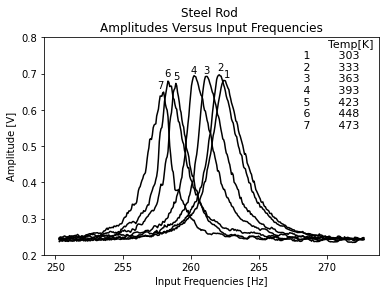

In [52]:
# Plots each temperature's frequency as a function of amplitude
plt.plot(ste_frequency_of_driver, ste_amplitude_at_303, color = 'black')
plt.plot(ste_frequency_of_driver, ste_amplitude_at_333, color = 'black')
plt.plot(ste_frequency_of_driver, ste_amplitude_at_363, color = 'black')
plt.plot(ste_frequency_of_driver, ste_amplitude_at_393, color = 'black' )
plt.plot(ste_frequency_of_driver, ste_amplitude_at_423, color = 'black' )
plt.plot(ste_frequency_of_driver, ste_amplitude_at_448, color = 'black' )
plt.plot(ste_frequency_of_driver, ste_amplitude_at_473, color = 'black' )

# Shows the table with the various temperatures
plt.text(268,0.55,'        Temp[K]\n 1        303\n 2        333\n 3        363\n 4        '       
         '393\n 5        423\n 6        448\n 7        473', color='black', size= 11)

# Shows the label on each plot
plt.text(262.4, 0.69, '1')
plt.text(261.9, 0.71, '2')
plt.text(260.9, 0.7, '3')
plt.text(260, 0.7, '4')
plt.text(258.7, 0.685, '5')
plt.text(258, 0.693, '6')
plt.text(257.5, 0.66, '7')

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Steel Rod \nAmplitudes Versus Input Frequencies")

plt.ylim(0.2,0.8)

### Lorentzian Fitting

In [53]:
# Lorentzian parameter fitting for 303 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_303)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_303)), sum(ste_frequency_of_driver * ste_amplitude_at_303) / 
          sum(ste_amplitude_at_303)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_303, p0 = pguess)

# Results
ste_Δw_303, ste_w0_303 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [54]:
# Lorentzian parameter fitting for 333 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_333)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_333)), sum(ste_frequency_of_driver * ste_amplitude_at_333) / 
          sum(ste_amplitude_at_333)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_333, p0 = pguess)

# Results
ste_Δw_333, ste_w0_333 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [55]:
# Lorentzian parameter fitting for 363 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_363)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_363)), sum(ste_frequency_of_driver * ste_amplitude_at_363) / 
          sum(ste_amplitude_at_363)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_363, p0 = pguess)

# Results
ste_Δw_363, ste_w0_363 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [56]:
# Lorentzian parameter fitting for 393 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_393)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_393)), sum(ste_frequency_of_driver * ste_amplitude_at_393) / 
          sum(ste_amplitude_at_393)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_393, p0 = pguess)

# Results
ste_Δw_393, ste_w0_393 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [57]:
# Lorentzian parameter fitting for 423 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_423)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_423)), sum(ste_frequency_of_driver * ste_amplitude_at_423) / 
          sum(ste_amplitude_at_423)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_423, p0 = pguess)

# Results
ste_Δw_423, ste_w0_423 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [58]:
# Lorentzian parameter fitting for 448 
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_448)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_448)), sum(ste_frequency_of_driver * ste_amplitude_at_448) / 
          sum(ste_amplitude_at_448)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_448, p0 = pguess)

# Results
ste_Δw_448, ste_w0_448 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [59]:
# Lorentzian parameter fitting for 473
def lorentzian(x, a, x0):
    return (max(ste_amplitude_at_473)/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(ste_amplitude_at_473)), sum(ste_frequency_of_driver * ste_amplitude_at_473) / 
          sum(ste_amplitude_at_473)]

# Fit the data
popt, pcov = curve_fit(lorentzian, ste_frequency_of_driver, ste_amplitude_at_473, p0 = pguess)

# Results
ste_Δw_473, ste_w0_473 = 2*popt[0], popt[1]
# Gives the frequency at the maximum amplitude which is the resonant frequecy and also gives bandwidth at half maximum amplitude

In [60]:
ste_w0_473

257.78673985743507

## Lorentzian Curve Fitting onto Data

Using the paramters found in the above code we can **Fit Lorentzian Functions** onto our graphs to test how well they match. 

### Aluminium at temperature 303K

In [61]:
y_alum = ((max(alum_amplitude_at_303)-min(alum_amplitude_at_303) ) 
           / ( 1+ ((alum_frequency_of_driver - alum_w0_303)/(alum_Δw_303))**2) + min(alum_amplitude_at_303) )

Text(0.5, 1.0, 'Aluminium Rod at 303K\nLorentzian function fitted onto data')

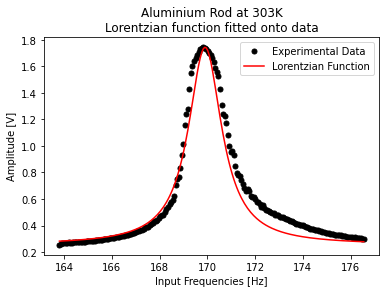

In [62]:
plt.plot(alum_frequency_of_driver, alum_amplitude_at_303, 'o', color = 'black', markersize =5)
plt.plot(alum_frequency_of_driver , y_alum, color = 'red')

plt.legend(['Experimental Data', 'Lorentzian Function'])

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Aluminium Rod at 303K\nLorentzian function fitted onto data")

Text(0.5, 1.0, 'Aluminium Rod at 303K\nLorentzian function fitted onto data')

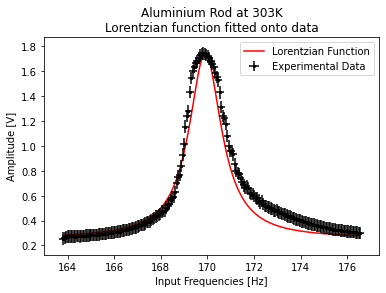

In [63]:
plt.plot(alum_frequency_of_driver, alum_amplitude_at_303, 'o', color = 'black', markersize = 2)
plt.plot(alum_frequency_of_driver , y_alum, color = 'red', label ='Lorentzian Function')

plt.errorbar(alum_frequency_of_driver, alum_amplitude_at_303, 0.05, 0.16,capsize=0, fmt='o', markersize = 2, 
             color = 'black', label = "Experimental Data")

plt.legend(loc = 'upper right')

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Aluminium Rod at 303K\nLorentzian function fitted onto data")

### Brass at temperature 303K

In [64]:
y_brs = ((max(brs_amplitude_at_303)-min(brs_amplitude_at_303) ) / 
        ( 1+ ((brs_frequency_of_driver - brs_w0_303)/(brs_Δw_303))**2) + min(brs_amplitude_at_303) )

Text(0.5, 1.0, 'Brass Rod at 303K\nLorentzian function fitted onto data')

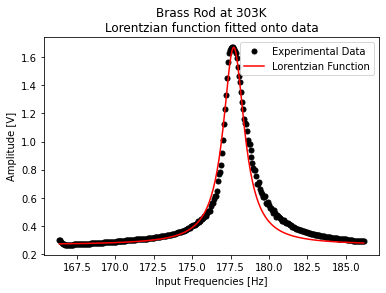

In [65]:
plt.plot(brs_frequency_of_driver, brs_amplitude_at_303, 'o', color = 'black', markersize =5)
plt.plot(brs_frequency_of_driver , y_brs, color = 'red')

plt.legend(['Experimental Data', 'Lorentzian Function'])

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Brass Rod at 303K\nLorentzian function fitted onto data")

Text(0.5, 1.0, 'Brass Rod at 303K\nLorentzian function fitted onto data')

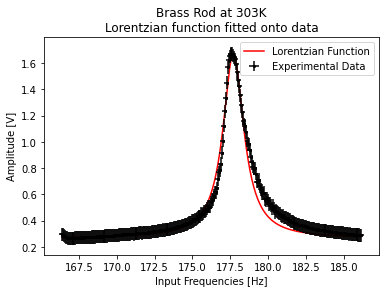

In [66]:
plt.plot(brs_frequency_of_driver, brs_amplitude_at_303, 'o', color = 'black', markersize = 2)
plt.plot(brs_frequency_of_driver , y_brs, color = 'red', label ='Lorentzian Function')

plt.errorbar(brs_frequency_of_driver, brs_amplitude_at_303, 0.05, 0.16,capsize=0, fmt='o', markersize = 2, 
             color = 'black', label = "Experimental Data")

plt.legend(loc = 'upper right')

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Brass Rod at 303K\nLorentzian function fitted onto data")

### Steel at temperature 303K

In [67]:
y_ste = ((max(ste_amplitude_at_303)-min(ste_amplitude_at_303) ) /
         ( 1+ ((ste_frequency_of_driver - ste_w0_303)/(ste_Δw_303))**2) + min(ste_amplitude_at_303) )

Text(0.5, 1.0, 'Steel Rod at 303K\nLorentzian function fitted onto data')

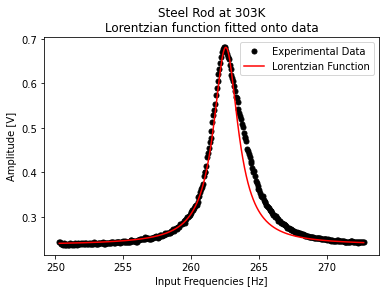

In [68]:
plt.plot(ste_frequency_of_driver, ste_amplitude_at_303, 'o', color = 'black', markersize =5)
plt.plot(ste_frequency_of_driver , y_ste, color = 'red')

plt.legend(['Experimental Data', 'Lorentzian Function'])

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Steel Rod at 303K\nLorentzian function fitted onto data")

Text(0.5, 1.0, 'Steel Rod at 303K\nLorentzian function fitted onto data')

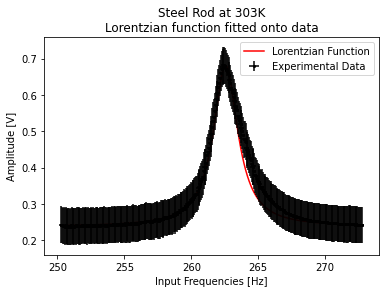

In [69]:
plt.plot(ste_frequency_of_driver, ste_amplitude_at_303, 'o', color = 'black', markersize = 2)
plt.plot(ste_frequency_of_driver , y_ste, color = 'red', label ='Lorentzian Function')

plt.errorbar(ste_frequency_of_driver, ste_amplitude_at_303, 0.05, 0.16,capsize=0, fmt='o', markersize = 2, 
             color = 'black', label = "Experimental Data")

plt.legend(loc = 'upper right')

plt.xlabel("Input Frequencies [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Steel Rod at 303K\nLorentzian function fitted onto data")

## Determining Modulus of Rigidity

##### Determine moment of inertia of auxillary body 
$I=ml^{2}$ where m is the mass of the auxillary body and l is the length of auxillary body

In [70]:
m = 0.05501 
# mass of auxilary body in kg

l = (9.5*10**-3)/2
# radius of the auxilliary body which correpsonds to the distance from the axis

I = m*l**2
# Formula for moment of inertia

In [71]:
I

1.241163125e-06

The calculation for the uncertainty on the moment of inertia is calculated as follows:

In [72]:
I = 1.241163125e-06

m = 55.01
Δm = 0.01

l = 0.00475
Δl = 0.0001

In [73]:
# Using the propogation of errors in equation 18 of lab report:
ΔI = I*((Δm/m)**2+(2*Δl/l)**2)**(1/2)

In [74]:
ΔI
# Gives the uncertainty on the calculated value for moment of inertia

5.225998705406103e-08

##### Determine the Modulus of Rigidity and Graph it 
$G=\frac{2Ilw_0^{2}}{\pi r^{4}}$ where I = inertia of auxillary body, l = length of rod, $w_0$ is resonant frequency and r is radius of the rod

In [75]:
def mod_of_rigid(I,l,w0,r):
    return (2*I*l*(w0*2*np.pi)**2)/(np.pi*r**4)
# Function to find the modulus of rigidity

In [76]:
# Value for Aluminium Rod
alum_l = 0.355
alum_r = 1.5*10**-3

# Value for Brass Rod
brs_l = 0.358
brs_r = 1.5*10**-3

# Value for Steel Rod
ste_l = 0.349
ste_r = 1.5*10**-3

In [77]:
# Measure of G for each rod at each temperature

# Aluminium Readings
G_303_alum = mod_of_rigid(I, alum_l,  alum_w0_303, alum_r )
G_333_alum = mod_of_rigid(I, alum_l,  alum_w0_333, alum_r)
G_363_alum = mod_of_rigid(I, alum_l,  alum_w0_363, alum_r)
G_393_alum = mod_of_rigid(I, alum_l,  alum_w0_393, alum_r)
G_423_alum = mod_of_rigid(I, alum_l,  alum_w0_423, alum_r)
G_448_alum = mod_of_rigid(I, alum_l,  alum_w0_448, alum_r)
G_473_alum = mod_of_rigid(I, alum_l,  alum_w0_473, alum_r)

# Brass Readings 
G_303_brs = mod_of_rigid(I, brs_l,  brs_w0_303, brs_r )
G_333_brs = mod_of_rigid(I, brs_l,  brs_w0_333, brs_r)
G_363_brs = mod_of_rigid(I, brs_l,  brs_w0_363, brs_r)
G_393_brs = mod_of_rigid(I, brs_l,  brs_w0_393, brs_r)
G_423_brs = mod_of_rigid(I, brs_l,  brs_w0_423, brs_r)
G_448_brs = mod_of_rigid(I, brs_l,  brs_w0_448, brs_r)
G_473_brs = mod_of_rigid(I, brs_l,  brs_w0_473, brs_r)

# Steel Readings ste
G_303_ste = mod_of_rigid(I, ste_l,  ste_w0_303, ste_r )
G_333_ste = mod_of_rigid(I, ste_l,  ste_w0_333, ste_r)
G_363_ste = mod_of_rigid(I, ste_l,  ste_w0_363, ste_r)
G_393_ste = mod_of_rigid(I, ste_l,  ste_w0_393, ste_r)
G_423_ste = mod_of_rigid(I, ste_l,  ste_w0_423, ste_r)
G_448_ste = mod_of_rigid(I, ste_l,  ste_w0_448, ste_r)
G_473_ste = mod_of_rigid(I, ste_l,  ste_w0_473, ste_r)

In [78]:
# Puts the temperatures into an array
temperatures = np.array([303,333, 363, 393, 423, 448, 473])

# Puts the aluminium modulus of rigidity into an array 
alum_G = np.array([G_303_alum, G_333_alum, G_363_alum, G_393_alum, G_423_alum, G_448_alum, G_473_alum])

# Puts the brass modulus of rigidity into an array 
brs_G = np.array([G_303_brs, G_333_brs, G_363_brs, G_393_brs, G_423_brs, G_448_brs, G_473_brs])

# Puts the steel modulus of rigidity into an array 
ste_G = np.array([G_303_ste, G_333_ste, G_363_ste, G_393_ste, G_423_ste, G_448_ste, G_473_ste])


Calculating the **Uncertainty on Modulus of Rigidity** for each value for using propogation of errors

In [79]:
I = 1.241163125*10**-6
ΔI = 5.225998705406103*10**-8

# Values of lengths
alum_l = 0.355
alum_r = 1.5*10**-3
brs_l = 0.358
brs_r = 1.5*10**-3
ste_l = 0.349
ste_r = 1.5*10**-3


In [80]:
def uncert_G(I, ΔI, l, Δl, w0, Δw0, r, Δr, G):
    return G *(  (ΔI/I)**2 + (Δl/l)**2 + (2*(Δw0/w0))**2 + ((4*(Δr/r))**2) )**(0.5)
# Rearrangemnt of equation 12 to give us a value for uncertainty of modulus of rigidity 

In [81]:
alum_w0 = np.array([alum_w0_303, alum_w0_333, alum_w0_363, alum_w0_393, alum_w0_423, alum_w0_448, alum_w0_473])
# Puts the aluminium resonant frequency for each temperature into an array

brs_w0 = np.array([brs_w0_303, brs_w0_333, brs_w0_363, brs_w0_393, brs_w0_423, brs_w0_448, brs_w0_473])
# Puts the brass resonant frequency for each temperature into an array

ste_w0 = np.array([ste_w0_303, ste_w0_333, ste_w0_363, ste_w0_393, ste_w0_423, ste_w0_448, ste_w0_473])
# Puts the steel resonant frequency for each temperature into an array

In [82]:
# Puts the uncertainty on each Aluminium rod into an array
alum_uncert_G = np.array(uncert_G(I, ΔI, alum_l, 0.001, alum_w0, 0.16, alum_r, 0.00001, alum_G))

# Puts the uncertainty on each Brass rod into an array
brs_uncert_G = np.array(uncert_G(I, ΔI, brs_l, 0.001, brs_w0, 0.16, brs_r, 0.00001, brs_G))

# Puts the uncertainty on each Steel rod into an array
ste_uncert_G = np.array(uncert_G(I, ΔI, ste_l, 0.001, ste_w0, 0.16, ste_r, 0.00001, ste_G))

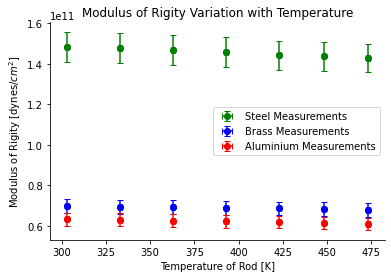

In [83]:
# Plotting the three modulus of rigidity's
plt.plot(temperatures, alum_G , 'ro')
plt.plot(temperatures, brs_G , 'bo')
plt.plot(temperatures, ste_G , 'go')

plt.xlabel("Temperature of Rod [K]")
plt.ylabel("Modulus of Rigity [dynes/$cm^2$]")
plt.title("Modulus of Rigity Variation with Temperature")
plt.grid(False)

# Plots the uncertainty bars on each modulus of rigidity
plt.errorbar(temperatures, ste_G, ste_uncert_G, 1, capsize=3, fmt='o', color = 'green',  label = "Steel Measurements")
plt.errorbar(temperatures, brs_G, brs_uncert_G, 1, capsize=3, fmt='o', color = 'blue',  label = "Brass Measurements")
plt.errorbar(temperatures, alum_G, alum_uncert_G, 1,capsize=3, fmt='o', color = 'red', label = "Aluminium Measurements")

plt.legend(loc='center right')

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

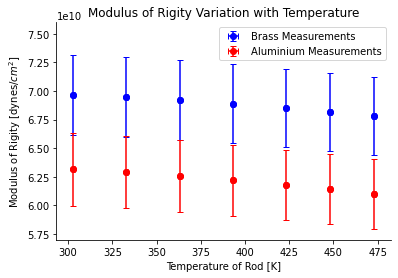

In [84]:
plt.plot(temperatures, alum_G , 'ro')
plt.plot(temperatures, brs_G , 'bo')

plt.xlabel("Temperature of Rod [K]")
plt.ylabel("Modulus of Rigity [dynes/$cm^2$]")
plt.grid(False)
plt.title("Modulus of Rigity Variation with Temperature")

plt.errorbar(temperatures, brs_G, brs_uncert_G, 1, capsize=3, fmt='o', color = 'blue',  label = "Brass Measurements")
plt.errorbar(temperatures, alum_G, alum_uncert_G, 1,capsize=3, fmt='o', color = 'red', label = "Aluminium Measurements")

plt.ylim(5.7*10**10, 7.6*10**10)

plt.legend(loc = 'upper right')

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

## Fitting Aluminium ${G_0}$, s and t Parameters

In [85]:
def G(x, G0, s, t):
    return G0 - ( s / (np.exp(t/x)-1) )
# Equation 12

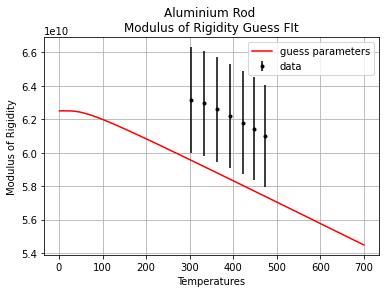

In [86]:
# plot the raw data
plt.errorbar(temperatures, alum_G, yerr=alum_uncert_G, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Temperatures')
plt.ylabel('Modulus of Rigidity')


# initial guess
pars0 = (6.25*10**10, 0.21*10**10, 163)

# overlay exponential 

x = np.linspace(1, 700, 100)

plt.plot(x, G(x,*pars0), color = 'red', label = 'guess parameters')

plt.legend();
plt.title("Aluminium Rod \nModulus of Rigidity Guess FIt");

Go (best-fit) = 6.36e+10 ± 3e+08
s (best-fit) = 4.92e+10 ± 3.02e+10
t (best-fit) = 1405 ± 311


<ipython-input-85-691d54aa1044>:2: RuntimeWarning: overflow encountered in exp
  return G0 - ( s / (np.exp(t/x)-1) )


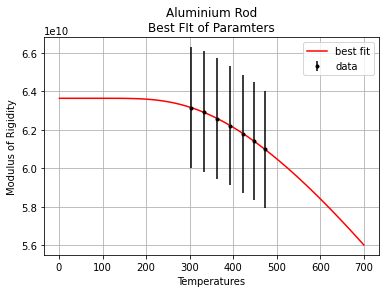

In [87]:
# perform fitting

popt, pcov = curve_fit(
    G, temperatures, alum_G,  sigma = alum_uncert_G/40,  absolute_sigma=True, p0=pars0
)

# extract each best-fit parameter and its error
G0_opt_alum = popt[0]
G0_opt_err_alum = np.sqrt(pcov[0, 0])
print(f"Go (best-fit) = {G0_opt_alum:.3g} ± {G0_opt_err_alum:.1g}")

s_opt_alum = popt[1]
s_opt_err_alum = np.sqrt(pcov[1, 1])
print(f"s (best-fit) = {s_opt_alum:.3g} ± {s_opt_err_alum:.3g}")

t_opt_alum = popt[2]
t_opt_err_alum = np.sqrt(pcov[2, 2])
print(f"t (best-fit) = {t_opt_alum:.4g} ± {t_opt_err_alum:.3g}")

# plot data
plt.errorbar(temperatures, alum_G, yerr=alum_uncert_G, fmt=".", color = 'black', label = 'data')

# creating x interval to include in y fit
x = np.linspace(1, 700, 100)
y_fit = G(x, *popt)
plt.plot(x, y_fit, color="red", label="best fit")


plt.grid(True)
plt.xlabel("Temperatures")
plt.ylabel("Modulus of Rigidity")
plt.title("Aluminium Rod\nBest FIt of Paramters")
plt.legend();

## Fitting Brass ${G_0}$, s and t Parameters

In [88]:
def G(x, G0, s, t):
    return G0 - ( s / (np.exp(t/x)-1) )

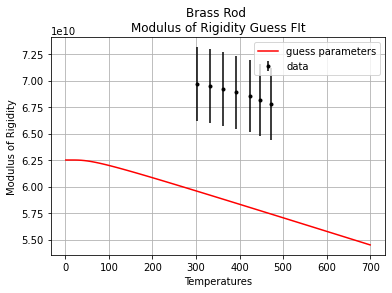

In [89]:
# plot the raw data
plt.errorbar(temperatures, brs_G, yerr=brs_uncert_G, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Temperatures')
plt.ylabel('Modulus of Rigidity')


# initial guess
pars0 = (6.25*10**10, 0.21*10**10, 163)

# overlay exponential 

x = np.linspace(1, 700, 100)

plt.plot(x, G(x,*pars0), color = 'red', label = 'guess parameters')

plt.legend();
plt.title("Brass Rod \nModulus of Rigidity Guess FIt");

Go (best-fit) = 7e+10 ± 3e+08
s (best-fit) = 4.92e+10 ± 3.87e+10
t (best-fit) = 1484 ± 398


<ipython-input-88-ce4d65a10b28>:2: RuntimeWarning: overflow encountered in exp
  return G0 - ( s / (np.exp(t/x)-1) )


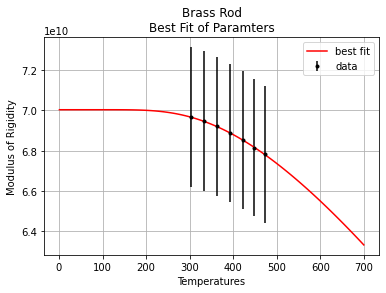

In [90]:
# perform fitting

popt, pcov = curve_fit(
    G, temperatures, brs_G, sigma = brs_uncert_G/40, absolute_sigma=True, p0=pars0
)

# extract each best-fit parameter and its error
G0_opt_brs = popt[0]
G0_opt_err_brs  = np.sqrt(pcov[0, 0])
print(f"Go (best-fit) = {G0_opt_brs:.3g} ± {G0_opt_err_brs:.1g}")

s_opt_brs = popt[1]
s_opt_err_brs = np.sqrt(pcov[1, 1])
print(f"s (best-fit) = {s_opt_brs:.3g} ± {s_opt_err_brs:.3g}")

t_opt_brs = popt[2]
t_opt_err_brs = np.sqrt(pcov[2, 2])
print(f"t (best-fit) = {t_opt_brs:.4g} ± {t_opt_err_brs:.3g}")

# plot data
plt.errorbar(temperatures, brs_G, yerr=brs_uncert_G, fmt=".", color = 'black', label = 'data')

# creating x interval to include in y fit
x = np.linspace(1, 700, 100)
y_fit = G(x, *popt)
plt.plot(x, y_fit, color="red", label="best fit")


plt.grid(True)
plt.xlabel("Temperatures")
plt.ylabel("Modulus of Rigidity")
plt.title("Brass Rod\nBest Fit of Paramters")
plt.legend();

## Fitting Steel ${G_0}$, s and t Parameters

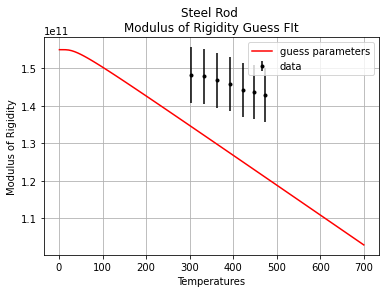

In [91]:
# plot the raw data
plt.errorbar(temperatures, ste_G, yerr=ste_uncert_G, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Temperatures')
plt.ylabel('Modulus of Rigidity')


# initial guess
pars0 = (1.55*10**11, 0.8*10**10, 100)

# overlay exponential 

x = np.linspace(1, 700, 100)

plt.plot(x, G(x,*pars0), color = 'red', label = 'guess parameters')

plt.legend();
plt.title("Steel Rod \nModulus of Rigidity Guess FIt");

Go (best-fit) = 1.51e+11 ± 1e+09
s (best-fit) = 5.91e+10 ± 3.72e+10
t (best-fit) = 1009 ± 316


<ipython-input-88-ce4d65a10b28>:2: RuntimeWarning: overflow encountered in exp
  return G0 - ( s / (np.exp(t/x)-1) )


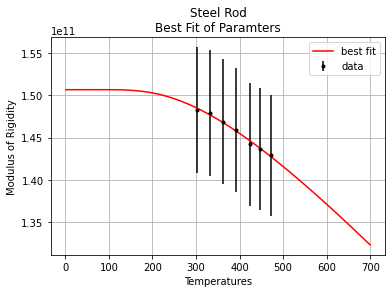

In [92]:
# perform fitting

popt, pcov = curve_fit(
    G, temperatures, ste_G, sigma = ste_uncert_G/40, absolute_sigma=True, p0=pars0
)

# extract each best-fit parameter and its error
G0_opt_ste = popt[0]
G0_opt_err_ste = np.sqrt(pcov[0, 0])
print(f"Go (best-fit) = {G0_opt_ste:.3g} ± {G0_opt_err_ste:.1g}")

s_opt_ste = popt[1]
s_opt_err_ste = np.sqrt(pcov[1, 1])
print(f"s (best-fit) = {s_opt_ste:.3g} ± {s_opt_err_ste:.3g}")

t_opt_ste = popt[2]
t_opt_err_ste = np.sqrt(pcov[2, 2])
print(f"t (best-fit) = {t_opt_ste:.4g} ± {t_opt_err_ste:.3g}")

# plot data
plt.errorbar(temperatures, ste_G, yerr=ste_uncert_G, fmt=".", color = 'black', label = 'data')

# creating x interval to include in y fit
x = np.linspace(1, 700, 100)
y_fit = G(x, *popt)
plt.plot(x, y_fit, color="red", label="best fit")


plt.grid(True)
plt.xlabel("Temperatures")
plt.ylabel("Modulus of Rigidity")
plt.title("Steel Rod\nBest Fit of Paramters")
plt.legend();

## Theoretical Curves added to Modulus of Rigidity Plot

In [93]:
def G(x, G0, s, t):
    return G0 - ( s / (np.exp(t/x)-1) )

<ipython-input-93-ce4d65a10b28>:2: RuntimeWarning: overflow encountered in exp
  return G0 - ( s / (np.exp(t/x)-1) )


(50000000000.0, 160000000000.0)

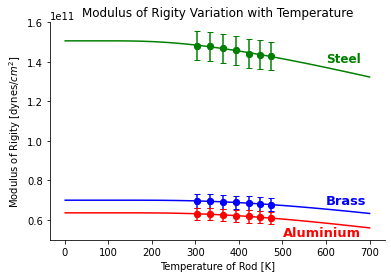

In [94]:
# Plotting the three modulus of rigidity's
plt.plot(temperatures, alum_G , 'ro')
plt.plot(temperatures, brs_G , 'bo')
plt.plot(temperatures, ste_G , 'go')

plt.xlabel("Temperature of Rod [K]")
plt.ylabel("Modulus of Rigity [dynes/$cm^2$]")
plt.title("Modulus of Rigity Variation with Temperature")
plt.grid(False)

# Plotting theoretical curves based on equation 12
plt.plot(x, G(x, G0_opt_alum, s_opt_alum, t_opt_alum), color = 'red')
plt.plot(x, G(x, G0_opt_ste, s_opt_ste, t_opt_ste), color = 'green')
plt.plot(x, G(x, G0_opt_brs, s_opt_brs, t_opt_brs), color = 'blue')

# Plots the uncertainty bars on each modulus of rigidity
plt.errorbar(temperatures, ste_G, ste_uncert_G, 3, capsize=3, fmt='o', color = 'green',  label = "Steel Measurements")
plt.errorbar(temperatures, brs_G, brs_uncert_G, 3, capsize=3, fmt='o', color = 'blue',  label = "Brass Measurements")
plt.errorbar(temperatures, alum_G, alum_uncert_G, 3,capsize=3, fmt='o', color = 'red', label = "Aluminium Measurements")

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(500,0.52*10**11,'Aluminium', color='red', size= 13, weight = 'bold')
plt.text(600,0.68*10**11,'Brass', color='blue', size= 13, weight = 'bold')
plt.text(600,1.40*10**11,'Steel', color='green', size= 12, weight = 'bold')

plt.ylim(0.5*10**11,1.6*10**11)

<ipython-input-93-ce4d65a10b28>:2: RuntimeWarning: overflow encountered in exp
  return G0 - ( s / (np.exp(t/x)-1) )


Text(550, 67000000000.00001, 'Brass')

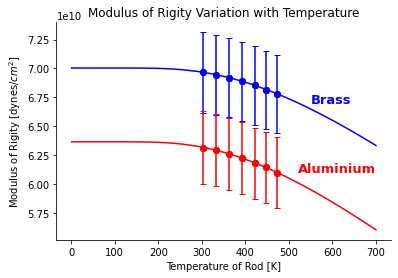

In [95]:
# Plotting the three modulus of rigidity's
plt.plot(temperatures, alum_G , 'ro')
plt.plot(temperatures, brs_G , 'bo')

plt.xlabel("Temperature of Rod [K]")
plt.ylabel("Modulus of Rigity [dynes/$cm^2$]")
plt.title("Modulus of Rigity Variation with Temperature")
plt.grid(False)

# Plotting theoretical curves based on equation 12
plt.plot(x, G(x, G0_opt_alum, s_opt_alum, t_opt_alum), color = 'red')
plt.plot(x, G(x, G0_opt_brs, s_opt_brs, t_opt_brs), color = 'blue')

# Plots the uncertainty bars on each modulus of rigidity
plt.errorbar(temperatures, brs_G, brs_uncert_G, 3, capsize=3, fmt='o', color = 'blue',  label = "Brass Measurements")
plt.errorbar(temperatures, alum_G, alum_uncert_G, 3,capsize=3, fmt='o', color = 'red', label = "Aluminium Measurements")

# Removes the top axis and right axis
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(520,0.61*10**11,'Aluminium', color='red', size= 13, weight = 'bold')
plt.text(550,0.67*10**11,'Brass', color='blue', size= 13, weight = 'bold')


## Determine the Internal Friction 

Use the equation $\frac{Δw}{\sqrt{3}w_0}$ where Δw is bandwidth at half maxima of response curve and $w_0$ is the resonant frequency

In [96]:
def int_fric(w0, Δw):
    return (Δw/(np.sqrt(3)*w0))
# Defines function for internal frcition

In [97]:
# Measure of Internal Friction for each rod at each temperature

# Aluminium Readings
alum_IF_303 = int_fric(alum_w0_303, alum_Δw_303)
alum_IF_333 = int_fric(alum_w0_333, alum_Δw_333)
alum_IF_363 = int_fric(alum_w0_363, alum_Δw_363)
alum_IF_393 = int_fric(alum_w0_393, alum_Δw_393)
alum_IF_423 = int_fric(alum_w0_423, alum_Δw_423)
alum_IF_448 = int_fric(alum_w0_448, alum_Δw_448)
alum_IF_473 = int_fric(alum_w0_473, alum_Δw_473)

# Brass Readings
brs_IF_303 = int_fric(brs_w0_303, brs_Δw_303)
brs_IF_333 = int_fric(brs_w0_333, brs_Δw_333)
brs_IF_363 = int_fric(brs_w0_363, brs_Δw_363)
brs_IF_393 = int_fric(brs_w0_393, brs_Δw_393)
brs_IF_423 = int_fric(brs_w0_423, brs_Δw_423)
brs_IF_448 = int_fric(brs_w0_448, brs_Δw_448)
brs_IF_473 = int_fric(brs_w0_473, brs_Δw_473)

# Steel Readings
ste_IF_303 = int_fric(ste_w0_303, ste_Δw_303)
ste_IF_333 = int_fric(ste_w0_333, ste_Δw_333)
ste_IF_363 = int_fric(ste_w0_363, ste_Δw_363)
ste_IF_393 = int_fric(ste_w0_393, ste_Δw_393)
ste_IF_423 = int_fric(ste_w0_423, ste_Δw_423)
ste_IF_448 = int_fric(ste_w0_448, ste_Δw_448)
ste_IF_473 = int_fric(ste_w0_473, ste_Δw_473)

In [98]:
brs_IF_423

0.0027651199905780626

In [99]:
# Puts the aluminium internal frictions into an array
alum_intfric = np.array([alum_IF_303, alum_IF_333, alum_IF_363, alum_IF_393, alum_IF_423, alum_IF_448, alum_IF_473])

# Puts the brass internal frictions into an array
brs_intfric = np.array([brs_IF_303, brs_IF_333, brs_IF_363, brs_IF_393, brs_IF_423, brs_IF_448, brs_IF_473])

# Puts the steel internal frictions into an array
ste_intfric = np.array([ste_IF_303, ste_IF_333, ste_IF_363, ste_IF_393, ste_IF_423, ste_IF_448, ste_IF_473])


Calculating the **Uncertainty on Internal Friction** for each value for using propogation of errors

In [100]:
def uncertainty_IF(w0, Δw0, w, Δw, IF):
    return IF * ( (Δw0/w0)**2 + (Δw/w)**2 )**(0.5)

In [101]:
# Puts each rods resonant frequency for each temperature into an array
alum_w0 = np.array([alum_w0_303, alum_w0_333, alum_w0_363, alum_w0_393, alum_w0_423, alum_w0_448, alum_w0_473])
brs_w0 = np.array([brs_w0_303, brs_w0_333, brs_w0_363, brs_w0_393, brs_w0_423, brs_w0_448, brs_w0_473])
ste_w0 = np.array([ste_w0_303, ste_w0_333, ste_w0_363, ste_w0_393, ste_w0_423, ste_w0_448, ste_w0_473])

# Puts each rods bandwidth frequency for each temperature into an array
alum_Δw = np.array([alum_Δw_303, alum_Δw_333, alum_Δw_363, alum_Δw_393, alum_Δw_423, alum_Δw_448, alum_Δw_473])
brs_Δw = np.array([brs_Δw_303, brs_Δw_333, brs_Δw_363, brs_Δw_393, brs_Δw_423, brs_Δw_448, brs_Δw_473])
ste_Δw = np.array([ste_Δw_303, ste_Δw_333, ste_Δw_363, ste_Δw_393, ste_Δw_423, ste_Δw_448, ste_Δw_473])

# Puts each rods internal friction for each temperature into an array
alum_IF = np.array([alum_IF_303, alum_IF_333, alum_IF_363, alum_IF_393, alum_IF_423, alum_IF_448, alum_IF_473])
brs_IF = np.array([brs_IF_303, brs_IF_333, brs_IF_363, brs_IF_393, brs_IF_423, brs_IF_448, brs_IF_473])
ste_IF = np.array([ste_IF_303, ste_IF_333, ste_IF_363, ste_IF_393, ste_IF_423, ste_IF_448, ste_IF_473])

In [102]:
# Calculates each specific uncertainty on each measurment for each rod 
alum_uncert_IF = uncertainty_IF(alum_w0, 0.03, alum_Δw, 0.05, alum_IF )
brs_uncert_IF = uncertainty_IF(brs_w0, 0.03, brs_Δw, 0.05, brs_IF )
ste_uncert_IF = uncertainty_IF(ste_w0, 0.03, ste_Δw, 0.05, ste_IF )

In [103]:
alum_w0

array([169.90499128, 169.63203568, 169.15440372, 168.64947827,
       168.07213775, 167.58249804, 166.96685441])

In [104]:
alum_Δw

array([0.84969875, 0.82484387, 0.81833119, 0.81785219, 0.82396885,
       0.82446488, 0.825747  ])

In [105]:
ste_IF

array([0.00243002, 0.00238543, 0.00234875, 0.00235074, 0.00229213,
       0.00235955, 0.00236295])

In [106]:
ste_uncert_IF

array([0.00010995, 0.00011008, 0.00011046, 0.00011083, 0.00011148,
       0.00011168, 0.00011198])

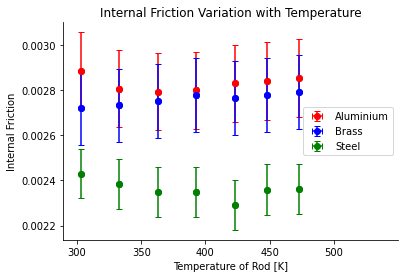

In [107]:
plt.plot(temperatures, alum_intfric, 'ro')
plt.plot(temperatures, brs_intfric, 'bo')
plt.plot(temperatures, ste_intfric, 'go')


plt.xlabel("Temperature of Rod [K]")
plt.ylabel("Internal Friction")
plt.title("Internal Friction Variation with Temperature")

# Plots the uncertainty bars on each modulus of rigidity
plt.errorbar(temperatures, alum_intfric, alum_uncert_IF, 1,capsize=3, fmt='o', color = 'red', label = "Aluminium")
plt.errorbar(temperatures, brs_intfric, brs_uncert_IF, 1, capsize=3, fmt='o', color = 'blue',  label = "Brass")
plt.errorbar(temperatures, ste_intfric, ste_uncert_IF, 1, capsize=3, fmt='o', color = 'green',  label = "Steel")

plt.xlim(289,549.9)

plt.legend(loc = 'center right')

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

## Calculation of Young's Modulus for each temperature

In [108]:
# Values of lengths
alum_l = 0.355
brs_l = 0.358
ste_l = 0.349

# Values of Densities and uncertainties
p_alum = 2710
p_brs = 8550
p_ste = 7880

p_uncert_alum = 60
p_uncert_brs = 150
p_uncert_ste = 150

In [109]:
def Young(p, w0, L):
    return p* (2**2*np.pi*w0*L)**2
# Uses equation 14 to find the value of Young's modulus

#### Uncertainty on Youngs Modulus

In [110]:
def Young_uncert(w0, Δw0, L, ΔL, p, Δp, Y):
    return Y * ( (2*(Δw0/w0))**2 + (2*(ΔL/L))**2 + (Δp/p)**2 )**(0.5)
# rearrangement of equation 20 to find the uncertainty on each Young's Modulus

In [111]:
Y_uncert_alum = Young_uncert(alum_w0, 0.16, alum_l, 0.01, p_alum , p_uncert_alum, Young(p_alum, alum_w0, alum_l))

In [112]:
Y_uncert_brs = Young_uncert(brs_w0, 0.16, brs_l, 0.01, p_brs , p_uncert_brs, Young(p_brs, brs_w0, brs_l))

In [113]:
Y_uncert_ste = Young_uncert(ste_w0, 0.16, ste_l, 0.01, p_ste , p_uncert_ste, Young(p_ste, ste_w0, ste_l))

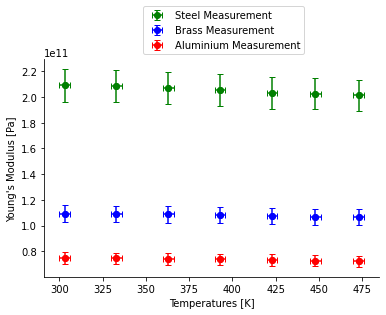

In [114]:
plt.plot(temperatures, Young(p_ste, ste_w0, ste_l)*20, 'go')
plt.errorbar(temperatures, Young(p_ste, ste_w0, ste_l)*20, Y_uncert_ste*20, 3,capsize=3, 
             fmt='o', color = 'green', label = "Steel Measurement")

plt.plot(temperatures, Young(p_brs, brs_w0, brs_l)*20, 'bo')
plt.errorbar(temperatures, Young(p_brs, brs_w0, brs_l)*20, Y_uncert_brs*20, 3,capsize=3, 
             fmt='o', color = 'blue', label = "Brass Measurement")

plt.plot(temperatures, Young(p_alum, alum_w0, alum_l)*48, 'ro')
plt.errorbar(temperatures, Young(p_alum, alum_w0, alum_l)*48, Y_uncert_alum*48, 3,capsize=3, 
             fmt='o', color = 'red', label = "Aluminium Measurement")

plt.legend(bbox_to_anchor =(0.28, 1), ncol = 1)
 
plt.xlabel("Temperatures [K]")
plt.ylabel("Young's Modulus [Pa]")
# plt.title("\nVariation of Young's Modulus with temperature")

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

(60000000000.0, 85000000000.0)

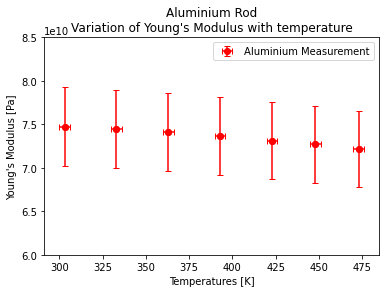

In [115]:
plt.plot(temperatures, Young(p_alum, alum_w0, alum_l)*48, 'ro')
plt.errorbar(temperatures, Young(p_alum, alum_w0, alum_l)*48, Y_uncert_alum*48, 3,capsize=3, 
             fmt='o', color = 'red', label = "Aluminium Measurement")

plt.legend()
 
plt.xlabel("Temperatures [K]")
plt.ylabel("Young's Modulus [Pa]")
plt.title("Aluminium Rod\nVariation of Young's Modulus with temperature")

plt.ylim(6*10**10, 8.5*10**10)

(90000000000.0, 127000000000.0)

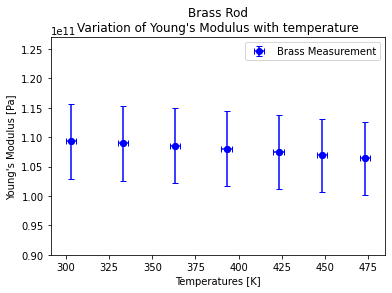

In [116]:
plt.plot(temperatures, Young(p_brs, brs_w0, brs_l)*20, 'bo')
plt.errorbar(temperatures, Young(p_brs, brs_w0, brs_l)*20, Y_uncert_brs*20, 3,capsize=3, 
             fmt='o', color = 'blue', label = "Brass Measurement")

plt.legend()

plt.xlabel("Temperatures [K]")
plt.ylabel("Young's Modulus [Pa]")
plt.title("Brass Rod\nVariation of Young's Modulus with temperature")

plt.ylim(0.9*10**11, 1.27*10**11)

(175000000000.0, 240000000000.0)

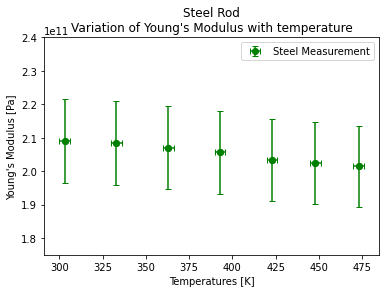

In [117]:
plt.plot(temperatures, Young(p_ste, ste_w0, ste_l)*20, 'go')
plt.errorbar(temperatures, Young(p_ste, ste_w0, ste_l)*20, Y_uncert_ste*20, 3,capsize=3, 
             fmt='o', color = 'green', label = "Steel Measurement")


plt.legend()

plt.xlabel("Temperatures [K]")
plt.ylabel("Young's Modulus [Pa]")
plt.title("Steel Rod\nVariation of Young's Modulus with temperature")

plt.ylim(1.75*10**11, 2.4*10**11)

### Young's Modulus at room temperature for each rod

In [118]:
# Aluminium Rod
print(f"Young's Modulus for Aluminium at 303K = {Young(p_alum, alum_w0, alum_l)[0]*48:.2g} ± {Y_uncert_alum[0]*48:.1g}")

Young's Modulus for Aluminium at 303K = 7.5e+10 ± 5e+09


In [119]:
# Brass Rod
print(f"Young's Modulus for Brass at 303K = {Young(p_brs, brs_w0, brs_l)[0]*20:.2g} ± {Y_uncert_brs[0]*20:.1g}")

Young's Modulus for Brass at 303K = 1.1e+11 ± 6e+09


In [120]:
# Steel Rod
print(f"Young's Modulus for Steel at 303K = {Young(p_ste, ste_w0, ste_l)[0]*20:.2g} ± {Y_uncert_ste[0]*20:.1g}")

Young's Modulus for Steel at 303K = 2.1e+11 ± 1e+10


In [121]:
# Puts each rods bandwidth frequency for each temperature into an array
alum_Δw = np.array([alum_Δw_303, alum_Δw_333, alum_Δw_363, alum_Δw_393, alum_Δw_423, alum_Δw_448, alum_Δw_473])
brs_Δw = np.array([brs_Δw_303, brs_Δw_333, brs_Δw_363, brs_Δw_393, brs_Δw_423, brs_Δw_448, brs_Δw_473])
ste_Δw = np.array([ste_Δw_303, ste_Δw_333, ste_Δw_363, ste_Δw_393, ste_Δw_423, ste_Δw_448, ste_Δw_473])

In [122]:
alum_Δw

array([0.84969875, 0.82484387, 0.81833119, 0.81785219, 0.82396885,
       0.82446488, 0.825747  ])

In [123]:
brs_Δw

array([0.83774118, 0.84013176, 0.84422688, 0.85067   , 0.84412477,
       0.84659398, 0.84757875])

In [124]:
ste_Δw

array([1.10510302, 1.08352341, 1.0631975 , 1.06050841, 1.02802328,
       1.05643625, 1.05505806])

In [125]:
Young(p_alum, alum_w0, alum_l)*48

array([7.47307321e+10, 7.44908123e+10, 7.40719162e+10, 7.36303672e+10,
       7.31271100e+10, 7.27016525e+10, 7.21684691e+10])

In [126]:
Y_uncert_alum*48

array([4.52581434e+09, 4.51129143e+09, 4.48593467e+09, 4.45920668e+09,
       4.42874335e+09, 4.40298940e+09, 4.37071457e+09])

In [127]:
Young(p_brs, brs_w0, brs_l)*20

array([1.09288622e+11, 1.08981268e+11, 1.08586104e+11, 1.08065012e+11,
       1.07509282e+11, 1.06919380e+11, 1.06405561e+11])

In [128]:
Y_uncert_brs*20

array([6.40251412e+09, 6.38451677e+09, 6.36137759e+09, 6.33086462e+09,
       6.29832337e+09, 6.26378114e+09, 6.23369404e+09])

In [129]:
Young(p_ste, ste_w0, ste_l)*20

array([2.08974174e+11, 2.08471652e+11, 2.07042891e+11, 2.05648469e+11,
       2.03251311e+11, 2.02550950e+11, 2.01441035e+11])

In [130]:
Y_uncert_ste*20

array([1.26215595e+10, 1.25912145e+10, 1.25049382e+10, 1.24207354e+10,
       1.22759821e+10, 1.22336905e+10, 1.21666678e+10])